# Лабораторная работа 4

* Убедиться в нестабильности одиночного дерева на своих данных
* Отобрать самые важные признаки случайным лесом, сравнить с отбором признаков линейным методом  c L1-регуляризацией
* Сравнить качество работы случайного леса без кросс-валидации с кросс-валидации
* Сравнить качество работы и время обучения леса с градиентным бустингом над решающими деревьями, подобрав для каждого оптимальные параметры. Градиентный бустинг обучать на видеокарте.

In [1]:
# загрузим данные

#импорт необходимых модулей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

# результат по выживани.
trainSurvivedPath = '/home/alex/Downloads/bmstuML/dataMl/trainSurvived.plk'
testSurvivedPath = '/home/alex/Downloads/bmstuML/dataMl/testSurvived.plk'

y_train = pd.read_pickle(trainSurvivedPath)
y_test = pd.read_pickle(testSurvivedPath)


# подготовленные данные из ЛР 2
trainDataPath = '/home/alex/Downloads/bmstuML/dataMl/trainData.plk'
testDataPath = '/home/alex/Downloads/bmstuML/dataMl/testData.plk'

X_train = pd.read_pickle(trainDataPath)
X_test = pd.read_pickle(testDataPath)


X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     714 non-null    float64
 1   Age     714 non-null    float64
 2   SibSp   714 non-null    float64
 3   Parch   714 non-null    float64
 4   Fare    714 non-null    float64
 5   is_S    714 non-null    float64
 6   is_C    714 non-null    float64
 7   is_Q    714 non-null    float64
dtypes: float64(8)
memory usage: 44.8 KB


### Нестабильность одиночного дерева

In [2]:
#необходимый импорт

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from matplotlib import pyplot as plt

Оценим счет precision одного дерева:

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

#max_features=3
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=15)

clf_tree.fit(X_train, y_train)

predicted = clf_tree.predict(X_test)

prec_score = precision_score(y_test, predicted)

print('precision_score:', prec_score)



precision_score: 0.9071428571428571


Нарисуем дерево для понимания работы. Покажем дерево бизнесу.

In [ ]:
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

my_feature_names = ['Sex', 'Age','SibSp','Parch','Fare','is_S', 'is_C', 'is_Q' ]

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=my_feature_names,
               out_file=dot_data, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())



Отметим нестабильность дерева. При изменении max_features=3 дерево заметно меняется (меняются важные признаки глубины 1).

### Самые важные признаки

Самый важный признак - пол пассажира. На данном узле энтропия уменьшается больше всего, данный узел выше всех.
Еще важные признаки: плата за билет и возраст.

В L1 регуляризации максимальные веса были также у пола и цены билета. ([-0.51781201(пол) -0.18299523 -0.20908921 -0.10937898  0.56521648(цена за билет) -0.05500351 0.07227682 -0.14884301])


### Случайной лес без кросс-валидацией с кросс-валидацией



In [5]:
# без кросс-валидацией (predict по тест данным)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=5).fit(X_train, y_train)

predicted_rf = rf.predict(X_test)

prec_score_rand_forest = precision_score(y_test, predicted_rf)

print('prec_score_rand_forest:', prec_score_rand_forest)

prec_score_rand_forest: 0.7890625


In [6]:
# для сравнения с градиентом в конце лабы узнаем лучшие гиперпараметры и значение при этих парамтерах

max_score = 0

for n_trees in range(1, 101, 10): # используем разное кол-во деревьев
    for depth in range(1, 16): # используем разную глубину
        p = RandomForestClassifier(n_estimators=n_trees, max_depth=depth).fit(X_train, y_train).predict(X_test)
        score = precision_score(y_test, p)
        if max_score < score and score != 1:
            max_score = score
            print('max_score:',max_score,'\t n_trees:', n_trees, 'depth:', depth)

print('end RandomForestClassifier!\n')
prec_score_rand_forest = max_score
print('prec_score_rand_forest:', prec_score_rand_forest)

max_score: 0.5833333333333334 	 n_trees: 1 depth: 1
max_score: 0.782608695652174 	 n_trees: 1 depth: 2
max_score: 0.7862595419847328 	 n_trees: 1 depth: 5
max_score: 0.7923076923076923 	 n_trees: 1 depth: 7
max_score: 0.8416666666666667 	 n_trees: 11 depth: 2
max_score: 0.8449612403100775 	 n_trees: 11 depth: 6
max_score: 0.8916666666666667 	 n_trees: 11 depth: 7
max_score: 0.9202898550724637 	 n_trees: 21 depth: 2
max_score: 0.9230769230769231 	 n_trees: 21 depth: 3
max_score: 0.9272727272727272 	 n_trees: 31 depth: 1
max_score: 0.9519230769230769 	 n_trees: 31 depth: 2
max_score: 0.9694656488549618 	 n_trees: 31 depth: 3
max_score: 0.9769230769230769 	 n_trees: 41 depth: 2
max_score: 0.9844961240310077 	 n_trees: 51 depth: 3
max_score: 0.9913793103448276 	 n_trees: 91 depth: 2
end RandomForestClassifier!

prec_score_rand_forest: 0.9913793103448276


Лучший вариант: max_score: 0.9855072463768116 	 n_trees: 51 depth: 1

In [7]:
# с кросс-валидацией

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier(n_estimators=10, max_depth=5)

score_cross_val = cross_val_score(rf, X_train, y_train, cv=3, scoring='precision')
print('score_cross_val:',score_cross_val)

score_cross_val: [0.74358974 0.76842105 0.81707317]


### Сравнение леса и градиентного бустинга

In [8]:
# греем видеокарту

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from catboost import CatBoostClassifier


scores1 = np.ndarray([10, 10])
for i, n_trees in enumerate(np.linspace(1, 100, 10)): # используем разное кол-во деревьев
    for j, depth in enumerate(np.arange(2, 12)): # используем разную глубину
        p = CatBoostClassifier(n_estimators=n_trees, max_depth=depth, task_type="GPU").fit(X_train, y_train).predict(X_test)
        scores1[i, j] = precision_score(y_test, p) #mean_squared_error(y_test, p)
        print('precision_score:', scores1[i, j])


Learning rate set to 0.5


0:	learn: 0.5744398	total: 2.19ms	remaining: 0us
precision_score: 1.0
Learning rate set to 0.5
0:	learn: 0.5517179	total: 1.71ms	remaining: 0us
precision_score: 0.8873239436619719
Learning rate set to 0.5
0:	learn: 0.5555726	total: 2.64ms	remaining: 0us
precision_score: 0.8873239436619719
Learning rate set to 0.5


0:	learn: 0.5470806	total: 2.41ms	remaining: 0us
precision_score: 0.8740157480314961
Learning rate set to 0.5
0:	learn: 0.5501477	total: 3.92ms	remaining: 0us


precision_score: 0.8914728682170543
Learning rate set to 0.5
0:	learn: 0.5569616	total: 5.68ms	remaining: 0us
precision_score: 0.7902097902097902
Learning rate set to 0.5


0:	learn: 0.5538493	total: 5.86ms	remaining: 0us
precision_score: 0.7887323943661971
Learning rate set to 0.5
0:	learn: 0.5668132	total: 4.9ms	remaining: 0us
precision_score: 0.8134328358208955
Learning rate set to 0.5
0:	learn: 0.5745630	total: 5.62ms	remaining: 0us
precision_score: 0.8203125
Learning rate set to 0.5


0:	learn: 0.5782605	total: 9.61ms	remaining: 0us
precision_score: 0.8225806451612904
Learning rate set to 0.5
0:	learn: 0.5744398	total: 1.91ms	remaining: 21.1ms
1:	learn: 0.5254090	total: 2.88ms	remaining: 14.4ms
2:	learn: 0.5097016	total: 3.73ms	remaining: 11.2ms
3:	learn: 0.4887642	total: 4.66ms	remaining: 9.32ms
4:	learn: 0.4773957	total: 5.64ms	remaining: 7.9ms
5:	learn: 0.4720694	total: 6.56ms	remaining: 6.56ms
6:	learn: 0.4583488	total: 7.52ms	remaining: 5.37ms
7:	learn: 0.4561689	total: 8.45ms	remaining: 4.22ms
8:	learn: 0.4497866	total: 9.38ms	remaining: 3.13ms
9:	learn: 0.4452636	total: 10.4ms	remaining: 2.09ms
10:	learn: 0.4410275	total: 11.2ms	remaining: 1.02ms
11:	learn: 0.4399824	total: 12ms	remaining: 0us


precision_score: 0.9477611940298507
Learning rate set to 0.5
0:	learn: 0.5517179	total: 2.17ms	remaining: 23.9ms
1:	learn: 0.5026005	total: 3.62ms	remaining: 18.1ms
2:	learn: 0.4860077	total: 5.15ms	remaining: 15.4ms
3:	learn: 0.4657825	total: 6.69ms	remaining: 13.4ms
4:	learn: 0.4612916	total: 8.07ms	remaining: 11.3ms
5:	learn: 0.4503727	total: 9.81ms	remaining: 9.81ms
6:	learn: 0.4403147	total: 11.8ms	remaining: 8.45ms
7:	learn: 0.4373474	total: 13.7ms	remaining: 6.87ms
8:	learn: 0.4342477	total: 15.2ms	remaining: 5.08ms
9:	learn: 0.4316646	total: 16.7ms	remaining: 3.35ms
10:	learn: 0.4287226	total: 18.2ms	remaining: 1.65ms
11:	learn: 0.4268309	total: 19.5ms	remaining: 0us
precision_score: 0.8873239436619719
Learning rate set to 0.5


0:	learn: 0.5555726	total: 4.71ms	remaining: 51.8ms
1:	learn: 0.5176122	total: 6.47ms	remaining: 32.3ms
2:	learn: 0.4776871	total: 8.37ms	remaining: 25.1ms
3:	learn: 0.4564150	total: 10.1ms	remaining: 20.3ms
4:	learn: 0.4450863	total: 11.8ms	remaining: 16.5ms
5:	learn: 0.4338136	total: 13.6ms	remaining: 13.6ms
6:	learn: 0.4238298	total: 15.6ms	remaining: 11.2ms
7:	learn: 0.4213017	total: 17.7ms	remaining: 8.84ms
8:	learn: 0.4166902	total: 20.1ms	remaining: 6.71ms
9:	learn: 0.4121131	total: 22.9ms	remaining: 4.58ms
10:	learn: 0.4081179	total: 25ms	remaining: 2.27ms
11:	learn: 0.4051609	total: 26.9ms	remaining: 0us
precision_score: 0.8848920863309353
Learning rate set to 0.5
0:	learn: 0.5470806	total: 2.89ms	remaining: 31.8ms
1:	learn: 0.4867804	total: 5.46ms	remaining: 27.3ms
2:	learn: 0.4645485	total: 6.98ms	remaining: 20.9ms
3:	learn: 0.4440048	total: 8.42ms	remaining: 16.8ms
4:	learn: 0.4317888	total: 9.9ms	remaining: 13.9ms
5:	learn: 0.4230014	total: 11.4ms	remaining: 11.4ms
6:	lear

0:	learn: 0.5569616	total: 3.54ms	remaining: 39ms
1:	learn: 0.4957978	total: 6.76ms	remaining: 33.8ms
2:	learn: 0.4578971	total: 9.64ms	remaining: 28.9ms
3:	learn: 0.4383901	total: 11.7ms	remaining: 23.4ms
4:	learn: 0.4251755	total: 13.7ms	remaining: 19.2ms
5:	learn: 0.4106233	total: 15.7ms	remaining: 15.7ms
6:	learn: 0.3973115	total: 17.7ms	remaining: 12.6ms
7:	learn: 0.3907097	total: 20ms	remaining: 10ms
8:	learn: 0.3844089	total: 23.6ms	remaining: 7.85ms
9:	learn: 0.3785242	total: 25.8ms	remaining: 5.16ms
10:	learn: 0.3732754	total: 29.3ms	remaining: 2.66ms
11:	learn: 0.3720457	total: 32.2ms	remaining: 0us
precision_score: 0.8405797101449275
Learning rate set to 0.5
0:	learn: 0.5538493	total: 5.42ms	remaining: 59.7ms
1:	learn: 0.5038424	total: 9.12ms	remaining: 45.6ms
2:	learn: 0.4640770	total: 12.9ms	remaining: 38.6ms
3:	learn: 0.4373580	total: 16.3ms	remaining: 32.7ms
4:	learn: 0.4156806	total: 20.2ms	remaining: 28.2ms
5:	learn: 0.4056920	total: 23.9ms	remaining: 23.9ms
6:	learn: 

7:	learn: 0.3883490	total: 29.5ms	remaining: 14.8ms
8:	learn: 0.3809976	total: 33.2ms	remaining: 11.1ms
9:	learn: 0.3747372	total: 36.8ms	remaining: 7.35ms
10:	learn: 0.3675146	total: 40.4ms	remaining: 3.67ms
11:	learn: 0.3606232	total: 43.8ms	remaining: 0us
precision_score: 0.8260869565217391
Learning rate set to 0.5
0:	learn: 0.5668132	total: 5.61ms	remaining: 61.7ms
1:	learn: 0.5116298	total: 10.6ms	remaining: 52.9ms
2:	learn: 0.4675866	total: 13ms	remaining: 38.9ms
3:	learn: 0.4368980	total: 17.2ms	remaining: 34.3ms
4:	learn: 0.4162519	total: 21.7ms	remaining: 30.4ms
5:	learn: 0.4019627	total: 26.4ms	remaining: 26.4ms
6:	learn: 0.3899794	total: 30.9ms	remaining: 22.1ms
7:	learn: 0.3894724	total: 32.1ms	remaining: 16.1ms
8:	learn: 0.3800881	total: 36.5ms	remaining: 12.2ms
9:	learn: 0.3733527	total: 41ms	remaining: 8.2ms
10:	learn: 0.3664331	total: 45.6ms	remaining: 4.14ms
11:	learn: 0.3593476	total: 49.8ms	remaining: 0us
precision_score: 0.8320610687022901
Learning rate set to 0.5
0

8:	learn: 0.3719639	total: 54.9ms	remaining: 18.3ms
9:	learn: 0.3630542	total: 59.5ms	remaining: 11.9ms
10:	learn: 0.3554603	total: 65.4ms	remaining: 5.95ms
11:	learn: 0.3492670	total: 70.7ms	remaining: 0us
precision_score: 0.8372093023255814
Learning rate set to 0.5
0:	learn: 0.5782605	total: 11.1ms	remaining: 122ms
1:	learn: 0.5123512	total: 19.4ms	remaining: 97.2ms
2:	learn: 0.4751146	total: 28ms	remaining: 84ms


3:	learn: 0.4484954	total: 36.5ms	remaining: 72.9ms
4:	learn: 0.4270296	total: 45ms	remaining: 63ms
5:	learn: 0.4128134	total: 53.9ms	remaining: 53.9ms
6:	learn: 0.3988607	total: 63.2ms	remaining: 45.2ms
7:	learn: 0.3905127	total: 73.5ms	remaining: 36.7ms
8:	learn: 0.3771196	total: 78.8ms	remaining: 26.3ms
9:	learn: 0.3696688	total: 81.6ms	remaining: 16.3ms
10:	learn: 0.3660595	total: 83.8ms	remaining: 7.62ms
11:	learn: 0.3586748	total: 88.3ms	remaining: 0us
precision_score: 0.8244274809160306
Learning rate set to 0.5
0:	learn: 0.5744398	total: 2.23ms	remaining: 49ms
1:	learn: 0.5254090	total: 3.52ms	remaining: 37ms
2:	learn: 0.5097016	total: 4.72ms	remaining: 31.4ms
3:	learn: 0.4887642	total: 5.88ms	remaining: 27.9ms
4:	learn: 0.4773957	total: 7.12ms	remaining: 25.6ms
5:	learn: 0.4720694	total: 8.33ms	remaining: 23.6ms
6:	learn: 0.4583488	total: 9.54ms	remaining: 21.8ms


7:	learn: 0.4561689	total: 11ms	remaining: 20.6ms
8:	learn: 0.4497866	total: 12.5ms	remaining: 19.4ms
9:	learn: 0.4452636	total: 14.2ms	remaining: 18.4ms
10:	learn: 0.4410275	total: 15.5ms	remaining: 16.9ms
11:	learn: 0.4399824	total: 16.7ms	remaining: 15.3ms
12:	learn: 0.4363102	total: 18ms	remaining: 13.8ms
13:	learn: 0.4325627	total: 19.6ms	remaining: 12.6ms
14:	learn: 0.4309997	total: 20.9ms	remaining: 11.1ms
15:	learn: 0.4299763	total: 22.2ms	remaining: 9.71ms
16:	learn: 0.4294834	total: 23.5ms	remaining: 8.28ms
17:	learn: 0.4279844	total: 24.9ms	remaining: 6.93ms
18:	learn: 0.4264411	total: 26.2ms	remaining: 5.52ms
19:	learn: 0.4249213	total: 27.5ms	remaining: 4.13ms
20:	learn: 0.4241409	total: 29.3ms	remaining: 2.79ms
21:	learn: 0.4207788	total: 30.9ms	remaining: 1.41ms
22:	learn: 0.4192445	total: 33ms	remaining: 0us
precision_score: 0.9402985074626866
Learning rate set to 0.5
0:	learn: 0.5517179	total: 2.81ms	remaining: 61.8ms
1:	learn: 0.5026005	total: 4.28ms	remaining: 45ms
2

Learning rate set to 0.5
0:	learn: 0.5470806	total: 2.96ms	remaining: 65.2ms
1:	learn: 0.4867804	total: 5.08ms	remaining: 53.4ms
2:	learn: 0.4645485	total: 6.98ms	remaining: 46.5ms
3:	learn: 0.4440048	total: 9.26ms	remaining: 44ms
4:	learn: 0.4317888	total: 11.6ms	remaining: 41.9ms
5:	learn: 0.4230014	total: 13.6ms	remaining: 38.6ms
6:	learn: 0.4152747	total: 15.8ms	remaining: 36.2ms
7:	learn: 0.4097974	total: 18.1ms	remaining: 34ms
8:	learn: 0.4016801	total: 20.3ms	remaining: 31.6ms
9:	learn: 0.3970161	total: 22.4ms	remaining: 29.1ms
10:	learn: 0.3934082	total: 24.4ms	remaining: 26.7ms
11:	learn: 0.3913483	total: 26.5ms	remaining: 24.3ms
12:	learn: 0.3866839	total: 28.8ms	remaining: 22.2ms
13:	learn: 0.3829706	total: 31ms	remaining: 19.9ms
14:	learn: 0.3781661	total: 33.1ms	remaining: 17.6ms
15:	learn: 0.3754261	total: 35ms	remaining: 15.3ms
16:	learn: 0.3741389	total: 37.1ms	remaining: 13.1ms
17:	learn: 0.3716599	total: 39.1ms	remaining: 10.9ms
18:	learn: 0.3692114	total: 41.2ms	rema

0:	learn: 0.5501477	total: 3.74ms	remaining: 82.2ms
1:	learn: 0.4914044	total: 5.61ms	remaining: 58.9ms
2:	learn: 0.4546127	total: 7.27ms	remaining: 48.5ms
3:	learn: 0.4371828	total: 9.02ms	remaining: 42.8ms
4:	learn: 0.4239388	total: 12.1ms	remaining: 43.4ms
5:	learn: 0.4108627	total: 14.2ms	remaining: 40.2ms
6:	learn: 0.4024891	total: 15.8ms	remaining: 36.1ms
7:	learn: 0.3967609	total: 17.6ms	remaining: 33.1ms
8:	learn: 0.3905782	total: 19.4ms	remaining: 30.2ms
9:	learn: 0.3840075	total: 21.1ms	remaining: 27.4ms
10:	learn: 0.3801494	total: 23.7ms	remaining: 25.9ms
11:	learn: 0.3772171	total: 25.6ms	remaining: 23.4ms
12:	learn: 0.3685900	total: 27.7ms	remaining: 21.3ms
13:	learn: 0.3648015	total: 29.5ms	remaining: 19ms
14:	learn: 0.3609849	total: 31.3ms	remaining: 16.7ms
15:	learn: 0.3578068	total: 33ms	remaining: 14.4ms
16:	learn: 0.3539555	total: 34.5ms	remaining: 12.2ms
17:	learn: 0.3507705	total: 36.4ms	remaining: 10.1ms
18:	learn: 0.3463473	total: 38ms	remaining: 8ms
19:	learn: 0

6:	learn: 0.3973115	total: 15.7ms	remaining: 35.9ms
7:	learn: 0.3907097	total: 18.7ms	remaining: 35.1ms
8:	learn: 0.3844089	total: 20.8ms	remaining: 32.3ms
9:	learn: 0.3785242	total: 23.8ms	remaining: 31ms
10:	learn: 0.3732754	total: 27ms	remaining: 29.5ms
11:	learn: 0.3720457	total: 29.1ms	remaining: 26.7ms
12:	learn: 0.3681020	total: 31.4ms	remaining: 24.2ms
13:	learn: 0.3624675	total: 33.5ms	remaining: 21.5ms
14:	learn: 0.3565746	total: 35.5ms	remaining: 18.9ms
15:	learn: 0.3527127	total: 38ms	remaining: 16.6ms
16:	learn: 0.3509533	total: 40.9ms	remaining: 14.4ms
17:	learn: 0.3478030	total: 43.3ms	remaining: 12ms
18:	learn: 0.3451411	total: 45.3ms	remaining: 9.55ms
19:	learn: 0.3377259	total: 47.5ms	remaining: 7.12ms
20:	learn: 0.3310447	total: 49.5ms	remaining: 4.71ms
21:	learn: 0.3254910	total: 51.8ms	remaining: 2.35ms
22:	learn: 0.3191947	total: 54.7ms	remaining: 0us
precision_score: 0.828125
Learning rate set to 0.5
0:	learn: 0.5538493	total: 4.43ms	remaining: 97.4ms
1:	learn: 0

0:	learn: 0.5668132	total: 8.25ms	remaining: 181ms
1:	learn: 0.5116298	total: 11.7ms	remaining: 122ms
2:	learn: 0.4675866	total: 13.3ms	remaining: 88.8ms
3:	learn: 0.4368980	total: 16.8ms	remaining: 80ms
4:	learn: 0.4162519	total: 20.3ms	remaining: 73.1ms
5:	learn: 0.4019627	total: 24.4ms	remaining: 69ms
6:	learn: 0.3899794	total: 27.8ms	remaining: 63.5ms
7:	learn: 0.3894724	total: 28.7ms	remaining: 53.8ms
8:	learn: 0.3800881	total: 31.8ms	remaining: 49.5ms
9:	learn: 0.3733527	total: 35.4ms	remaining: 46ms
10:	learn: 0.3664331	total: 39.2ms	remaining: 42.8ms
11:	learn: 0.3593476	total: 42.7ms	remaining: 39.2ms
12:	learn: 0.3504316	total: 46.4ms	remaining: 35.7ms
13:	learn: 0.3458190	total: 50.2ms	remaining: 32.3ms
14:	learn: 0.3397189	total: 53.5ms	remaining: 28.6ms
15:	learn: 0.3348750	total: 57.4ms	remaining: 25.1ms
16:	learn: 0.3290032	total: 60.7ms	remaining: 21.4ms
17:	learn: 0.3249991	total: 64.6ms	remaining: 18ms
18:	learn: 0.3212723	total: 68.2ms	remaining: 14.4ms
19:	learn: 0.

0:	learn: 0.5745630	total: 6.78ms	remaining: 149ms
1:	learn: 0.5063400	total: 13.3ms	remaining: 140ms
2:	learn: 0.4702969	total: 19.9ms	remaining: 133ms
3:	learn: 0.4469463	total: 26.6ms	remaining: 126ms
4:	learn: 0.4276702	total: 33.8ms	remaining: 122ms
5:	learn: 0.4074583	total: 41.3ms	remaining: 117ms
6:	learn: 0.3939253	total: 48.2ms	remaining: 110ms
7:	learn: 0.3850445	total: 55.1ms	remaining: 103ms
8:	learn: 0.3719639	total: 62ms	remaining: 96.5ms
9:	learn: 0.3630542	total: 67.3ms	remaining: 87.5ms
10:	learn: 0.3554603	total: 74.4ms	remaining: 81.2ms
11:	learn: 0.3492670	total: 80.6ms	remaining: 73.9ms
12:	learn: 0.3430204	total: 85.9ms	remaining: 66.1ms
13:	learn: 0.3370947	total: 91.1ms	remaining: 58.5ms
14:	learn: 0.3276426	total: 96.6ms	remaining: 51.5ms
15:	learn: 0.3216869	total: 102ms	remaining: 44.6ms
16:	learn: 0.3142638	total: 107ms	remaining: 37.7ms
17:	learn: 0.3074948	total: 112ms	remaining: 31.1ms
18:	learn: 0.3005774	total: 117ms	remaining: 24.5ms
19:	learn: 0.2966

0:	learn: 0.5782605	total: 8.91ms	remaining: 196ms
1:	learn: 0.5123512	total: 16.8ms	remaining: 176ms
2:	learn: 0.4751146	total: 24.9ms	remaining: 166ms
3:	learn: 0.4484954	total: 32.5ms	remaining: 155ms
4:	learn: 0.4270296	total: 40.1ms	remaining: 144ms
5:	learn: 0.4128134	total: 47.6ms	remaining: 135ms
6:	learn: 0.3988607	total: 55ms	remaining: 126ms
7:	learn: 0.3905127	total: 62.9ms	remaining: 118ms
8:	learn: 0.3771196	total: 68.1ms	remaining: 106ms
9:	learn: 0.3696688	total: 70.3ms	remaining: 91.4ms
10:	learn: 0.3660595	total: 71.7ms	remaining: 78.3ms
11:	learn: 0.3586748	total: 75.1ms	remaining: 68.9ms
12:	learn: 0.3482144	total: 83ms	remaining: 63.8ms
13:	learn: 0.3420604	total: 90.5ms	remaining: 58.2ms
14:	learn: 0.3324941	total: 99ms	remaining: 52.8ms
15:	learn: 0.3261799	total: 107ms	remaining: 46.7ms
16:	learn: 0.3186422	total: 116ms	remaining: 41.1ms
17:	learn: 0.3110940	total: 124ms	remaining: 34.5ms
18:	learn: 0.3059234	total: 133ms	remaining: 27.9ms
19:	learn: 0.3010575	t

0:	learn: 0.5517179	total: 1.89ms	remaining: 62.4ms
1:	learn: 0.5026005	total: 3.01ms	remaining: 48.1ms
2:	learn: 0.4860077	total: 4.15ms	remaining: 42.9ms
3:	learn: 0.4657825	total: 5.6ms	remaining: 42ms
4:	learn: 0.4612916	total: 7.03ms	remaining: 40.8ms
5:	learn: 0.4503727	total: 8.32ms	remaining: 38.8ms
6:	learn: 0.4403147	total: 9.95ms	remaining: 38.4ms
7:	learn: 0.4373474	total: 11.5ms	remaining: 37.4ms
8:	learn: 0.4342477	total: 12.9ms	remaining: 35.8ms
9:	learn: 0.4316646	total: 14.3ms	remaining: 34.2ms
10:	learn: 0.4287226	total: 15.7ms	remaining: 32.9ms
11:	learn: 0.4268309	total: 17ms	remaining: 31.2ms
12:	learn: 0.4246710	total: 18.3ms	remaining: 29.5ms
13:	learn: 0.4198708	total: 19.6ms	remaining: 28ms
14:	learn: 0.4176172	total: 20.9ms	remaining: 26.5ms
15:	learn: 0.4160244	total: 22.2ms	remaining: 25ms
16:	learn: 0.4150587	total: 23.7ms	remaining: 23.7ms
17:	learn: 0.4131203	total: 25.1ms	remaining: 22.3ms
18:	learn: 0.4109855	total: 26.2ms	remaining: 20.7ms
19:	learn: 0

3:	learn: 0.4564150	total: 14.7ms	remaining: 110ms
4:	learn: 0.4450863	total: 17.3ms	remaining: 100ms
5:	learn: 0.4338136	total: 19.1ms	remaining: 89.2ms
6:	learn: 0.4238298	total: 22ms	remaining: 84.9ms
7:	learn: 0.4213017	total: 24.2ms	remaining: 78.6ms
8:	learn: 0.4166902	total: 26.1ms	remaining: 72.4ms
9:	learn: 0.4121131	total: 28.5ms	remaining: 68.3ms
10:	learn: 0.4081179	total: 30.4ms	remaining: 63.6ms
11:	learn: 0.4051609	total: 32.4ms	remaining: 59.5ms
12:	learn: 0.3997955	total: 34.3ms	remaining: 55.4ms
13:	learn: 0.3967443	total: 36.2ms	remaining: 51.7ms
14:	learn: 0.3933886	total: 38ms	remaining: 48.2ms
15:	learn: 0.3914945	total: 41.1ms	remaining: 46.2ms
16:	learn: 0.3907515	total: 43.1ms	remaining: 43.1ms
17:	learn: 0.3887216	total: 45.1ms	remaining: 40ms
18:	learn: 0.3839631	total: 46.7ms	remaining: 36.9ms
19:	learn: 0.3823508	total: 48.3ms	remaining: 33.8ms
20:	learn: 0.3787926	total: 49.5ms	remaining: 30.6ms
21:	learn: 0.3771557	total: 50.5ms	remaining: 27.5ms
22:	lear

2:	learn: 0.4645485	total: 5.48ms	remaining: 56.6ms
3:	learn: 0.4440048	total: 6.87ms	remaining: 51.6ms
4:	learn: 0.4317888	total: 8.44ms	remaining: 48.9ms
5:	learn: 0.4230014	total: 9.81ms	remaining: 45.8ms
6:	learn: 0.4152747	total: 11ms	remaining: 42.6ms
7:	learn: 0.4097974	total: 12.4ms	remaining: 40.3ms
8:	learn: 0.4016801	total: 13.8ms	remaining: 38.2ms
9:	learn: 0.3970161	total: 15.3ms	remaining: 36.8ms
10:	learn: 0.3934082	total: 16.8ms	remaining: 35.2ms
11:	learn: 0.3913483	total: 18.1ms	remaining: 33.1ms
12:	learn: 0.3866839	total: 19.4ms	remaining: 31.4ms
13:	learn: 0.3829706	total: 21ms	remaining: 29.9ms
14:	learn: 0.3781661	total: 23.3ms	remaining: 29.6ms
15:	learn: 0.3754261	total: 25.1ms	remaining: 28.2ms
16:	learn: 0.3741389	total: 27.8ms	remaining: 27.8ms
17:	learn: 0.3716599	total: 29.2ms	remaining: 25.9ms
18:	learn: 0.3692114	total: 30.4ms	remaining: 24ms
19:	learn: 0.3683013	total: 31.6ms	remaining: 22.1ms
20:	learn: 0.3641632	total: 32.9ms	remaining: 20.4ms
21:	lea

0:	learn: 0.5569616	total: 2.98ms	remaining: 98.4ms
1:	learn: 0.4957978	total: 4.95ms	remaining: 79.2ms
2:	learn: 0.4578971	total: 8.13ms	remaining: 84ms
3:	learn: 0.4383901	total: 12.1ms	remaining: 90.9ms
4:	learn: 0.4251755	total: 15.1ms	remaining: 87.7ms
5:	learn: 0.4106233	total: 18.2ms	remaining: 85ms
6:	learn: 0.3973115	total: 20.8ms	remaining: 80.3ms
7:	learn: 0.3907097	total: 25.9ms	remaining: 84.1ms
8:	learn: 0.3844089	total: 30.1ms	remaining: 83.7ms
9:	learn: 0.3785242	total: 32.2ms	remaining: 77.3ms
10:	learn: 0.3732754	total: 34.3ms	remaining: 71.7ms
11:	learn: 0.3720457	total: 35.8ms	remaining: 65.6ms
12:	learn: 0.3681020	total: 38.4ms	remaining: 62ms
13:	learn: 0.3624675	total: 40.5ms	remaining: 57.9ms
14:	learn: 0.3565746	total: 42.8ms	remaining: 54.2ms
15:	learn: 0.3527127	total: 44.9ms	remaining: 50.5ms
16:	learn: 0.3509533	total: 47.1ms	remaining: 47.1ms
17:	learn: 0.3478030	total: 48.9ms	remaining: 43.5ms
18:	learn: 0.3451411	total: 50.9ms	remaining: 40.2ms
19:	learn

0:	learn: 0.5538493	total: 3.74ms	remaining: 123ms
1:	learn: 0.5038424	total: 7.92ms	remaining: 127ms
2:	learn: 0.4640770	total: 11.6ms	remaining: 120ms
3:	learn: 0.4373580	total: 14.3ms	remaining: 107ms
4:	learn: 0.4156806	total: 17.9ms	remaining: 104ms
5:	learn: 0.4056920	total: 20.8ms	remaining: 97ms
6:	learn: 0.3945859	total: 22.7ms	remaining: 87.5ms
7:	learn: 0.3883490	total: 26ms	remaining: 84.6ms
8:	learn: 0.3809976	total: 29.6ms	remaining: 82.2ms
9:	learn: 0.3747372	total: 33.1ms	remaining: 79.4ms
10:	learn: 0.3675146	total: 36.8ms	remaining: 76.9ms
11:	learn: 0.3606232	total: 40.1ms	remaining: 73.5ms
12:	learn: 0.3543556	total: 43.3ms	remaining: 70ms
13:	learn: 0.3474012	total: 48.1ms	remaining: 68.7ms
14:	learn: 0.3425870	total: 51.6ms	remaining: 65.4ms
15:	learn: 0.3388606	total: 54.8ms	remaining: 61.6ms
16:	learn: 0.3346364	total: 57.7ms	remaining: 57.7ms
17:	learn: 0.3285758	total: 60.6ms	remaining: 53.9ms
18:	learn: 0.3226947	total: 64.9ms	remaining: 51.2ms
19:	learn: 0.3

0:	learn: 0.5668132	total: 4.75ms	remaining: 157ms
1:	learn: 0.5116298	total: 8.46ms	remaining: 135ms
2:	learn: 0.4675866	total: 10.3ms	remaining: 106ms
3:	learn: 0.4368980	total: 13.7ms	remaining: 103ms
4:	learn: 0.4162519	total: 17.1ms	remaining: 99.3ms
5:	learn: 0.4019627	total: 20.6ms	remaining: 96.1ms
6:	learn: 0.3899794	total: 24.2ms	remaining: 93.3ms
7:	learn: 0.3894724	total: 25.2ms	remaining: 82ms
8:	learn: 0.3800881	total: 28.9ms	remaining: 80.4ms
9:	learn: 0.3733527	total: 32.3ms	remaining: 77.6ms
10:	learn: 0.3664331	total: 35.6ms	remaining: 74.4ms
11:	learn: 0.3593476	total: 38.7ms	remaining: 71ms
12:	learn: 0.3504316	total: 42.2ms	remaining: 68.1ms
13:	learn: 0.3458190	total: 45.7ms	remaining: 65.3ms
14:	learn: 0.3397189	total: 49.4ms	remaining: 62.6ms
15:	learn: 0.3348750	total: 53.3ms	remaining: 60ms
16:	learn: 0.3290032	total: 57.4ms	remaining: 57.4ms
17:	learn: 0.3249991	total: 60.8ms	remaining: 54ms
18:	learn: 0.3212723	total: 64.3ms	remaining: 50.7ms
19:	learn: 0.31

0:	learn: 0.5745630	total: 5.71ms	remaining: 189ms
1:	learn: 0.5063400	total: 10.7ms	remaining: 171ms
2:	learn: 0.4702969	total: 15.4ms	remaining: 159ms
3:	learn: 0.4469463	total: 20.3ms	remaining: 152ms
4:	learn: 0.4276702	total: 25.2ms	remaining: 146ms
5:	learn: 0.4074583	total: 29.8ms	remaining: 139ms
6:	learn: 0.3939253	total: 34ms	remaining: 131ms
7:	learn: 0.3850445	total: 38.8ms	remaining: 126ms
8:	learn: 0.3719639	total: 43.6ms	remaining: 121ms
9:	learn: 0.3630542	total: 46ms	remaining: 110ms
10:	learn: 0.3554603	total: 50.7ms	remaining: 106ms
11:	learn: 0.3492670	total: 54.8ms	remaining: 101ms
12:	learn: 0.3430204	total: 59.5ms	remaining: 96.1ms
13:	learn: 0.3370947	total: 64.3ms	remaining: 91.9ms
14:	learn: 0.3276426	total: 69ms	remaining: 87.3ms
15:	learn: 0.3216869	total: 73.6ms	remaining: 82.8ms
16:	learn: 0.3142638	total: 78.1ms	remaining: 78.1ms
17:	learn: 0.3074948	total: 82.6ms	remaining: 73.5ms
18:	learn: 0.3005774	total: 87.3ms	remaining: 68.9ms
19:	learn: 0.2966597	

16:	learn: 0.3186422	total: 115ms	remaining: 115ms
17:	learn: 0.3110940	total: 126ms	remaining: 112ms
18:	learn: 0.3059234	total: 134ms	remaining: 106ms
19:	learn: 0.3010575	total: 143ms	remaining: 99.8ms
20:	learn: 0.2948943	total: 151ms	remaining: 93.3ms
21:	learn: 0.2891149	total: 158ms	remaining: 86.4ms
22:	learn: 0.2839285	total: 168ms	remaining: 80.1ms
23:	learn: 0.2799527	total: 176ms	remaining: 73.1ms
24:	learn: 0.2747055	total: 183ms	remaining: 66ms
25:	learn: 0.2703246	total: 191ms	remaining: 58.8ms
26:	learn: 0.2666183	total: 199ms	remaining: 51.5ms
27:	learn: 0.2628349	total: 207ms	remaining: 44.3ms
28:	learn: 0.2570287	total: 214ms	remaining: 36.9ms
29:	learn: 0.2519283	total: 222ms	remaining: 29.7ms
30:	learn: 0.2485086	total: 230ms	remaining: 22.3ms
31:	learn: 0.2450725	total: 238ms	remaining: 14.8ms
32:	learn: 0.2417497	total: 245ms	remaining: 7.44ms
33:	learn: 0.2394319	total: 253ms	remaining: 0us
precision_score: 0.765625
Learning rate set to 0.5
0:	learn: 0.5744398	t

Learning rate set to 0.5
0:	learn: 0.5517179	total: 1.83ms	remaining: 80.5ms
1:	learn: 0.5026005	total: 2.85ms	remaining: 61.2ms
2:	learn: 0.4860077	total: 3.73ms	remaining: 52.2ms
3:	learn: 0.4657825	total: 4.68ms	remaining: 47.9ms
4:	learn: 0.4612916	total: 5.88ms	remaining: 47.1ms
5:	learn: 0.4503727	total: 6.99ms	remaining: 45.4ms
6:	learn: 0.4403147	total: 7.97ms	remaining: 43.3ms
7:	learn: 0.4373474	total: 8.95ms	remaining: 41.4ms
8:	learn: 0.4342477	total: 9.83ms	remaining: 39.3ms
9:	learn: 0.4316646	total: 10.7ms	remaining: 37.6ms
10:	learn: 0.4287226	total: 11.6ms	remaining: 35.8ms
11:	learn: 0.4268309	total: 12.5ms	remaining: 34.3ms
12:	learn: 0.4246710	total: 13.4ms	remaining: 32.9ms
13:	learn: 0.4198708	total: 14.3ms	remaining: 31.7ms
14:	learn: 0.4176172	total: 15.2ms	remaining: 30.3ms
15:	learn: 0.4160244	total: 16.1ms	remaining: 29.1ms
16:	learn: 0.4150587	total: 17ms	remaining: 27.9ms
17:	learn: 0.4131203	total: 17.9ms	remaining: 26.8ms
18:	learn: 0.4109855	total: 18.8m

0:	learn: 0.5555726	total: 2.17ms	remaining: 95.6ms
1:	learn: 0.5176122	total: 3.46ms	remaining: 74.4ms
2:	learn: 0.4776871	total: 4.58ms	remaining: 64.2ms
3:	learn: 0.4564150	total: 5.81ms	remaining: 59.5ms
4:	learn: 0.4450863	total: 7.01ms	remaining: 56.1ms
5:	learn: 0.4338136	total: 8.13ms	remaining: 52.8ms
6:	learn: 0.4238298	total: 9.38ms	remaining: 50.9ms
7:	learn: 0.4213017	total: 10.7ms	remaining: 49.4ms
8:	learn: 0.4166902	total: 12ms	remaining: 48.1ms
9:	learn: 0.4121131	total: 13.1ms	remaining: 45.9ms
10:	learn: 0.4081179	total: 14.1ms	remaining: 43.7ms
11:	learn: 0.4051609	total: 15.2ms	remaining: 41.9ms
12:	learn: 0.3997955	total: 16.5ms	remaining: 40.5ms
13:	learn: 0.3967443	total: 17.6ms	remaining: 39ms
14:	learn: 0.3933886	total: 18.7ms	remaining: 37.5ms
15:	learn: 0.3914945	total: 19.8ms	remaining: 35.9ms
16:	learn: 0.3907515	total: 20.9ms	remaining: 34.4ms
17:	learn: 0.3887216	total: 22ms	remaining: 33ms
18:	learn: 0.3839631	total: 23.2ms	remaining: 31.7ms
19:	learn: 

0:	learn: 0.5470806	total: 6.67ms	remaining: 293ms
1:	learn: 0.4867804	total: 12.5ms	remaining: 268ms
2:	learn: 0.4645485	total: 14.1ms	remaining: 197ms
3:	learn: 0.4440048	total: 16ms	remaining: 164ms
4:	learn: 0.4317888	total: 17.5ms	remaining: 140ms
5:	learn: 0.4230014	total: 18.9ms	remaining: 123ms
6:	learn: 0.4152747	total: 20.4ms	remaining: 111ms
7:	learn: 0.4097974	total: 21.8ms	remaining: 101ms
8:	learn: 0.4016801	total: 24ms	remaining: 96.1ms
9:	learn: 0.3970161	total: 26.1ms	remaining: 91.5ms
10:	learn: 0.3934082	total: 28.2ms	remaining: 87.2ms
11:	learn: 0.3913483	total: 30.5ms	remaining: 83.8ms
12:	learn: 0.3866839	total: 32.6ms	remaining: 80.1ms
13:	learn: 0.3829706	total: 34.8ms	remaining: 77.1ms
14:	learn: 0.3781661	total: 37.2ms	remaining: 74.5ms
15:	learn: 0.3754261	total: 39.6ms	remaining: 71.8ms
16:	learn: 0.3741389	total: 41.8ms	remaining: 68.9ms
17:	learn: 0.3716599	total: 44.2ms	remaining: 66.2ms
18:	learn: 0.3692114	total: 46.2ms	remaining: 63.2ms
19:	learn: 0.36

0:	learn: 0.5501477	total: 3.32ms	remaining: 146ms
1:	learn: 0.4914044	total: 4.92ms	remaining: 106ms
2:	learn: 0.4546127	total: 7.12ms	remaining: 99.6ms
3:	learn: 0.4371828	total: 8.8ms	remaining: 90.2ms
4:	learn: 0.4239388	total: 10.5ms	remaining: 83.6ms
5:	learn: 0.4108627	total: 12ms	remaining: 77.9ms
6:	learn: 0.4024891	total: 13.6ms	remaining: 73.6ms
7:	learn: 0.3967609	total: 15.3ms	remaining: 70.9ms
8:	learn: 0.3905782	total: 17.3ms	remaining: 69ms
9:	learn: 0.3840075	total: 19.8ms	remaining: 69.3ms
10:	learn: 0.3801494	total: 21.9ms	remaining: 67.8ms
11:	learn: 0.3772171	total: 24.5ms	remaining: 67.5ms
12:	learn: 0.3685900	total: 26.3ms	remaining: 64.7ms
13:	learn: 0.3648015	total: 28ms	remaining: 61.9ms
14:	learn: 0.3609849	total: 29.6ms	remaining: 59.1ms
15:	learn: 0.3578068	total: 31.2ms	remaining: 56.5ms
16:	learn: 0.3539555	total: 33ms	remaining: 54.3ms
17:	learn: 0.3507705	total: 34.9ms	remaining: 52.3ms
18:	learn: 0.3463473	total: 37.5ms	remaining: 51.4ms
19:	learn: 0.3

0:	learn: 0.5569616	total: 3.62ms	remaining: 159ms
1:	learn: 0.4957978	total: 6.17ms	remaining: 133ms
2:	learn: 0.4578971	total: 9.11ms	remaining: 128ms
3:	learn: 0.4383901	total: 11.9ms	remaining: 122ms
4:	learn: 0.4251755	total: 14.8ms	remaining: 118ms
5:	learn: 0.4106233	total: 17.2ms	remaining: 112ms
6:	learn: 0.3973115	total: 19.6ms	remaining: 106ms
7:	learn: 0.3907097	total: 22.3ms	remaining: 103ms
8:	learn: 0.3844089	total: 25ms	remaining: 100ms
9:	learn: 0.3785242	total: 28.2ms	remaining: 98.8ms
10:	learn: 0.3732754	total: 31.5ms	remaining: 97.3ms
11:	learn: 0.3720457	total: 33.7ms	remaining: 92.7ms
12:	learn: 0.3681020	total: 36.6ms	remaining: 90.2ms
13:	learn: 0.3624675	total: 39.7ms	remaining: 87.8ms
14:	learn: 0.3565746	total: 42.6ms	remaining: 85.2ms
15:	learn: 0.3527127	total: 45.5ms	remaining: 82.4ms
16:	learn: 0.3509533	total: 48.3ms	remaining: 79.6ms
17:	learn: 0.3478030	total: 52.8ms	remaining: 79.2ms
18:	learn: 0.3451411	total: 55.6ms	remaining: 76.1ms
19:	learn: 0.3

0:	learn: 0.5538493	total: 4.08ms	remaining: 179ms
1:	learn: 0.5038424	total: 7.16ms	remaining: 154ms
2:	learn: 0.4640770	total: 10.2ms	remaining: 142ms
3:	learn: 0.4373580	total: 12.8ms	remaining: 131ms
4:	learn: 0.4156806	total: 15.4ms	remaining: 123ms
5:	learn: 0.4056920	total: 18.2ms	remaining: 118ms
6:	learn: 0.3945859	total: 19.9ms	remaining: 108ms
7:	learn: 0.3883490	total: 22.8ms	remaining: 105ms
8:	learn: 0.3809976	total: 25.6ms	remaining: 102ms
9:	learn: 0.3747372	total: 28.4ms	remaining: 99.3ms
10:	learn: 0.3675146	total: 31.3ms	remaining: 96.7ms
11:	learn: 0.3606232	total: 34.1ms	remaining: 93.9ms
12:	learn: 0.3543556	total: 36.3ms	remaining: 89.4ms
13:	learn: 0.3474012	total: 39.1ms	remaining: 86.7ms
14:	learn: 0.3425870	total: 41.8ms	remaining: 83.6ms
15:	learn: 0.3388606	total: 44.7ms	remaining: 81ms
16:	learn: 0.3346364	total: 47.4ms	remaining: 78ms
17:	learn: 0.3285758	total: 50ms	remaining: 75ms
18:	learn: 0.3226947	total: 52.7ms	remaining: 72.1ms
19:	learn: 0.3186903

0:	learn: 0.5668132	total: 4.25ms	remaining: 187ms
1:	learn: 0.5116298	total: 7.91ms	remaining: 170ms
2:	learn: 0.4675866	total: 9.66ms	remaining: 135ms
3:	learn: 0.4368980	total: 14ms	remaining: 144ms
4:	learn: 0.4162519	total: 17.4ms	remaining: 140ms
5:	learn: 0.4019627	total: 21ms	remaining: 136ms
6:	learn: 0.3899794	total: 24.4ms	remaining: 133ms
7:	learn: 0.3894724	total: 25.4ms	remaining: 117ms
8:	learn: 0.3800881	total: 28.4ms	remaining: 114ms
9:	learn: 0.3733527	total: 31.7ms	remaining: 111ms
10:	learn: 0.3664331	total: 35.2ms	remaining: 109ms
11:	learn: 0.3593476	total: 38.5ms	remaining: 106ms
12:	learn: 0.3504316	total: 42.2ms	remaining: 104ms
13:	learn: 0.3458190	total: 46ms	remaining: 102ms
14:	learn: 0.3397189	total: 49.8ms	remaining: 99.7ms
15:	learn: 0.3348750	total: 53.5ms	remaining: 97ms
16:	learn: 0.3290032	total: 57.2ms	remaining: 94.2ms
17:	learn: 0.3249991	total: 60.6ms	remaining: 90.9ms
18:	learn: 0.3212723	total: 64.1ms	remaining: 87.7ms
19:	learn: 0.3172703	tota

15:	learn: 0.3216869	total: 104ms	remaining: 189ms
16:	learn: 0.3142638	total: 109ms	remaining: 179ms
17:	learn: 0.3074948	total: 114ms	remaining: 171ms
18:	learn: 0.3005774	total: 119ms	remaining: 163ms
19:	learn: 0.2966597	total: 124ms	remaining: 156ms
20:	learn: 0.2900572	total: 131ms	remaining: 150ms
21:	learn: 0.2853722	total: 136ms	remaining: 143ms
22:	learn: 0.2813522	total: 142ms	remaining: 135ms
23:	learn: 0.2775254	total: 146ms	remaining: 128ms
24:	learn: 0.2737040	total: 152ms	remaining: 122ms
25:	learn: 0.2699430	total: 159ms	remaining: 116ms
26:	learn: 0.2673329	total: 164ms	remaining: 109ms
27:	learn: 0.2620577	total: 170ms	remaining: 103ms
28:	learn: 0.2582863	total: 175ms	remaining: 96.5ms
29:	learn: 0.2536004	total: 180ms	remaining: 90.1ms
30:	learn: 0.2516695	total: 185ms	remaining: 83.7ms
31:	learn: 0.2489469	total: 190ms	remaining: 77.3ms
32:	learn: 0.2464473	total: 195ms	remaining: 71ms
33:	learn: 0.2447013	total: 200ms	remaining: 64.6ms
34:	learn: 0.2415970	total:

14:	learn: 0.3324941	total: 105ms	remaining: 211ms
15:	learn: 0.3261799	total: 113ms	remaining: 205ms
16:	learn: 0.3186422	total: 121ms	remaining: 200ms
17:	learn: 0.3110940	total: 129ms	remaining: 194ms
18:	learn: 0.3059234	total: 138ms	remaining: 189ms
19:	learn: 0.3010575	total: 145ms	remaining: 182ms
20:	learn: 0.2948943	total: 154ms	remaining: 176ms
21:	learn: 0.2891149	total: 162ms	remaining: 169ms
22:	learn: 0.2839285	total: 170ms	remaining: 162ms
23:	learn: 0.2799527	total: 177ms	remaining: 155ms
24:	learn: 0.2747055	total: 185ms	remaining: 148ms
25:	learn: 0.2703246	total: 192ms	remaining: 140ms
26:	learn: 0.2666183	total: 200ms	remaining: 133ms
27:	learn: 0.2628349	total: 207ms	remaining: 126ms
28:	learn: 0.2570287	total: 215ms	remaining: 118ms
29:	learn: 0.2519283	total: 224ms	remaining: 112ms
30:	learn: 0.2485086	total: 232ms	remaining: 105ms
31:	learn: 0.2450725	total: 241ms	remaining: 97.7ms
32:	learn: 0.2417497	total: 249ms	remaining: 90.5ms
33:	learn: 0.2394319	total: 2

0:	learn: 0.5823130	total: 1.87ms	remaining: 103ms
1:	learn: 0.5426294	total: 2.99ms	remaining: 80.7ms
2:	learn: 0.5178593	total: 4.66ms	remaining: 82.3ms
3:	learn: 0.5025133	total: 5.48ms	remaining: 71.3ms
4:	learn: 0.4938205	total: 6.29ms	remaining: 64.2ms
5:	learn: 0.4765393	total: 7.47ms	remaining: 62.3ms
6:	learn: 0.4633520	total: 9.24ms	remaining: 64.7ms
7:	learn: 0.4583727	total: 10ms	remaining: 60.1ms
8:	learn: 0.4522155	total: 10.8ms	remaining: 56.2ms
9:	learn: 0.4465946	total: 11.5ms	remaining: 52.8ms
10:	learn: 0.4450945	total: 12.7ms	remaining: 51.9ms
11:	learn: 0.4439490	total: 14.3ms	remaining: 52.3ms
12:	learn: 0.4402241	total: 15.5ms	remaining: 51.4ms
13:	learn: 0.4360467	total: 16.7ms	remaining: 50.2ms
14:	learn: 0.4336093	total: 17.9ms	remaining: 49ms
15:	learn: 0.4325690	total: 19.1ms	remaining: 47.7ms
16:	learn: 0.4317580	total: 20.2ms	remaining: 46.4ms
17:	learn: 0.4310880	total: 21.7ms	remaining: 45.8ms
18:	learn: 0.4296637	total: 23.7ms	remaining: 46.2ms
19:	lear

0:	learn: 0.5612389	total: 1.8ms	remaining: 99.1ms
1:	learn: 0.5111121	total: 2.96ms	remaining: 79.8ms
2:	learn: 0.4941824	total: 4.1ms	remaining: 72.5ms
3:	learn: 0.4757811	total: 5.18ms	remaining: 67.4ms
4:	learn: 0.4665099	total: 6.17ms	remaining: 63ms
5:	learn: 0.4532881	total: 7.23ms	remaining: 60.3ms
6:	learn: 0.4429751	total: 8.21ms	remaining: 57.5ms
7:	learn: 0.4398049	total: 9.89ms	remaining: 59.3ms
8:	learn: 0.4355176	total: 11.5ms	remaining: 60ms
9:	learn: 0.4319318	total: 13.1ms	remaining: 60.1ms
10:	learn: 0.4267187	total: 14.9ms	remaining: 60.9ms
11:	learn: 0.4244290	total: 16.5ms	remaining: 60.3ms
12:	learn: 0.4191183	total: 18ms	remaining: 59.6ms
13:	learn: 0.4162703	total: 19.6ms	remaining: 58.8ms
14:	learn: 0.4142750	total: 21.1ms	remaining: 57.6ms
15:	learn: 0.4126072	total: 22.7ms	remaining: 56.7ms
16:	learn: 0.4115325	total: 24.3ms	remaining: 55.8ms
17:	learn: 0.4096617	total: 25.9ms	remaining: 54.6ms
18:	learn: 0.4060205	total: 27.6ms	remaining: 53.8ms
19:	learn: 

0:	learn: 0.5649648	total: 2.37ms	remaining: 130ms
1:	learn: 0.5280964	total: 3.7ms	remaining: 99.8ms
2:	learn: 0.4860335	total: 5.45ms	remaining: 96.2ms
3:	learn: 0.4625412	total: 6.8ms	remaining: 88.4ms
4:	learn: 0.4512597	total: 7.98ms	remaining: 81.4ms
5:	learn: 0.4393395	total: 9.24ms	remaining: 77ms
6:	learn: 0.4292195	total: 10.6ms	remaining: 74ms
7:	learn: 0.4266879	total: 11.9ms	remaining: 71.4ms
8:	learn: 0.4224424	total: 13.2ms	remaining: 68.7ms
9:	learn: 0.4177953	total: 14.5ms	remaining: 66.8ms
10:	learn: 0.4132012	total: 15.8ms	remaining: 64.8ms
11:	learn: 0.4102699	total: 18.1ms	remaining: 66.3ms
12:	learn: 0.4050922	total: 20.9ms	remaining: 69.1ms
13:	learn: 0.4007821	total: 22.4ms	remaining: 67.2ms
14:	learn: 0.3988076	total: 23.5ms	remaining: 64.3ms
15:	learn: 0.3968960	total: 24.9ms	remaining: 62.2ms
16:	learn: 0.3929317	total: 26.9ms	remaining: 61.7ms
17:	learn: 0.3909200	total: 28.4ms	remaining: 60ms
18:	learn: 0.3857957	total: 29.7ms	remaining: 57.8ms
19:	learn: 0

0:	learn: 0.5572407	total: 3.87ms	remaining: 213ms
1:	learn: 0.4964158	total: 5.43ms	remaining: 147ms
2:	learn: 0.4667508	total: 6.78ms	remaining: 120ms
3:	learn: 0.4458896	total: 8.3ms	remaining: 108ms
4:	learn: 0.4358838	total: 9.78ms	remaining: 99.8ms
5:	learn: 0.4285822	total: 11.2ms	remaining: 93.7ms
6:	learn: 0.4194297	total: 12.7ms	remaining: 88.7ms
7:	learn: 0.4136866	total: 14.1ms	remaining: 84.8ms
8:	learn: 0.4088511	total: 15.8ms	remaining: 82.6ms
9:	learn: 0.4044701	total: 17.2ms	remaining: 79.1ms
10:	learn: 0.4005618	total: 18.6ms	remaining: 76.3ms
11:	learn: 0.3988547	total: 20.1ms	remaining: 73.6ms
12:	learn: 0.3945627	total: 21.5ms	remaining: 71.1ms
13:	learn: 0.3914597	total: 23.1ms	remaining: 69.4ms
14:	learn: 0.3870652	total: 24.5ms	remaining: 66.9ms
15:	learn: 0.3848917	total: 26.5ms	remaining: 66.4ms
16:	learn: 0.3842674	total: 28.4ms	remaining: 65.3ms
17:	learn: 0.3804635	total: 30.5ms	remaining: 64.3ms
18:	learn: 0.3737112	total: 32.4ms	remaining: 63.1ms
19:	lear

0:	learn: 0.5603014	total: 2.98ms	remaining: 164ms
1:	learn: 0.5012821	total: 5.43ms	remaining: 147ms
2:	learn: 0.4627390	total: 8.5ms	remaining: 150ms
3:	learn: 0.4438673	total: 10.2ms	remaining: 132ms
4:	learn: 0.4303594	total: 13.1ms	remaining: 133ms
5:	learn: 0.4200904	total: 14.7ms	remaining: 122ms
6:	learn: 0.4120264	total: 16.4ms	remaining: 115ms
7:	learn: 0.4065753	total: 18.4ms	remaining: 111ms
8:	learn: 0.4005076	total: 20.3ms	remaining: 106ms
9:	learn: 0.3950395	total: 22.1ms	remaining: 102ms
10:	learn: 0.3910334	total: 24.5ms	remaining: 100ms
11:	learn: 0.3880126	total: 26.2ms	remaining: 96ms
12:	learn: 0.3803398	total: 28.2ms	remaining: 93.3ms
13:	learn: 0.3784667	total: 29.9ms	remaining: 89.9ms
14:	learn: 0.3739081	total: 31.8ms	remaining: 87ms
15:	learn: 0.3702195	total: 33.5ms	remaining: 83.8ms
16:	learn: 0.3679374	total: 35.2ms	remaining: 80.9ms
17:	learn: 0.3639395	total: 36.9ms	remaining: 77.9ms
18:	learn: 0.3583414	total: 38.4ms	remaining: 74.8ms
19:	learn: 0.355650

0:	learn: 0.5668835	total: 3.96ms	remaining: 218ms
1:	learn: 0.5058429	total: 7.41ms	remaining: 200ms
2:	learn: 0.4670721	total: 10.3ms	remaining: 182ms
3:	learn: 0.4460759	total: 13.1ms	remaining: 171ms
4:	learn: 0.4281110	total: 16ms	remaining: 163ms
5:	learn: 0.4136551	total: 19.1ms	remaining: 159ms
6:	learn: 0.4037000	total: 22.6ms	remaining: 158ms
7:	learn: 0.3941552	total: 25.8ms	remaining: 155ms
8:	learn: 0.3847689	total: 28.8ms	remaining: 150ms
9:	learn: 0.3803694	total: 31.6ms	remaining: 145ms
10:	learn: 0.3754241	total: 34.5ms	remaining: 141ms
11:	learn: 0.3738221	total: 37ms	remaining: 136ms
12:	learn: 0.3701971	total: 40ms	remaining: 132ms
13:	learn: 0.3671461	total: 42.9ms	remaining: 129ms
14:	learn: 0.3616990	total: 46.2ms	remaining: 126ms
15:	learn: 0.3579604	total: 49.9ms	remaining: 125ms
16:	learn: 0.3564489	total: 53ms	remaining: 122ms
17:	learn: 0.3526404	total: 55.6ms	remaining: 117ms
18:	learn: 0.3459421	total: 58.2ms	remaining: 113ms
19:	learn: 0.3435973	total: 60

33:	learn: 0.2734641	total: 106ms	remaining: 68.8ms
34:	learn: 0.2704038	total: 109ms	remaining: 65.5ms
35:	learn: 0.2692173	total: 112ms	remaining: 62.2ms
36:	learn: 0.2676856	total: 115ms	remaining: 58.8ms
37:	learn: 0.2655695	total: 118ms	remaining: 55.8ms
38:	learn: 0.2626354	total: 121ms	remaining: 52.7ms
39:	learn: 0.2596201	total: 124ms	remaining: 49.7ms
40:	learn: 0.2581377	total: 127ms	remaining: 46.5ms
41:	learn: 0.2549102	total: 130ms	remaining: 43.4ms
42:	learn: 0.2533393	total: 133ms	remaining: 40.2ms
43:	learn: 0.2514139	total: 136ms	remaining: 37.1ms
44:	learn: 0.2502686	total: 139ms	remaining: 33.9ms
45:	learn: 0.2491364	total: 141ms	remaining: 30.7ms
46:	learn: 0.2483249	total: 146ms	remaining: 27.9ms
47:	learn: 0.2469941	total: 149ms	remaining: 24.8ms
48:	learn: 0.2457328	total: 151ms	remaining: 21.6ms
49:	learn: 0.2438720	total: 154ms	remaining: 18.5ms
50:	learn: 0.2420882	total: 158ms	remaining: 15.5ms
51:	learn: 0.2403487	total: 160ms	remaining: 12.3ms
52:	learn: 0

0:	learn: 0.5761602	total: 4.7ms	remaining: 259ms
1:	learn: 0.5218438	total: 9.49ms	remaining: 256ms
2:	learn: 0.4771516	total: 12.8ms	remaining: 226ms
3:	learn: 0.4454164	total: 17.2ms	remaining: 224ms
4:	learn: 0.4266473	total: 21.6ms	remaining: 221ms
5:	learn: 0.4132787	total: 26.7ms	remaining: 223ms
6:	learn: 0.3931808	total: 32.7ms	remaining: 229ms
7:	learn: 0.3926144	total: 33.5ms	remaining: 201ms
8:	learn: 0.3852813	total: 36ms	remaining: 188ms
9:	learn: 0.3770092	total: 39.8ms	remaining: 183ms
10:	learn: 0.3712183	total: 43.1ms	remaining: 176ms
11:	learn: 0.3649181	total: 46.3ms	remaining: 170ms
12:	learn: 0.3586570	total: 49.7ms	remaining: 165ms
13:	learn: 0.3536006	total: 53.6ms	remaining: 161ms
14:	learn: 0.3442332	total: 56.9ms	remaining: 155ms
15:	learn: 0.3409207	total: 60.2ms	remaining: 150ms
16:	learn: 0.3392291	total: 63.5ms	remaining: 146ms
17:	learn: 0.3357115	total: 67ms	remaining: 141ms
18:	learn: 0.3319699	total: 70.5ms	remaining: 137ms
19:	learn: 0.3279457	total:

5:	learn: 0.4134663	total: 35ms	remaining: 291ms
6:	learn: 0.4017829	total: 39.2ms	remaining: 275ms
7:	learn: 0.3937971	total: 45.5ms	remaining: 273ms
8:	learn: 0.3813788	total: 50.7ms	remaining: 265ms
9:	learn: 0.3731696	total: 53.4ms	remaining: 246ms
10:	learn: 0.3718100	total: 54.3ms	remaining: 222ms
11:	learn: 0.3635391	total: 59.5ms	remaining: 218ms
12:	learn: 0.3581813	total: 65.2ms	remaining: 216ms
13:	learn: 0.3520096	total: 69.6ms	remaining: 209ms
14:	learn: 0.3454643	total: 74.6ms	remaining: 204ms
15:	learn: 0.3392761	total: 79.2ms	remaining: 198ms
16:	learn: 0.3312757	total: 83.5ms	remaining: 192ms
17:	learn: 0.3258441	total: 88.5ms	remaining: 187ms
18:	learn: 0.3197109	total: 93.2ms	remaining: 181ms
19:	learn: 0.3148427	total: 97.9ms	remaining: 176ms
20:	learn: 0.3096702	total: 103ms	remaining: 171ms
21:	learn: 0.3015250	total: 108ms	remaining: 167ms
22:	learn: 0.2970944	total: 113ms	remaining: 162ms
23:	learn: 0.2933556	total: 118ms	remaining: 157ms
24:	learn: 0.2897144	to

0:	learn: 0.5868767	total: 8.44ms	remaining: 464ms
1:	learn: 0.5226710	total: 17.6ms	remaining: 475ms
2:	learn: 0.4850705	total: 25.2ms	remaining: 444ms
3:	learn: 0.4579362	total: 32.8ms	remaining: 426ms
4:	learn: 0.4331559	total: 40.5ms	remaining: 413ms
5:	learn: 0.4191519	total: 49ms	remaining: 409ms
6:	learn: 0.4040631	total: 56.6ms	remaining: 396ms
7:	learn: 0.4004567	total: 58.2ms	remaining: 349ms
8:	learn: 0.3857375	total: 66.7ms	remaining: 348ms
9:	learn: 0.3780341	total: 68.1ms	remaining: 313ms
10:	learn: 0.3735167	total: 70.1ms	remaining: 287ms
11:	learn: 0.3642748	total: 78.2ms	remaining: 287ms
12:	learn: 0.3550376	total: 86.1ms	remaining: 285ms
13:	learn: 0.3466163	total: 93.8ms	remaining: 281ms
14:	learn: 0.3409982	total: 101ms	remaining: 276ms
15:	learn: 0.3334170	total: 109ms	remaining: 272ms
16:	learn: 0.3260928	total: 117ms	remaining: 267ms
17:	learn: 0.3193282	total: 125ms	remaining: 263ms
18:	learn: 0.3148098	total: 134ms	remaining: 261ms
19:	learn: 0.3089507	total: 1

0:	learn: 0.5950196	total: 2.28ms	remaining: 151ms
1:	learn: 0.5531703	total: 3.53ms	remaining: 115ms
2:	learn: 0.5298753	total: 4.98ms	remaining: 106ms
3:	learn: 0.5062762	total: 6.29ms	remaining: 99.1ms
4:	learn: 0.4925959	total: 7.53ms	remaining: 93.4ms
5:	learn: 0.4812383	total: 8.64ms	remaining: 87.9ms
6:	learn: 0.4774303	total: 9.77ms	remaining: 83.8ms
7:	learn: 0.4669227	total: 11ms	remaining: 80.8ms
8:	learn: 0.4596220	total: 12.1ms	remaining: 78ms
9:	learn: 0.4552671	total: 13.3ms	remaining: 75.7ms
10:	learn: 0.4521964	total: 14.6ms	remaining: 74.4ms
11:	learn: 0.4512163	total: 16.7ms	remaining: 76.7ms
12:	learn: 0.4459132	total: 17.9ms	remaining: 74.4ms
13:	learn: 0.4428219	total: 19.1ms	remaining: 72.4ms
14:	learn: 0.4412994	total: 20.3ms	remaining: 70.4ms
15:	learn: 0.4394830	total: 21.5ms	remaining: 68.5ms
16:	learn: 0.4386855	total: 22.6ms	remaining: 66.6ms
17:	learn: 0.4380674	total: 24.1ms	remaining: 65.5ms
18:	learn: 0.4358798	total: 25.4ms	remaining: 64.1ms
19:	learn:

0:	learn: 0.5765295	total: 2.25ms	remaining: 148ms
1:	learn: 0.5259755	total: 3.77ms	remaining: 123ms
2:	learn: 0.5087161	total: 4.68ms	remaining: 99.8ms
3:	learn: 0.4860705	total: 5.54ms	remaining: 87.2ms
4:	learn: 0.4767229	total: 6.42ms	remaining: 79.6ms
5:	learn: 0.4630568	total: 7.27ms	remaining: 73.9ms
6:	learn: 0.4507480	total: 8.15ms	remaining: 69.8ms
7:	learn: 0.4461607	total: 8.98ms	remaining: 66.2ms
8:	learn: 0.4406381	total: 10.1ms	remaining: 65.1ms
9:	learn: 0.4361341	total: 12.1ms	remaining: 68.9ms
10:	learn: 0.4334474	total: 13.7ms	remaining: 69.7ms
11:	learn: 0.4325824	total: 15.3ms	remaining: 69.9ms
12:	learn: 0.4287826	total: 16.8ms	remaining: 69.7ms
13:	learn: 0.4247713	total: 18.1ms	remaining: 68.6ms
14:	learn: 0.4234204	total: 19.6ms	remaining: 67.9ms
15:	learn: 0.4227027	total: 20.7ms	remaining: 66.1ms
16:	learn: 0.4214921	total: 21.8ms	remaining: 64.2ms
17:	learn: 0.4199325	total: 22.8ms	remaining: 62.1ms
18:	learn: 0.4180100	total: 23.7ms	remaining: 60ms
19:	lea

0:	learn: 0.5799865	total: 2.4ms	remaining: 159ms
1:	learn: 0.5242146	total: 3.46ms	remaining: 113ms
2:	learn: 0.4902549	total: 4.49ms	remaining: 95.8ms
3:	learn: 0.4692287	total: 5.48ms	remaining: 86.3ms
4:	learn: 0.4580346	total: 6.53ms	remaining: 80.9ms
5:	learn: 0.4467742	total: 7.75ms	remaining: 78.8ms
6:	learn: 0.4355434	total: 8.76ms	remaining: 75.1ms
7:	learn: 0.4333408	total: 9.82ms	remaining: 72.4ms
8:	learn: 0.4299813	total: 10.9ms	remaining: 70.3ms
9:	learn: 0.4249278	total: 12.4ms	remaining: 70.5ms
10:	learn: 0.4191485	total: 13.4ms	remaining: 68.2ms
11:	learn: 0.4162525	total: 14.5ms	remaining: 66.2ms
12:	learn: 0.4132217	total: 15.7ms	remaining: 65.1ms
13:	learn: 0.4075535	total: 16.8ms	remaining: 63.8ms
14:	learn: 0.4058134	total: 18ms	remaining: 62.5ms
15:	learn: 0.4025902	total: 19.2ms	remaining: 61.3ms
16:	learn: 0.4016911	total: 20.5ms	remaining: 60.3ms
17:	learn: 0.3997357	total: 21.8ms	remaining: 59.2ms
18:	learn: 0.3974642	total: 23.1ms	remaining: 58.3ms
19:	lear

0:	learn: 0.5733927	total: 2.35ms	remaining: 155ms
1:	learn: 0.5130419	total: 4.23ms	remaining: 138ms
2:	learn: 0.4806047	total: 5.65ms	remaining: 121ms
3:	learn: 0.4581257	total: 6.95ms	remaining: 110ms
4:	learn: 0.4451217	total: 8.43ms	remaining: 105ms
5:	learn: 0.4363678	total: 9.73ms	remaining: 98.9ms
6:	learn: 0.4272447	total: 11.1ms	remaining: 95.6ms
7:	learn: 0.4192173	total: 12.4ms	remaining: 91.4ms
8:	learn: 0.4118167	total: 13.6ms	remaining: 87.9ms
9:	learn: 0.4080776	total: 15ms	remaining: 85.4ms
10:	learn: 0.4046403	total: 16.3ms	remaining: 82.9ms
11:	learn: 0.4027028	total: 17.6ms	remaining: 80.5ms
12:	learn: 0.3991033	total: 19ms	remaining: 78.9ms
13:	learn: 0.3963867	total: 20.4ms	remaining: 77.3ms
14:	learn: 0.3939924	total: 22ms	remaining: 76.1ms
15:	learn: 0.3925097	total: 23.4ms	remaining: 74.6ms
16:	learn: 0.3902557	total: 24.7ms	remaining: 72.6ms
17:	learn: 0.3879527	total: 26ms	remaining: 70.8ms
18:	learn: 0.3859672	total: 27.5ms	remaining: 69.6ms
19:	learn: 0.384

0:	learn: 0.5763478	total: 3.42ms	remaining: 226ms
1:	learn: 0.5181421	total: 5.71ms	remaining: 186ms
2:	learn: 0.4774970	total: 7.86ms	remaining: 168ms
3:	learn: 0.4563333	total: 10.1ms	remaining: 158ms
4:	learn: 0.4439272	total: 12ms	remaining: 149ms
5:	learn: 0.4330187	total: 14.1ms	remaining: 144ms
6:	learn: 0.4264513	total: 16.3ms	remaining: 140ms
7:	learn: 0.4212208	total: 18.6ms	remaining: 137ms
8:	learn: 0.4131039	total: 21.2ms	remaining: 136ms
9:	learn: 0.4076361	total: 23.4ms	remaining: 133ms
10:	learn: 0.4035721	total: 25.7ms	remaining: 131ms
11:	learn: 0.4004939	total: 28ms	remaining: 128ms
12:	learn: 0.3925994	total: 29.9ms	remaining: 124ms
13:	learn: 0.3911468	total: 31.9ms	remaining: 121ms
14:	learn: 0.3867351	total: 34ms	remaining: 118ms
15:	learn: 0.3829335	total: 36.3ms	remaining: 116ms
16:	learn: 0.3801191	total: 38.7ms	remaining: 114ms
17:	learn: 0.3749736	total: 41ms	remaining: 112ms
18:	learn: 0.3726579	total: 43.8ms	remaining: 111ms
19:	learn: 0.3698407	total: 46

50:	learn: 0.2785473	total: 116ms	remaining: 36.4ms
51:	learn: 0.2764440	total: 119ms	remaining: 34.3ms
52:	learn: 0.2754122	total: 122ms	remaining: 32.2ms
53:	learn: 0.2731289	total: 125ms	remaining: 30ms
54:	learn: 0.2718359	total: 128ms	remaining: 27.9ms
55:	learn: 0.2709299	total: 131ms	remaining: 25.8ms
56:	learn: 0.2697053	total: 134ms	remaining: 23.5ms
57:	learn: 0.2683925	total: 137ms	remaining: 21.3ms
58:	learn: 0.2673717	total: 140ms	remaining: 19ms
59:	learn: 0.2657160	total: 143ms	remaining: 16.7ms
60:	learn: 0.2641943	total: 147ms	remaining: 14.5ms
61:	learn: 0.2624754	total: 151ms	remaining: 12.2ms
62:	learn: 0.2609101	total: 154ms	remaining: 9.76ms
63:	learn: 0.2597973	total: 156ms	remaining: 7.33ms
64:	learn: 0.2587360	total: 159ms	remaining: 4.9ms
65:	learn: 0.2570472	total: 162ms	remaining: 2.46ms
66:	learn: 0.2545764	total: 165ms	remaining: 0us
precision_score: 0.8211382113821138
Learning rate set to 0.386952


0:	learn: 0.5799933	total: 3.71ms	remaining: 245ms
1:	learn: 0.5318865	total: 6.51ms	remaining: 211ms
2:	learn: 0.4901402	total: 9.36ms	remaining: 200ms
3:	learn: 0.4613890	total: 12.3ms	remaining: 193ms
4:	learn: 0.4383102	total: 14.6ms	remaining: 181ms
5:	learn: 0.4262938	total: 16.8ms	remaining: 171ms
6:	learn: 0.4126331	total: 18.9ms	remaining: 162ms
7:	learn: 0.4060736	total: 21.8ms	remaining: 161ms
8:	learn: 0.3975165	total: 24.7ms	remaining: 159ms
9:	learn: 0.3904936	total: 27.7ms	remaining: 158ms
10:	learn: 0.3834527	total: 31ms	remaining: 158ms
11:	learn: 0.3795948	total: 34.7ms	remaining: 159ms
12:	learn: 0.3766286	total: 38.5ms	remaining: 160ms
13:	learn: 0.3708635	total: 40.9ms	remaining: 155ms
14:	learn: 0.3655321	total: 43.1ms	remaining: 149ms
15:	learn: 0.3627893	total: 45.4ms	remaining: 145ms
16:	learn: 0.3590785	total: 48ms	remaining: 141ms
17:	learn: 0.3547388	total: 50.9ms	remaining: 139ms
18:	learn: 0.3509027	total: 54ms	remaining: 136ms
19:	learn: 0.3438332	total: 

22:	learn: 0.3220023	total: 92.5ms	remaining: 177ms
23:	learn: 0.3179382	total: 96.1ms	remaining: 172ms
24:	learn: 0.3122618	total: 99.4ms	remaining: 167ms
25:	learn: 0.3078131	total: 103ms	remaining: 162ms
26:	learn: 0.3042314	total: 106ms	remaining: 157ms
27:	learn: 0.3003210	total: 110ms	remaining: 153ms
28:	learn: 0.2975918	total: 114ms	remaining: 150ms
29:	learn: 0.2946564	total: 119ms	remaining: 147ms
30:	learn: 0.2917135	total: 125ms	remaining: 145ms
31:	learn: 0.2880876	total: 129ms	remaining: 142ms
32:	learn: 0.2858695	total: 134ms	remaining: 138ms
33:	learn: 0.2835413	total: 139ms	remaining: 135ms
34:	learn: 0.2803982	total: 143ms	remaining: 131ms
35:	learn: 0.2788004	total: 149ms	remaining: 128ms
36:	learn: 0.2763138	total: 153ms	remaining: 124ms
37:	learn: 0.2741985	total: 158ms	remaining: 120ms
38:	learn: 0.2707072	total: 162ms	remaining: 116ms
39:	learn: 0.2662236	total: 166ms	remaining: 112ms
40:	learn: 0.2630845	total: 171ms	remaining: 108ms
41:	learn: 0.2606268	total: 

19:	learn: 0.3329092	total: 109ms	remaining: 257ms
20:	learn: 0.3260376	total: 116ms	remaining: 254ms
21:	learn: 0.3181624	total: 121ms	remaining: 247ms
22:	learn: 0.3125992	total: 127ms	remaining: 244ms
23:	learn: 0.3084073	total: 133ms	remaining: 237ms
24:	learn: 0.3027546	total: 138ms	remaining: 232ms
25:	learn: 0.2998975	total: 144ms	remaining: 227ms
26:	learn: 0.2960108	total: 149ms	remaining: 221ms
27:	learn: 0.2935922	total: 154ms	remaining: 215ms
28:	learn: 0.2903499	total: 160ms	remaining: 210ms
29:	learn: 0.2873491	total: 165ms	remaining: 204ms
30:	learn: 0.2850194	total: 171ms	remaining: 199ms
31:	learn: 0.2826669	total: 176ms	remaining: 193ms
32:	learn: 0.2796655	total: 181ms	remaining: 187ms
33:	learn: 0.2775273	total: 186ms	remaining: 181ms
34:	learn: 0.2743003	total: 191ms	remaining: 175ms
35:	learn: 0.2717569	total: 196ms	remaining: 169ms
36:	learn: 0.2692981	total: 201ms	remaining: 163ms
37:	learn: 0.2673898	total: 206ms	remaining: 157ms
38:	learn: 0.2633262	total: 211

0:	learn: 0.6002854	total: 8.61ms	remaining: 569ms
1:	learn: 0.5396440	total: 16.1ms	remaining: 525ms
2:	learn: 0.5020189	total: 25.9ms	remaining: 552ms
3:	learn: 0.4742849	total: 34.3ms	remaining: 540ms
4:	learn: 0.4494604	total: 42.8ms	remaining: 530ms
5:	learn: 0.4310691	total: 46.7ms	remaining: 475ms
6:	learn: 0.4165684	total: 49.1ms	remaining: 421ms
7:	learn: 0.4060526	total: 57.8ms	remaining: 426ms
8:	learn: 0.3943718	total: 67.1ms	remaining: 432ms
9:	learn: 0.3853464	total: 69.9ms	remaining: 399ms
10:	learn: 0.3785249	total: 78.9ms	remaining: 402ms
11:	learn: 0.3751661	total: 82.3ms	remaining: 377ms
12:	learn: 0.3657710	total: 90.8ms	remaining: 377ms
13:	learn: 0.3610022	total: 94.5ms	remaining: 358ms
14:	learn: 0.3552283	total: 102ms	remaining: 354ms
15:	learn: 0.3508048	total: 110ms	remaining: 350ms
16:	learn: 0.3445298	total: 119ms	remaining: 349ms
17:	learn: 0.3390891	total: 127ms	remaining: 346ms
18:	learn: 0.3333498	total: 135ms	remaining: 342ms
19:	learn: 0.3279089	total:

0:	learn: 0.6051107	total: 1.9ms	remaining: 146ms
1:	learn: 0.5627467	total: 3.06ms	remaining: 116ms
2:	learn: 0.5407561	total: 4.71ms	remaining: 118ms
3:	learn: 0.5152949	total: 7.06ms	remaining: 131ms
4:	learn: 0.5013453	total: 8.19ms	remaining: 120ms
5:	learn: 0.4899039	total: 9.33ms	remaining: 112ms
6:	learn: 0.4866313	total: 10.6ms	remaining: 107ms
7:	learn: 0.4745794	total: 12ms	remaining: 105ms
8:	learn: 0.4675632	total: 13.1ms	remaining: 101ms
9:	learn: 0.4620274	total: 14.3ms	remaining: 97.5ms
10:	learn: 0.4580196	total: 15.6ms	remaining: 95ms
11:	learn: 0.4567658	total: 16.8ms	remaining: 92.1ms
12:	learn: 0.4553009	total: 18.1ms	remaining: 90.5ms
13:	learn: 0.4514374	total: 20.9ms	remaining: 95.7ms
14:	learn: 0.4488110	total: 22.8ms	remaining: 95.9ms
15:	learn: 0.4465717	total: 25.2ms	remaining: 97.5ms
16:	learn: 0.4459304	total: 26.5ms	remaining: 95.1ms
17:	learn: 0.4447290	total: 27.7ms	remaining: 92.5ms
18:	learn: 0.4426814	total: 29.3ms	remaining: 90.8ms
19:	learn: 0.4415

0:	learn: 0.5886221	total: 2.28ms	remaining: 176ms
1:	learn: 0.5388045	total: 3.58ms	remaining: 136ms
2:	learn: 0.5215218	total: 4.78ms	remaining: 119ms
3:	learn: 0.4966346	total: 5.85ms	remaining: 108ms
4:	learn: 0.4872476	total: 6.91ms	remaining: 101ms
5:	learn: 0.4734959	total: 7.88ms	remaining: 94.6ms
6:	learn: 0.4585069	total: 9.1ms	remaining: 92.3ms
7:	learn: 0.4510194	total: 10.1ms	remaining: 88.3ms
8:	learn: 0.4446873	total: 11ms	remaining: 84.1ms
9:	learn: 0.4415888	total: 11.8ms	remaining: 80.5ms
10:	learn: 0.4395440	total: 12.8ms	remaining: 77.8ms
11:	learn: 0.4382049	total: 13.8ms	remaining: 75.8ms
12:	learn: 0.4360978	total: 14.7ms	remaining: 73.7ms
13:	learn: 0.4325909	total: 15.7ms	remaining: 71.6ms
14:	learn: 0.4306700	total: 16.5ms	remaining: 69.4ms
15:	learn: 0.4295197	total: 17.5ms	remaining: 67.8ms
16:	learn: 0.4274990	total: 18.4ms	remaining: 66.2ms
17:	learn: 0.4261931	total: 19.4ms	remaining: 64.6ms
18:	learn: 0.4250882	total: 20.3ms	remaining: 63ms
19:	learn: 0.

0:	learn: 0.5918221	total: 2.17ms	remaining: 167ms
1:	learn: 0.5371803	total: 4.31ms	remaining: 164ms
2:	learn: 0.5017216	total: 5.61ms	remaining: 140ms
3:	learn: 0.4789049	total: 6.89ms	remaining: 127ms
4:	learn: 0.4637458	total: 8.13ms	remaining: 119ms
5:	learn: 0.4516393	total: 9.29ms	remaining: 112ms
6:	learn: 0.4416887	total: 10.9ms	remaining: 110ms
7:	learn: 0.4394651	total: 12.2ms	remaining: 106ms
8:	learn: 0.4334907	total: 13.4ms	remaining: 103ms
9:	learn: 0.4288239	total: 14.5ms	remaining: 98.4ms
10:	learn: 0.4246127	total: 15.7ms	remaining: 95.6ms
11:	learn: 0.4212491	total: 16.8ms	remaining: 92.6ms
12:	learn: 0.4181875	total: 18.1ms	remaining: 90.7ms
13:	learn: 0.4127956	total: 19.5ms	remaining: 89.1ms
14:	learn: 0.4100819	total: 20.7ms	remaining: 87.1ms
15:	learn: 0.4071501	total: 22ms	remaining: 85.3ms
16:	learn: 0.4063863	total: 23.2ms	remaining: 83.2ms
17:	learn: 0.4050293	total: 24.4ms	remaining: 81.2ms
18:	learn: 0.4025010	total: 25.6ms	remaining: 79.6ms
19:	learn: 0.4

0:	learn: 0.5860527	total: 2.24ms	remaining: 173ms
1:	learn: 0.5272369	total: 3.6ms	remaining: 137ms
2:	learn: 0.4932197	total: 5.13ms	remaining: 128ms
3:	learn: 0.4687998	total: 6.73ms	remaining: 124ms
4:	learn: 0.4544258	total: 8.31ms	remaining: 121ms
5:	learn: 0.4457391	total: 9.86ms	remaining: 118ms
6:	learn: 0.4358769	total: 11.5ms	remaining: 116ms
7:	learn: 0.4310830	total: 12.9ms	remaining: 113ms
8:	learn: 0.4233261	total: 14.4ms	remaining: 110ms
9:	learn: 0.4183874	total: 15.8ms	remaining: 107ms
10:	learn: 0.4137083	total: 17.1ms	remaining: 104ms
11:	learn: 0.4111498	total: 18.5ms	remaining: 102ms
12:	learn: 0.4109072	total: 19.3ms	remaining: 96.5ms
13:	learn: 0.4094637	total: 20.8ms	remaining: 94.9ms
14:	learn: 0.4079882	total: 22ms	remaining: 92.4ms
15:	learn: 0.4040380	total: 23.5ms	remaining: 91.1ms
16:	learn: 0.4011123	total: 24.9ms	remaining: 89.5ms
17:	learn: 0.3995504	total: 26.5ms	remaining: 88.2ms
18:	learn: 0.3965407	total: 27.9ms	remaining: 86.7ms
19:	learn: 0.39388

0:	learn: 0.5888565	total: 2.17ms	remaining: 167ms
1:	learn: 0.5323838	total: 3.79ms	remaining: 144ms
2:	learn: 0.4931562	total: 5.33ms	remaining: 133ms
3:	learn: 0.4686982	total: 6.99ms	remaining: 129ms
4:	learn: 0.4529965	total: 9.6ms	remaining: 140ms
5:	learn: 0.4379882	total: 11.4ms	remaining: 137ms
6:	learn: 0.4320783	total: 14.2ms	remaining: 144ms
7:	learn: 0.4240234	total: 16ms	remaining: 140ms
8:	learn: 0.4168919	total: 17.6ms	remaining: 135ms
9:	learn: 0.4113497	total: 19.4ms	remaining: 132ms
10:	learn: 0.4076627	total: 21.4ms	remaining: 130ms
11:	learn: 0.4046890	total: 23.1ms	remaining: 127ms
12:	learn: 0.3976475	total: 25ms	remaining: 125ms
13:	learn: 0.3961062	total: 26.9ms	remaining: 123ms
14:	learn: 0.3921301	total: 28.5ms	remaining: 120ms
15:	learn: 0.3882491	total: 30.3ms	remaining: 117ms
16:	learn: 0.3876903	total: 31.5ms	remaining: 113ms
17:	learn: 0.3850640	total: 33.2ms	remaining: 111ms
18:	learn: 0.3832536	total: 34.9ms	remaining: 108ms
19:	learn: 0.3823882	total:

52:	learn: 0.2856422	total: 104ms	remaining: 49ms
53:	learn: 0.2843269	total: 106ms	remaining: 47ms
54:	learn: 0.2828944	total: 109ms	remaining: 45.5ms
55:	learn: 0.2816359	total: 111ms	remaining: 43.6ms
56:	learn: 0.2806270	total: 113ms	remaining: 41.6ms
57:	learn: 0.2796999	total: 115ms	remaining: 39.6ms
58:	learn: 0.2789013	total: 117ms	remaining: 37.6ms
59:	learn: 0.2771371	total: 119ms	remaining: 35.7ms
60:	learn: 0.2755881	total: 122ms	remaining: 34.1ms
61:	learn: 0.2738698	total: 124ms	remaining: 32.1ms
62:	learn: 0.2718559	total: 127ms	remaining: 30.3ms
63:	learn: 0.2703571	total: 130ms	remaining: 28.3ms
64:	learn: 0.2686297	total: 132ms	remaining: 26.4ms
65:	learn: 0.2669979	total: 134ms	remaining: 24.4ms
66:	learn: 0.2647398	total: 137ms	remaining: 22.4ms
67:	learn: 0.2636722	total: 139ms	remaining: 20.5ms
68:	learn: 0.2625078	total: 141ms	remaining: 18.4ms
69:	learn: 0.2616731	total: 144ms	remaining: 16.4ms
70:	learn: 0.2603861	total: 146ms	remaining: 14.4ms
71:	learn: 0.258

0:	learn: 0.5923409	total: 3.82ms	remaining: 294ms
1:	learn: 0.5461992	total: 6.48ms	remaining: 246ms
2:	learn: 0.5032461	total: 9.13ms	remaining: 228ms
3:	learn: 0.4745581	total: 11.8ms	remaining: 217ms
4:	learn: 0.4539341	total: 15.6ms	remaining: 227ms
5:	learn: 0.4428189	total: 18.3ms	remaining: 219ms
6:	learn: 0.4267236	total: 19.8ms	remaining: 201ms
7:	learn: 0.4210558	total: 22.4ms	remaining: 196ms
8:	learn: 0.4112605	total: 25.4ms	remaining: 195ms
9:	learn: 0.4027436	total: 27.9ms	remaining: 190ms
10:	learn: 0.3967887	total: 30.4ms	remaining: 185ms
11:	learn: 0.3925539	total: 32.9ms	remaining: 181ms
12:	learn: 0.3902184	total: 34.1ms	remaining: 171ms
13:	learn: 0.3835442	total: 36.5ms	remaining: 167ms
14:	learn: 0.3785021	total: 38.9ms	remaining: 163ms
15:	learn: 0.3757368	total: 41.3ms	remaining: 160ms
16:	learn: 0.3712641	total: 44.5ms	remaining: 160ms
17:	learn: 0.3681952	total: 47.5ms	remaining: 158ms
18:	learn: 0.3640720	total: 50.6ms	remaining: 157ms
19:	learn: 0.3632769	t

6:	learn: 0.4186191	total: 24.9ms	remaining: 252ms
7:	learn: 0.4098848	total: 28.8ms	remaining: 252ms
8:	learn: 0.3990096	total: 32.7ms	remaining: 251ms
9:	learn: 0.3966594	total: 34.3ms	remaining: 234ms
10:	learn: 0.3893314	total: 38ms	remaining: 231ms
11:	learn: 0.3854025	total: 40.2ms	remaining: 221ms
12:	learn: 0.3825820	total: 42.3ms	remaining: 211ms
13:	learn: 0.3793486	total: 45.6ms	remaining: 208ms
14:	learn: 0.3753089	total: 48.6ms	remaining: 204ms
15:	learn: 0.3700750	total: 52.4ms	remaining: 203ms
16:	learn: 0.3654676	total: 56.8ms	remaining: 204ms
17:	learn: 0.3624008	total: 60.4ms	remaining: 201ms
18:	learn: 0.3586731	total: 64.2ms	remaining: 199ms
19:	learn: 0.3543613	total: 68.7ms	remaining: 199ms
20:	learn: 0.3493754	total: 72.8ms	remaining: 198ms
21:	learn: 0.3439328	total: 75.9ms	remaining: 193ms
22:	learn: 0.3405648	total: 79.1ms	remaining: 189ms
23:	learn: 0.3370689	total: 82.3ms	remaining: 185ms
24:	learn: 0.3330602	total: 85.5ms	remaining: 181ms
25:	learn: 0.32683

0:	learn: 0.6078194	total: 6.03ms	remaining: 464ms
1:	learn: 0.5478126	total: 11.2ms	remaining: 425ms
2:	learn: 0.5076486	total: 16.2ms	remaining: 405ms
3:	learn: 0.4815840	total: 21.4ms	remaining: 395ms
4:	learn: 0.4619084	total: 27.7ms	remaining: 405ms
5:	learn: 0.4382013	total: 33.3ms	remaining: 400ms
6:	learn: 0.4252331	total: 38.4ms	remaining: 389ms
7:	learn: 0.4151681	total: 43.4ms	remaining: 380ms
8:	learn: 0.4043336	total: 48.3ms	remaining: 370ms
9:	learn: 0.3950843	total: 50.7ms	remaining: 345ms
10:	learn: 0.3903681	total: 52.4ms	remaining: 319ms
11:	learn: 0.3840159	total: 57.1ms	remaining: 314ms
12:	learn: 0.3761627	total: 62.1ms	remaining: 311ms
13:	learn: 0.3713046	total: 67ms	remaining: 306ms
14:	learn: 0.3659815	total: 72.1ms	remaining: 303ms
15:	learn: 0.3599312	total: 77.1ms	remaining: 299ms
16:	learn: 0.3543485	total: 81.8ms	remaining: 294ms
17:	learn: 0.3500788	total: 86.8ms	remaining: 289ms
18:	learn: 0.3467027	total: 91.7ms	remaining: 285ms
19:	learn: 0.3450869	tot

2:	learn: 0.5163904	total: 27.3ms	remaining: 684ms
3:	learn: 0.4842954	total: 35.3ms	remaining: 652ms
4:	learn: 0.4603413	total: 43.4ms	remaining: 633ms
5:	learn: 0.4424027	total: 46.6ms	remaining: 559ms
6:	learn: 0.4274064	total: 48.4ms	remaining: 491ms
7:	learn: 0.4167887	total: 56.2ms	remaining: 492ms
8:	learn: 0.4056308	total: 65ms	remaining: 498ms
9:	learn: 0.3996441	total: 67ms	remaining: 456ms
10:	learn: 0.3974893	total: 68ms	remaining: 414ms
11:	learn: 0.3918739	total: 76ms	remaining: 418ms
12:	learn: 0.3833066	total: 83.8ms	remaining: 419ms
13:	learn: 0.3746211	total: 91.8ms	remaining: 420ms
14:	learn: 0.3663518	total: 99.5ms	remaining: 418ms
15:	learn: 0.3589182	total: 107ms	remaining: 416ms
16:	learn: 0.3541702	total: 115ms	remaining: 413ms
17:	learn: 0.3485122	total: 123ms	remaining: 409ms
18:	learn: 0.3427338	total: 130ms	remaining: 404ms
19:	learn: 0.3386741	total: 138ms	remaining: 400ms
20:	learn: 0.3318289	total: 146ms	remaining: 396ms
21:	learn: 0.3251386	total: 155ms	

precision_score: 0.9172932330827067
Learning rate set to 0.300031
0:	learn: 0.5983942	total: 2.1ms	remaining: 185ms
1:	learn: 0.5498846	total: 3.12ms	remaining: 136ms
2:	learn: 0.5175477	total: 4.1ms	remaining: 118ms
3:	learn: 0.4945360	total: 5.2ms	remaining: 111ms
4:	learn: 0.4865892	total: 6.34ms	remaining: 106ms
5:	learn: 0.4736670	total: 7.57ms	remaining: 105ms
6:	learn: 0.4606444	total: 8.74ms	remaining: 102ms
7:	learn: 0.4536293	total: 9.99ms	remaining: 101ms
8:	learn: 0.4479517	total: 11.1ms	remaining: 99.1ms
9:	learn: 0.4432106	total: 12.3ms	remaining: 97.2ms
10:	learn: 0.4401240	total: 13.4ms	remaining: 95.3ms
11:	learn: 0.4385555	total: 14.5ms	remaining: 93.3ms
12:	learn: 0.4347292	total: 15.6ms	remaining: 91.5ms
13:	learn: 0.4316625	total: 16.8ms	remaining: 90ms
14:	learn: 0.4297970	total: 18ms	remaining: 88.6ms
15:	learn: 0.4287183	total: 19.2ms	remaining: 87.4ms
16:	learn: 0.4276890	total: 20.1ms	remaining: 85.3ms
17:	learn: 0.4262436	total: 21.1ms	remaining: 83.1ms
18:	l

86:	learn: 0.3583198	total: 99.4ms	remaining: 2.29ms
87:	learn: 0.3565375	total: 101ms	remaining: 1.14ms
88:	learn: 0.3563707	total: 102ms	remaining: 0us
precision_score: 0.8656716417910447
Learning rate set to 0.300031
0:	learn: 0.6013626	total: 2.43ms	remaining: 214ms
1:	learn: 0.5483745	total: 4ms	remaining: 174ms
2:	learn: 0.5144764	total: 5.43ms	remaining: 156ms
3:	learn: 0.4900750	total: 6.94ms	remaining: 148ms
4:	learn: 0.4689632	total: 8.24ms	remaining: 139ms
5:	learn: 0.4590789	total: 9.43ms	remaining: 130ms
6:	learn: 0.4479727	total: 10.6ms	remaining: 124ms
7:	learn: 0.4436668	total: 11.8ms	remaining: 120ms
8:	learn: 0.4390537	total: 12.9ms	remaining: 115ms
9:	learn: 0.4327624	total: 14.1ms	remaining: 112ms
10:	learn: 0.4299989	total: 15.8ms	remaining: 112ms
11:	learn: 0.4276365	total: 17.6ms	remaining: 113ms
12:	learn: 0.4246075	total: 19.7ms	remaining: 115ms
13:	learn: 0.4209318	total: 21ms	remaining: 112ms
14:	learn: 0.4178284	total: 22.3ms	remaining: 110ms
15:	learn: 0.41

41:	learn: 0.3679567	total: 55.4ms	remaining: 62ms
42:	learn: 0.3667139	total: 57.3ms	remaining: 61.3ms
43:	learn: 0.3646139	total: 58.8ms	remaining: 60.1ms
44:	learn: 0.3640927	total: 60ms	remaining: 58.6ms
45:	learn: 0.3634527	total: 61.1ms	remaining: 57.1ms
46:	learn: 0.3626707	total: 62.2ms	remaining: 55.6ms
47:	learn: 0.3613084	total: 63.3ms	remaining: 54.1ms
48:	learn: 0.3602468	total: 64.5ms	remaining: 52.7ms
49:	learn: 0.3590380	total: 65.6ms	remaining: 51.2ms
50:	learn: 0.3572765	total: 66.7ms	remaining: 49.7ms
51:	learn: 0.3560455	total: 67.8ms	remaining: 48.3ms
52:	learn: 0.3555211	total: 69ms	remaining: 46.8ms
53:	learn: 0.3550121	total: 70ms	remaining: 45.4ms
54:	learn: 0.3539195	total: 71.7ms	remaining: 44.3ms
55:	learn: 0.3520053	total: 73.4ms	remaining: 43.2ms
56:	learn: 0.3514439	total: 75ms	remaining: 42.1ms
57:	learn: 0.3505916	total: 76.6ms	remaining: 41ms
58:	learn: 0.3491412	total: 78.3ms	remaining: 39.8ms
59:	learn: 0.3484469	total: 80ms	remaining: 38.7ms
60:	lea

0:	learn: 0.5962241	total: 2.88ms	remaining: 254ms
1:	learn: 0.5394076	total: 4.62ms	remaining: 201ms
2:	learn: 0.5046155	total: 5.99ms	remaining: 172ms
3:	learn: 0.4788437	total: 7.47ms	remaining: 159ms
4:	learn: 0.4633117	total: 9ms	remaining: 151ms
5:	learn: 0.4519514	total: 10.6ms	remaining: 147ms
6:	learn: 0.4434086	total: 12.5ms	remaining: 146ms
7:	learn: 0.4389704	total: 13.7ms	remaining: 139ms
8:	learn: 0.4298271	total: 14.9ms	remaining: 133ms
9:	learn: 0.4245116	total: 16.1ms	remaining: 127ms
10:	learn: 0.4191253	total: 17.6ms	remaining: 125ms
11:	learn: 0.4163284	total: 19.1ms	remaining: 122ms
12:	learn: 0.4134750	total: 20.5ms	remaining: 120ms
13:	learn: 0.4089215	total: 21.9ms	remaining: 117ms
14:	learn: 0.4062746	total: 23.3ms	remaining: 115ms
15:	learn: 0.4034055	total: 24.5ms	remaining: 112ms
16:	learn: 0.4018787	total: 25.9ms	remaining: 110ms
17:	learn: 0.3998635	total: 27.2ms	remaining: 107ms
18:	learn: 0.3943089	total: 28.5ms	remaining: 105ms
19:	learn: 0.3932079	tota

42:	learn: 0.3271017	total: 77ms	remaining: 82.3ms
43:	learn: 0.3248166	total: 80.6ms	remaining: 82.4ms
44:	learn: 0.3236553	total: 82.7ms	remaining: 80.8ms
45:	learn: 0.3215774	total: 85.9ms	remaining: 80.3ms
46:	learn: 0.3205038	total: 87.7ms	remaining: 78.4ms
47:	learn: 0.3196269	total: 90.1ms	remaining: 77ms
48:	learn: 0.3186425	total: 91.8ms	remaining: 74.9ms
49:	learn: 0.3162331	total: 93.4ms	remaining: 72.8ms
50:	learn: 0.3145415	total: 95.1ms	remaining: 70.8ms
51:	learn: 0.3123374	total: 97ms	remaining: 69ms
52:	learn: 0.3118286	total: 99.1ms	remaining: 67.3ms
53:	learn: 0.3087648	total: 101ms	remaining: 65.4ms
54:	learn: 0.3075099	total: 103ms	remaining: 63.6ms
55:	learn: 0.3060011	total: 107ms	remaining: 62.9ms
56:	learn: 0.3049695	total: 109ms	remaining: 61.2ms
57:	learn: 0.3038493	total: 111ms	remaining: 59.4ms
58:	learn: 0.3022735	total: 113ms	remaining: 57.5ms
59:	learn: 0.3011774	total: 115ms	remaining: 55.4ms
60:	learn: 0.3001225	total: 116ms	remaining: 53.3ms
61:	learn

0:	learn: 0.6041091	total: 5.16ms	remaining: 454ms
1:	learn: 0.5539777	total: 8.26ms	remaining: 359ms
2:	learn: 0.5093229	total: 11.2ms	remaining: 320ms
3:	learn: 0.4842345	total: 15ms	remaining: 318ms
4:	learn: 0.4636376	total: 17.9ms	remaining: 301ms
5:	learn: 0.4463451	total: 21.1ms	remaining: 291ms
6:	learn: 0.4331226	total: 24ms	remaining: 281ms
7:	learn: 0.4235399	total: 26.8ms	remaining: 271ms
8:	learn: 0.4134256	total: 29.5ms	remaining: 263ms
9:	learn: 0.4077618	total: 32.3ms	remaining: 255ms
10:	learn: 0.4027928	total: 35.1ms	remaining: 249ms
11:	learn: 0.4015833	total: 37.3ms	remaining: 239ms
12:	learn: 0.3977650	total: 40ms	remaining: 234ms
13:	learn: 0.3944939	total: 42.9ms	remaining: 230ms
14:	learn: 0.3897506	total: 45.9ms	remaining: 226ms
15:	learn: 0.3868090	total: 48.3ms	remaining: 221ms
16:	learn: 0.3854802	total: 50.7ms	remaining: 215ms
17:	learn: 0.3804125	total: 53.8ms	remaining: 212ms
18:	learn: 0.3768877	total: 55.8ms	remaining: 206ms
19:	learn: 0.3741539	total: 

18:	learn: 0.3665054	total: 53ms	remaining: 195ms
19:	learn: 0.3656624	total: 55.1ms	remaining: 190ms
20:	learn: 0.3600186	total: 57.6ms	remaining: 187ms
21:	learn: 0.3567784	total: 60ms	remaining: 183ms
22:	learn: 0.3522777	total: 62.4ms	remaining: 179ms
23:	learn: 0.3478634	total: 65.4ms	remaining: 177ms
24:	learn: 0.3445488	total: 68.2ms	remaining: 175ms
25:	learn: 0.3414848	total: 70.8ms	remaining: 172ms
26:	learn: 0.3383390	total: 73.4ms	remaining: 169ms
27:	learn: 0.3355036	total: 75.8ms	remaining: 165ms
28:	learn: 0.3325087	total: 78.3ms	remaining: 162ms
29:	learn: 0.3280903	total: 80.7ms	remaining: 159ms
30:	learn: 0.3243115	total: 83.1ms	remaining: 156ms
31:	learn: 0.3219874	total: 86.7ms	remaining: 154ms
32:	learn: 0.3189079	total: 89.3ms	remaining: 151ms
33:	learn: 0.3165536	total: 91.7ms	remaining: 148ms
34:	learn: 0.3143562	total: 94ms	remaining: 145ms
35:	learn: 0.3123398	total: 96.4ms	remaining: 142ms
36:	learn: 0.3102149	total: 98.7ms	remaining: 139ms
37:	learn: 0.30803

25:	learn: 0.3265225	total: 87.9ms	remaining: 213ms
26:	learn: 0.3238766	total: 91.8ms	remaining: 211ms
27:	learn: 0.3212469	total: 95.5ms	remaining: 208ms
28:	learn: 0.3183121	total: 100ms	remaining: 207ms
29:	learn: 0.3150635	total: 104ms	remaining: 204ms
30:	learn: 0.3122306	total: 107ms	remaining: 201ms
31:	learn: 0.3103162	total: 112ms	remaining: 199ms
32:	learn: 0.3081913	total: 117ms	remaining: 198ms
33:	learn: 0.3056490	total: 120ms	remaining: 195ms
34:	learn: 0.3028032	total: 124ms	remaining: 191ms
35:	learn: 0.3006763	total: 128ms	remaining: 189ms
36:	learn: 0.2987278	total: 132ms	remaining: 186ms
37:	learn: 0.2968601	total: 136ms	remaining: 183ms
38:	learn: 0.2951998	total: 140ms	remaining: 179ms
39:	learn: 0.2931752	total: 144ms	remaining: 176ms
40:	learn: 0.2917524	total: 147ms	remaining: 173ms
41:	learn: 0.2893677	total: 152ms	remaining: 170ms
42:	learn: 0.2874861	total: 156ms	remaining: 167ms
43:	learn: 0.2850815	total: 160ms	remaining: 163ms
44:	learn: 0.2835368	total: 

0:	learn: 0.6162361	total: 6.92ms	remaining: 609ms
1:	learn: 0.5596256	total: 12.9ms	remaining: 561ms
2:	learn: 0.5200231	total: 18.6ms	remaining: 535ms
3:	learn: 0.4938571	total: 25.2ms	remaining: 535ms
4:	learn: 0.4724455	total: 31.6ms	remaining: 530ms
5:	learn: 0.4479005	total: 37.8ms	remaining: 524ms
6:	learn: 0.4350253	total: 43.3ms	remaining: 507ms
7:	learn: 0.4254718	total: 49.4ms	remaining: 500ms
8:	learn: 0.4126834	total: 57.8ms	remaining: 514ms
9:	learn: 0.4034407	total: 61.3ms	remaining: 484ms
10:	learn: 0.3982300	total: 64.6ms	remaining: 458ms
11:	learn: 0.3920292	total: 70.9ms	remaining: 455ms
12:	learn: 0.3840331	total: 76.9ms	remaining: 450ms
13:	learn: 0.3793005	total: 84.5ms	remaining: 452ms
14:	learn: 0.3733351	total: 91.4ms	remaining: 451ms
15:	learn: 0.3676787	total: 97.8ms	remaining: 446ms
16:	learn: 0.3617928	total: 104ms	remaining: 440ms
17:	learn: 0.3591058	total: 110ms	remaining: 434ms
18:	learn: 0.3562610	total: 116ms	remaining: 428ms
19:	learn: 0.3525786	tota

0:	learn: 0.6187527	total: 9.18ms	remaining: 808ms
1:	learn: 0.5629893	total: 17.9ms	remaining: 780ms
2:	learn: 0.5267771	total: 26.6ms	remaining: 761ms
3:	learn: 0.5009906	total: 35ms	remaining: 743ms
4:	learn: 0.4766691	total: 43ms	remaining: 723ms
5:	learn: 0.4572070	total: 46.6ms	remaining: 645ms
6:	learn: 0.4404886	total: 48.9ms	remaining: 572ms
7:	learn: 0.4293508	total: 56.9ms	remaining: 576ms
8:	learn: 0.4152741	total: 65.5ms	remaining: 582ms
9:	learn: 0.4067382	total: 67.4ms	remaining: 533ms
10:	learn: 0.4023186	total: 69.3ms	remaining: 491ms
11:	learn: 0.3952871	total: 77.4ms	remaining: 497ms
12:	learn: 0.3877861	total: 85.8ms	remaining: 501ms
13:	learn: 0.3840908	total: 88.5ms	remaining: 474ms
14:	learn: 0.3786257	total: 95.5ms	remaining: 471ms
15:	learn: 0.3717480	total: 103ms	remaining: 470ms
16:	learn: 0.3656188	total: 111ms	remaining: 470ms
17:	learn: 0.3601231	total: 119ms	remaining: 468ms
18:	learn: 0.3551743	total: 126ms	remaining: 465ms
19:	learn: 0.3497712	total: 13

0:	learn: 0.6200338	total: 2.35ms	remaining: 232ms
1:	learn: 0.5788774	total: 4.62ms	remaining: 226ms
2:	learn: 0.5591050	total: 5.96ms	remaining: 193ms
3:	learn: 0.5303520	total: 7.16ms	remaining: 172ms
4:	learn: 0.5165440	total: 8.31ms	remaining: 158ms
5:	learn: 0.5021617	total: 9.51ms	remaining: 149ms
6:	learn: 0.4919178	total: 10.7ms	remaining: 143ms
7:	learn: 0.4862305	total: 12.6ms	remaining: 145ms
8:	learn: 0.4794849	total: 14ms	remaining: 142ms
9:	learn: 0.4717359	total: 15.2ms	remaining: 137ms
10:	learn: 0.4656229	total: 16.4ms	remaining: 132ms
11:	learn: 0.4634396	total: 17.6ms	remaining: 129ms
12:	learn: 0.4613155	total: 18.9ms	remaining: 126ms
13:	learn: 0.4580205	total: 20.3ms	remaining: 125ms
14:	learn: 0.4557335	total: 21.6ms	remaining: 122ms
15:	learn: 0.4537427	total: 22.8ms	remaining: 120ms
16:	learn: 0.4527561	total: 24ms	remaining: 117ms
17:	learn: 0.4516242	total: 25.2ms	remaining: 115ms
18:	learn: 0.4476379	total: 26.3ms	remaining: 112ms
19:	learn: 0.4457679	total

0:	learn: 0.6064445	total: 2.01ms	remaining: 199ms
1:	learn: 0.5595019	total: 3.17ms	remaining: 155ms
2:	learn: 0.5268520	total: 4.19ms	remaining: 136ms
3:	learn: 0.5028994	total: 5.28ms	remaining: 127ms
4:	learn: 0.4938478	total: 6.39ms	remaining: 121ms
5:	learn: 0.4812821	total: 7.58ms	remaining: 119ms
6:	learn: 0.4673164	total: 8.69ms	remaining: 115ms
7:	learn: 0.4594924	total: 9.71ms	remaining: 112ms
8:	learn: 0.4531989	total: 10.7ms	remaining: 108ms
9:	learn: 0.4482966	total: 11.7ms	remaining: 105ms
10:	learn: 0.4455757	total: 12.6ms	remaining: 102ms
11:	learn: 0.4441849	total: 13.6ms	remaining: 100ms
12:	learn: 0.4425035	total: 14.7ms	remaining: 98.5ms
13:	learn: 0.4389191	total: 16ms	remaining: 98.3ms
14:	learn: 0.4371888	total: 18ms	remaining: 102ms
15:	learn: 0.4361447	total: 19.8ms	remaining: 104ms
16:	learn: 0.4346423	total: 21.4ms	remaining: 105ms
17:	learn: 0.4326969	total: 23.9ms	remaining: 109ms
18:	learn: 0.4304593	total: 25.1ms	remaining: 107ms
19:	learn: 0.4292898	tot

0:	learn: 0.6092082	total: 2.55ms	remaining: 253ms
1:	learn: 0.5580892	total: 4.05ms	remaining: 199ms
2:	learn: 0.5239175	total: 5.43ms	remaining: 176ms
3:	learn: 0.4960931	total: 6.67ms	remaining: 160ms
4:	learn: 0.4800583	total: 8.21ms	remaining: 156ms
5:	learn: 0.4651412	total: 9.38ms	remaining: 147ms
6:	learn: 0.4558208	total: 10.5ms	remaining: 140ms
7:	learn: 0.4520138	total: 11.9ms	remaining: 136ms
8:	learn: 0.4462326	total: 13.1ms	remaining: 133ms
9:	learn: 0.4410530	total: 14.3ms	remaining: 129ms
10:	learn: 0.4362878	total: 15.5ms	remaining: 126ms
11:	learn: 0.4332060	total: 16.6ms	remaining: 122ms
12:	learn: 0.4304590	total: 17.9ms	remaining: 120ms
13:	learn: 0.4276518	total: 19.2ms	remaining: 118ms
14:	learn: 0.4260149	total: 20.4ms	remaining: 116ms
15:	learn: 0.4232587	total: 21.7ms	remaining: 114ms
16:	learn: 0.4221555	total: 23.1ms	remaining: 113ms
17:	learn: 0.4206934	total: 24.5ms	remaining: 112ms
18:	learn: 0.4181130	total: 25.7ms	remaining: 110ms
19:	learn: 0.4166879	t

0:	learn: 0.6045691	total: 2.4ms	remaining: 237ms
1:	learn: 0.5457657	total: 4.21ms	remaining: 206ms
2:	learn: 0.5101980	total: 5.89ms	remaining: 190ms
3:	learn: 0.4838442	total: 7.57ms	remaining: 182ms
4:	learn: 0.4652778	total: 9.16ms	remaining: 174ms
5:	learn: 0.4539254	total: 11ms	remaining: 172ms
6:	learn: 0.4482012	total: 12.7ms	remaining: 168ms
7:	learn: 0.4430523	total: 14.2ms	remaining: 164ms
8:	learn: 0.4359514	total: 15.6ms	remaining: 158ms
9:	learn: 0.4300727	total: 16.8ms	remaining: 151ms
10:	learn: 0.4250969	total: 18.1ms	remaining: 147ms
11:	learn: 0.4224062	total: 19.8ms	remaining: 146ms
12:	learn: 0.4196895	total: 21.3ms	remaining: 143ms
13:	learn: 0.4171530	total: 22.6ms	remaining: 139ms
14:	learn: 0.4137643	total: 24.2ms	remaining: 137ms
15:	learn: 0.4118116	total: 25.6ms	remaining: 135ms
16:	learn: 0.4101150	total: 27ms	remaining: 132ms
17:	learn: 0.4076141	total: 29.1ms	remaining: 132ms
18:	learn: 0.4058505	total: 30.7ms	remaining: 131ms
19:	learn: 0.4043047	total:

40:	learn: 0.3411035	total: 91.5ms	remaining: 132ms
41:	learn: 0.3391670	total: 93.2ms	remaining: 129ms
42:	learn: 0.3373496	total: 95.6ms	remaining: 127ms
43:	learn: 0.3354025	total: 97.4ms	remaining: 124ms
44:	learn: 0.3340311	total: 99.2ms	remaining: 121ms
45:	learn: 0.3324347	total: 101ms	remaining: 119ms
46:	learn: 0.3316834	total: 104ms	remaining: 117ms
47:	learn: 0.3306681	total: 107ms	remaining: 115ms
48:	learn: 0.3296252	total: 110ms	remaining: 115ms
49:	learn: 0.3278531	total: 112ms	remaining: 112ms
50:	learn: 0.3268191	total: 114ms	remaining: 109ms
51:	learn: 0.3247036	total: 115ms	remaining: 106ms
52:	learn: 0.3240700	total: 117ms	remaining: 104ms
53:	learn: 0.3211375	total: 119ms	remaining: 101ms
54:	learn: 0.3197528	total: 122ms	remaining: 99.5ms
55:	learn: 0.3181075	total: 124ms	remaining: 97.5ms
56:	learn: 0.3172463	total: 127ms	remaining: 95.5ms
57:	learn: 0.3162199	total: 129ms	remaining: 93.4ms
58:	learn: 0.3146851	total: 131ms	remaining: 90.8ms
59:	learn: 0.3131648	

0:	learn: 0.6119408	total: 2.99ms	remaining: 296ms
1:	learn: 0.5570957	total: 5.26ms	remaining: 258ms
2:	learn: 0.5180185	total: 7.15ms	remaining: 231ms
3:	learn: 0.4947976	total: 9.14ms	remaining: 219ms
4:	learn: 0.4712693	total: 11.2ms	remaining: 212ms
5:	learn: 0.4532961	total: 13.1ms	remaining: 205ms
6:	learn: 0.4354963	total: 15ms	remaining: 199ms
7:	learn: 0.4262509	total: 16.8ms	remaining: 193ms
8:	learn: 0.4171190	total: 18.6ms	remaining: 188ms
9:	learn: 0.4108620	total: 20.4ms	remaining: 183ms
10:	learn: 0.4061902	total: 22.6ms	remaining: 183ms
11:	learn: 0.4051836	total: 24.1ms	remaining: 177ms
12:	learn: 0.4010986	total: 26.2ms	remaining: 175ms
13:	learn: 0.3980665	total: 28.2ms	remaining: 173ms
14:	learn: 0.3934092	total: 30.3ms	remaining: 172ms
15:	learn: 0.3905131	total: 32.3ms	remaining: 170ms
16:	learn: 0.3891881	total: 34.4ms	remaining: 168ms
17:	learn: 0.3846506	total: 36.6ms	remaining: 167ms
18:	learn: 0.3813739	total: 38.5ms	remaining: 164ms
19:	learn: 0.3790597	tot

11:	learn: 0.4050665	total: 31.7ms	remaining: 233ms
12:	learn: 0.4026139	total: 33.9ms	remaining: 227ms
13:	learn: 0.3971729	total: 36.4ms	remaining: 223ms
14:	learn: 0.3916769	total: 39ms	remaining: 221ms
15:	learn: 0.3856612	total: 41.5ms	remaining: 218ms
16:	learn: 0.3813138	total: 44.3ms	remaining: 216ms
17:	learn: 0.3778072	total: 47ms	remaining: 214ms
18:	learn: 0.3739449	total: 49.6ms	remaining: 211ms
19:	learn: 0.3734105	total: 51.1ms	remaining: 204ms
20:	learn: 0.3678282	total: 53.6ms	remaining: 202ms
21:	learn: 0.3651400	total: 56.2ms	remaining: 199ms
22:	learn: 0.3608887	total: 59.1ms	remaining: 198ms
23:	learn: 0.3566835	total: 62.3ms	remaining: 197ms
24:	learn: 0.3535002	total: 64.5ms	remaining: 194ms
25:	learn: 0.3501367	total: 67.4ms	remaining: 192ms
26:	learn: 0.3476528	total: 69.9ms	remaining: 189ms
27:	learn: 0.3455666	total: 72.1ms	remaining: 185ms
28:	learn: 0.3430281	total: 74.5ms	remaining: 182ms
29:	learn: 0.3393004	total: 77.1ms	remaining: 180ms
30:	learn: 0.335

0:	learn: 0.6182483	total: 5.47ms	remaining: 541ms
1:	learn: 0.5742583	total: 9.69ms	remaining: 475ms
2:	learn: 0.5318697	total: 12.8ms	remaining: 414ms
3:	learn: 0.5022445	total: 17.1ms	remaining: 411ms
4:	learn: 0.4795437	total: 22.5ms	remaining: 428ms
5:	learn: 0.4603188	total: 27.6ms	remaining: 433ms
6:	learn: 0.4387627	total: 34.3ms	remaining: 456ms
7:	learn: 0.4292327	total: 40.2ms	remaining: 462ms
8:	learn: 0.4184414	total: 45.1ms	remaining: 456ms
9:	learn: 0.4082203	total: 50.1ms	remaining: 451ms
10:	learn: 0.4000345	total: 54.4ms	remaining: 440ms
11:	learn: 0.3957315	total: 58.7ms	remaining: 431ms
12:	learn: 0.3907069	total: 65.6ms	remaining: 439ms
13:	learn: 0.3858073	total: 70ms	remaining: 430ms
14:	learn: 0.3809760	total: 76.3ms	remaining: 432ms
15:	learn: 0.3769152	total: 81.2ms	remaining: 426ms
16:	learn: 0.3735956	total: 85.7ms	remaining: 418ms
17:	learn: 0.3702144	total: 91.9ms	remaining: 419ms
18:	learn: 0.3670177	total: 95.4ms	remaining: 407ms
19:	learn: 0.3636093	tot

2:	learn: 0.5308360	total: 19.3ms	remaining: 623ms
3:	learn: 0.5047879	total: 24.8ms	remaining: 596ms
4:	learn: 0.4833405	total: 30ms	remaining: 570ms
5:	learn: 0.4650126	total: 39.1ms	remaining: 612ms
6:	learn: 0.4508167	total: 53.1ms	remaining: 706ms
7:	learn: 0.4408827	total: 60ms	remaining: 691ms
8:	learn: 0.4282440	total: 67.3ms	remaining: 681ms
9:	learn: 0.4175779	total: 70.8ms	remaining: 638ms
10:	learn: 0.4114000	total: 73.7ms	remaining: 596ms
11:	learn: 0.4051038	total: 80.3ms	remaining: 589ms
12:	learn: 0.3973388	total: 86.3ms	remaining: 578ms
13:	learn: 0.3921889	total: 92.3ms	remaining: 567ms
14:	learn: 0.3856537	total: 97.9ms	remaining: 555ms
15:	learn: 0.3798255	total: 103ms	remaining: 540ms
16:	learn: 0.3738728	total: 108ms	remaining: 529ms
17:	learn: 0.3686512	total: 114ms	remaining: 520ms
18:	learn: 0.3635250	total: 119ms	remaining: 507ms
19:	learn: 0.3602665	total: 124ms	remaining: 496ms
20:	learn: 0.3538720	total: 129ms	remaining: 485ms
21:	learn: 0.3490627	total: 13

18:	learn: 0.3638063	total: 131ms	remaining: 557ms
19:	learn: 0.3589891	total: 139ms	remaining: 556ms
20:	learn: 0.3544320	total: 148ms	remaining: 557ms
21:	learn: 0.3511429	total: 156ms	remaining: 553ms
22:	learn: 0.3467127	total: 165ms	remaining: 552ms
23:	learn: 0.3424044	total: 173ms	remaining: 549ms
24:	learn: 0.3390444	total: 182ms	remaining: 546ms
25:	learn: 0.3327367	total: 190ms	remaining: 542ms
26:	learn: 0.3300366	total: 199ms	remaining: 537ms
27:	learn: 0.3273522	total: 207ms	remaining: 533ms
28:	learn: 0.3244147	total: 218ms	remaining: 533ms
29:	learn: 0.3192700	total: 226ms	remaining: 528ms
30:	learn: 0.3147072	total: 234ms	remaining: 521ms
31:	learn: 0.3113111	total: 242ms	remaining: 514ms
32:	learn: 0.3082202	total: 250ms	remaining: 507ms
33:	learn: 0.3053934	total: 258ms	remaining: 500ms
34:	learn: 0.3026285	total: 265ms	remaining: 493ms
35:	learn: 0.2997125	total: 273ms	remaining: 486ms
36:	learn: 0.2967361	total: 281ms	remaining: 479ms
37:	learn: 0.2936446	total: 289

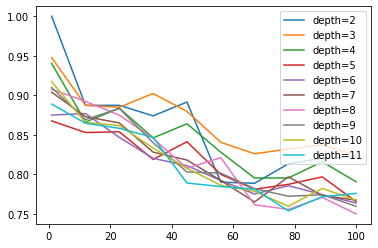

In [9]:
# смотрим результат

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for i in range(scores1.shape[0]):
    plt.plot(np.linspace(1, 100, 10), scores1[i], label='depth=' + str(np.arange(2, 12)[i]))
plt.legend()

Заметим, что глубина = 3 достаточно норм предсказывает

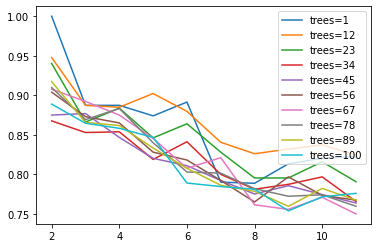

In [10]:
for i in range(scores1.shape[1]):
    plt.plot(np.arange(2, 12), scores1[i], label='trees=' + str(int(np.linspace(1, 100, 10)[i])))
plt.legend()

Заметим, что при кол-ве деревьев = 12 лучший счёт

Итого оптимальные гиперпараметры: глубина = 3, кол-ве деревьев = 12

Но теперь добьем видеокарту тем, что пройдемся по разным гиперпораметрам и найдем их лучшее сочетание:

In [11]:
max_score = 0
best_depth = -1
best_n_estimators_count = -1

for n_trees in range(1, 201, 30): # используем разное кол-во деревьев
    for depth in range(1, 16): # используем разную глубину
        p = CatBoostClassifier(n_estimators=n_trees, max_depth=depth, task_type="GPU").fit(X_train, y_train).predict(X_test)
        score = precision_score(y_test, p)
        if max_score < score and score != 1:
            max_score = score
            best_depth = depth
            best_n_estimators_count = n_trees
            print('max_score:',max_score,'\t n_trees:', n_trees, 'depth:', depth)



Learning rate set to 0.5
0:	learn: 0.5769482	total: 1.66ms	remaining: 0us
Learning rate set to 0.5


0:	learn: 0.5744398	total: 3.21ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5517179	total: 3.25ms	remaining: 0us
max_score: 0.8873239436619719 	 n_trees: 1 depth: 3


Learning rate set to 0.5
0:	learn: 0.5555726	total: 3.83ms	remaining: 0us
Learning rate set to 0.5


0:	learn: 0.5470806	total: 2.65ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5501477	total: 5.11ms	remaining: 0us
max_score: 0.8914728682170543 	 n_trees: 1 depth: 6
Learning rate set to 0.5
0:	learn: 0.5569616	total: 2.93ms	remaining: 0us
Learning rate set to 0.5


0:	learn: 0.5538493	total: 4.38ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5668132	total: 6.16ms	remaining: 0us


Learning rate set to 0.5
0:	learn: 0.5745630	total: 6.63ms	remaining: 0us
Learning rate set to 0.5


0:	learn: 0.5782605	total: 8.79ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5834705	total: 13.6ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5833648	total: 27.2ms	remaining: 0us


Learning rate set to 0.5
0:	learn: 0.5847873	total: 50.7ms	remaining: 0us
Learning rate set to 0.5


0:	learn: 0.5901842	total: 89.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5769482	total: 2.48ms	remaining: 74.5ms
1:	learn: 0.5419694	total: 3.63ms	remaining: 52.6ms
2:	learn: 0.5178359	total: 4.55ms	remaining: 42.5ms
3:	learn: 0.5141825	total: 5.7ms	remaining: 38.5ms
4:	learn: 0.5017622	total: 6.61ms	remaining: 34.3ms
5:	learn: 0.4966195	total: 7.68ms	remaining: 32ms
6:	learn: 0.4930572	total: 8.72ms	remaining: 29.9ms
7:	learn: 0.4905959	total: 9.87ms	remaining: 28.4ms
8:	learn: 0.4873249	total: 10.9ms	remaining: 26.7ms
9:	learn: 0.4840847	total: 11.9ms	remaining: 25.1ms
10:	learn: 0.4768081	total: 13ms	remaining: 23.7ms
11:	learn: 0.4715610	total: 14.1ms	remaining: 22.3ms
12:	learn: 0.4698362	total: 15.4ms	remaining: 21.3ms
13:	learn: 0.4668133	total: 16.6ms	remaining: 20.1ms
14:	learn: 0.4654987	total: 17.6ms	remaining: 18.8ms
15:	learn: 0.4625377	total: 18.6ms	remaining: 17.4ms
16:	learn: 0.4606281	total: 19.6ms	remaining: 16.1ms
17:	learn: 0.4602323	total: 20.4ms	remai

25:	learn: 0.4486529	total: 29.3ms	remaining: 5.63ms
26:	learn: 0.4476926	total: 30.4ms	remaining: 4.5ms
27:	learn: 0.4466291	total: 31.5ms	remaining: 3.37ms
28:	learn: 0.4456947	total: 32.5ms	remaining: 2.24ms
29:	learn: 0.4450424	total: 33.6ms	remaining: 1.12ms
30:	learn: 0.4446638	total: 34.6ms	remaining: 0us
max_score: 0.9185185185185185 	 n_trees: 31 depth: 1
Learning rate set to 0.5
0:	learn: 0.5744398	total: 1.83ms	remaining: 55ms
1:	learn: 0.5254090	total: 2.67ms	remaining: 38.8ms
2:	learn: 0.5097016	total: 3.41ms	remaining: 31.9ms
3:	learn: 0.4887642	total: 4.16ms	remaining: 28.1ms
4:	learn: 0.4773957	total: 5.16ms	remaining: 26.8ms
5:	learn: 0.4720694	total: 5.96ms	remaining: 24.8ms
6:	learn: 0.4583488	total: 6.73ms	remaining: 23.1ms
7:	learn: 0.4561689	total: 7.58ms	remaining: 21.8ms
8:	learn: 0.4497866	total: 12.4ms	remaining: 30.3ms
9:	learn: 0.4452636	total: 13.6ms	remaining: 28.5ms
10:	learn: 0.4410275	total: 14.6ms	remaining: 26.6ms
11:	learn: 0.4399824	total: 15.5ms	re

19:	learn: 0.4095825	total: 34.1ms	remaining: 18.7ms
20:	learn: 0.4071205	total: 36.9ms	remaining: 17.6ms
21:	learn: 0.4056243	total: 38.8ms	remaining: 15.9ms
22:	learn: 0.4008410	total: 41.4ms	remaining: 14.4ms
23:	learn: 0.3980994	total: 43ms	remaining: 12.5ms
24:	learn: 0.3945445	total: 45.7ms	remaining: 11ms
25:	learn: 0.3917401	total: 48.3ms	remaining: 9.28ms
26:	learn: 0.3907433	total: 50ms	remaining: 7.41ms
27:	learn: 0.3874641	total: 51.2ms	remaining: 5.48ms
28:	learn: 0.3841227	total: 52.5ms	remaining: 3.62ms
29:	learn: 0.3805832	total: 53.7ms	remaining: 1.79ms
30:	learn: 0.3802189	total: 54.9ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.5555726	total: 2.49ms	remaining: 74.7ms
1:	learn: 0.5176122	total: 3.96ms	remaining: 57.4ms
2:	learn: 0.4776871	total: 7.02ms	remaining: 65.5ms
3:	learn: 0.4564150	total: 8.24ms	remaining: 55.7ms
4:	learn: 0.4450863	total: 10.8ms	remaining: 56ms
5:	learn: 0.4338136	total: 12.1ms	remaining: 50.6ms
6:	learn: 0.4238298	total: 13.2ms	rema

9:	learn: 0.4121131	total: 18.4ms	remaining: 38.6ms
10:	learn: 0.4081179	total: 21.5ms	remaining: 39.2ms
11:	learn: 0.4051609	total: 25ms	remaining: 39.5ms
12:	learn: 0.3997955	total: 27.7ms	remaining: 38.4ms
13:	learn: 0.3967443	total: 30.1ms	remaining: 36.5ms
14:	learn: 0.3933886	total: 32.1ms	remaining: 34.2ms
15:	learn: 0.3914945	total: 34.3ms	remaining: 32.2ms
16:	learn: 0.3907515	total: 36.2ms	remaining: 29.8ms
17:	learn: 0.3887216	total: 37.9ms	remaining: 27.3ms
18:	learn: 0.3839631	total: 40.7ms	remaining: 25.7ms
19:	learn: 0.3823508	total: 42.2ms	remaining: 23.2ms
20:	learn: 0.3787926	total: 43.8ms	remaining: 20.9ms
21:	learn: 0.3771557	total: 48.3ms	remaining: 19.8ms
22:	learn: 0.3712555	total: 49.9ms	remaining: 17.4ms
23:	learn: 0.3696092	total: 52.4ms	remaining: 15.3ms
24:	learn: 0.3647305	total: 53.6ms	remaining: 12.9ms
25:	learn: 0.3624643	total: 54.8ms	remaining: 10.5ms
26:	learn: 0.3598475	total: 56.1ms	remaining: 8.31ms
27:	learn: 0.3578104	total: 57.4ms	remaining: 6.1

0:	learn: 0.5470806	total: 2.71ms	remaining: 81.5ms
1:	learn: 0.4867804	total: 5.41ms	remaining: 78.4ms
2:	learn: 0.4645485	total: 8.01ms	remaining: 74.7ms
3:	learn: 0.4440048	total: 11.2ms	remaining: 75.5ms
4:	learn: 0.4317888	total: 13.8ms	remaining: 72ms
5:	learn: 0.4230014	total: 15.4ms	remaining: 64.3ms
6:	learn: 0.4152747	total: 17.3ms	remaining: 59.4ms
7:	learn: 0.4097974	total: 18.8ms	remaining: 54ms
8:	learn: 0.4016801	total: 20.2ms	remaining: 49.4ms
9:	learn: 0.3970161	total: 22.7ms	remaining: 47.6ms
10:	learn: 0.3934082	total: 25.2ms	remaining: 45.8ms
11:	learn: 0.3913483	total: 29.2ms	remaining: 46.3ms
12:	learn: 0.3866839	total: 31.4ms	remaining: 43.4ms
13:	learn: 0.3829706	total: 33ms	remaining: 40.1ms
14:	learn: 0.3781661	total: 36.6ms	remaining: 39.1ms
15:	learn: 0.3754261	total: 38.7ms	remaining: 36.2ms
16:	learn: 0.3741389	total: 40.5ms	remaining: 33.4ms
17:	learn: 0.3716599	total: 43.2ms	remaining: 31.2ms
18:	learn: 0.3692114	total: 45.5ms	remaining: 28.7ms
19:	learn

0:	learn: 0.5501477	total: 2.99ms	remaining: 89.8ms
1:	learn: 0.4914044	total: 5.98ms	remaining: 86.7ms
2:	learn: 0.4546127	total: 7.87ms	remaining: 73.5ms
3:	learn: 0.4371828	total: 10.5ms	remaining: 71ms
4:	learn: 0.4239388	total: 12.3ms	remaining: 63.8ms
5:	learn: 0.4108627	total: 13.9ms	remaining: 57.8ms
6:	learn: 0.4024891	total: 15.3ms	remaining: 52.5ms
7:	learn: 0.3967609	total: 16.8ms	remaining: 48.3ms
8:	learn: 0.3905782	total: 18.9ms	remaining: 46.3ms
9:	learn: 0.3840075	total: 20.8ms	remaining: 43.7ms
10:	learn: 0.3801494	total: 22.8ms	remaining: 41.4ms
11:	learn: 0.3772171	total: 25.4ms	remaining: 40.3ms
12:	learn: 0.3685900	total: 27.2ms	remaining: 37.7ms
13:	learn: 0.3648015	total: 29.1ms	remaining: 35.3ms
14:	learn: 0.3609849	total: 30.7ms	remaining: 32.8ms
15:	learn: 0.3578068	total: 32.3ms	remaining: 30.3ms
16:	learn: 0.3539555	total: 34.5ms	remaining: 28.4ms
17:	learn: 0.3507705	total: 36ms	remaining: 26ms
18:	learn: 0.3463473	total: 37.7ms	remaining: 23.8ms
19:	learn

0:	learn: 0.5569616	total: 3.81ms	remaining: 114ms
1:	learn: 0.4957978	total: 7.61ms	remaining: 110ms
2:	learn: 0.4578971	total: 11.6ms	remaining: 109ms
3:	learn: 0.4383901	total: 15.1ms	remaining: 102ms
4:	learn: 0.4251755	total: 19.6ms	remaining: 102ms
5:	learn: 0.4106233	total: 23.4ms	remaining: 97.7ms
6:	learn: 0.3973115	total: 28.7ms	remaining: 98.5ms
7:	learn: 0.3907097	total: 32.1ms	remaining: 92.2ms
8:	learn: 0.3844089	total: 35.4ms	remaining: 86.5ms
9:	learn: 0.3785242	total: 40.3ms	remaining: 84.7ms
10:	learn: 0.3732754	total: 45.3ms	remaining: 82.4ms
11:	learn: 0.3720457	total: 47.5ms	remaining: 75.2ms
12:	learn: 0.3681020	total: 51.2ms	remaining: 70.9ms
13:	learn: 0.3624675	total: 54.4ms	remaining: 66.1ms
14:	learn: 0.3565746	total: 59.2ms	remaining: 63.1ms
15:	learn: 0.3527127	total: 62.5ms	remaining: 58.6ms
16:	learn: 0.3509533	total: 66.2ms	remaining: 54.6ms
17:	learn: 0.3478030	total: 69.5ms	remaining: 50.2ms
18:	learn: 0.3451411	total: 72.9ms	remaining: 46.1ms
19:	lear

0:	learn: 0.5538493	total: 4.09ms	remaining: 123ms
1:	learn: 0.5038424	total: 6.95ms	remaining: 101ms
2:	learn: 0.4640770	total: 10ms	remaining: 93.7ms
3:	learn: 0.4373580	total: 12.4ms	remaining: 83.8ms
4:	learn: 0.4156806	total: 14.7ms	remaining: 76.6ms
5:	learn: 0.4056920	total: 17.2ms	remaining: 71.5ms
6:	learn: 0.3945859	total: 18.5ms	remaining: 63.4ms
7:	learn: 0.3883490	total: 20.8ms	remaining: 59.8ms
8:	learn: 0.3809976	total: 23.7ms	remaining: 57.8ms
9:	learn: 0.3747372	total: 26.4ms	remaining: 55.4ms
10:	learn: 0.3675146	total: 29.2ms	remaining: 53.1ms
11:	learn: 0.3606232	total: 35.4ms	remaining: 56ms
12:	learn: 0.3543556	total: 37.6ms	remaining: 52.1ms
13:	learn: 0.3474012	total: 39.9ms	remaining: 48.5ms
14:	learn: 0.3425870	total: 42.5ms	remaining: 45.4ms
15:	learn: 0.3388606	total: 48.1ms	remaining: 45.1ms
16:	learn: 0.3346364	total: 50.6ms	remaining: 41.7ms
17:	learn: 0.3285758	total: 53.2ms	remaining: 38.4ms
18:	learn: 0.3226947	total: 55.8ms	remaining: 35.2ms
19:	learn

0:	learn: 0.5668132	total: 6.1ms	remaining: 183ms
1:	learn: 0.5116298	total: 10.6ms	remaining: 154ms
2:	learn: 0.4675866	total: 13ms	remaining: 121ms
3:	learn: 0.4368980	total: 16.9ms	remaining: 114ms
4:	learn: 0.4162519	total: 21ms	remaining: 109ms
5:	learn: 0.4019627	total: 25.8ms	remaining: 108ms
6:	learn: 0.3899794	total: 29.8ms	remaining: 102ms
7:	learn: 0.3894724	total: 31.1ms	remaining: 89.4ms
8:	learn: 0.3800881	total: 35.2ms	remaining: 85.9ms
9:	learn: 0.3733527	total: 39.5ms	remaining: 83.1ms
10:	learn: 0.3664331	total: 43.9ms	remaining: 79.9ms
11:	learn: 0.3593476	total: 48.1ms	remaining: 76.2ms
12:	learn: 0.3504316	total: 52.3ms	remaining: 72.4ms
13:	learn: 0.3458190	total: 56ms	remaining: 68ms
14:	learn: 0.3397189	total: 59.4ms	remaining: 63.3ms
15:	learn: 0.3348750	total: 62.4ms	remaining: 58.5ms
16:	learn: 0.3290032	total: 65.5ms	remaining: 53.9ms
17:	learn: 0.3249991	total: 69ms	remaining: 49.8ms
18:	learn: 0.3212723	total: 72.6ms	remaining: 45.8ms
19:	learn: 0.3172703	

0:	learn: 0.5745630	total: 6.66ms	remaining: 200ms
1:	learn: 0.5063400	total: 12.2ms	remaining: 177ms
2:	learn: 0.4702969	total: 18.3ms	remaining: 171ms
3:	learn: 0.4469463	total: 23.8ms	remaining: 161ms
4:	learn: 0.4276702	total: 29.9ms	remaining: 155ms
5:	learn: 0.4074583	total: 36.1ms	remaining: 150ms
6:	learn: 0.3939253	total: 42.2ms	remaining: 145ms
7:	learn: 0.3850445	total: 48.8ms	remaining: 140ms
8:	learn: 0.3719639	total: 55.9ms	remaining: 137ms
9:	learn: 0.3630542	total: 58.4ms	remaining: 123ms
10:	learn: 0.3554603	total: 63.1ms	remaining: 115ms
11:	learn: 0.3492670	total: 72.2ms	remaining: 114ms
12:	learn: 0.3430204	total: 78ms	remaining: 108ms
13:	learn: 0.3370947	total: 84.5ms	remaining: 103ms
14:	learn: 0.3276426	total: 90.1ms	remaining: 96.1ms
15:	learn: 0.3216869	total: 96.9ms	remaining: 90.8ms
16:	learn: 0.3142638	total: 105ms	remaining: 86.4ms
17:	learn: 0.3074948	total: 113ms	remaining: 81.5ms
18:	learn: 0.3005774	total: 120ms	remaining: 76ms
19:	learn: 0.2966597	tot

15:	learn: 0.3261799	total: 119ms	remaining: 112ms
16:	learn: 0.3186422	total: 128ms	remaining: 105ms
17:	learn: 0.3110940	total: 135ms	remaining: 97.5ms
18:	learn: 0.3059234	total: 143ms	remaining: 90.1ms
19:	learn: 0.3010575	total: 151ms	remaining: 83.2ms
20:	learn: 0.2948943	total: 159ms	remaining: 75.7ms
21:	learn: 0.2891149	total: 168ms	remaining: 68.6ms
22:	learn: 0.2839285	total: 176ms	remaining: 61.2ms
23:	learn: 0.2799527	total: 186ms	remaining: 54.3ms
24:	learn: 0.2747055	total: 194ms	remaining: 46.5ms
25:	learn: 0.2703246	total: 202ms	remaining: 38.8ms
26:	learn: 0.2666183	total: 209ms	remaining: 31ms
27:	learn: 0.2628349	total: 217ms	remaining: 23.3ms
28:	learn: 0.2570287	total: 225ms	remaining: 15.5ms
29:	learn: 0.2519283	total: 233ms	remaining: 7.77ms
30:	learn: 0.2485086	total: 241ms	remaining: 0us
Learning rate set to 0.5


0:	learn: 0.5834705	total: 16.7ms	remaining: 502ms
1:	learn: 0.5219020	total: 31.3ms	remaining: 454ms
2:	learn: 0.4829582	total: 45.3ms	remaining: 423ms
3:	learn: 0.4557788	total: 60.7ms	remaining: 410ms
4:	learn: 0.4312433	total: 74.1ms	remaining: 385ms
5:	learn: 0.4127808	total: 79.4ms	remaining: 331ms
6:	learn: 0.3962739	total: 93.1ms	remaining: 319ms
7:	learn: 0.3840690	total: 107ms	remaining: 309ms
8:	learn: 0.3745528	total: 109ms	remaining: 266ms
9:	learn: 0.3666987	total: 111ms	remaining: 233ms
10:	learn: 0.3581359	total: 124ms	remaining: 226ms
11:	learn: 0.3491253	total: 143ms	remaining: 226ms
12:	learn: 0.3426759	total: 150ms	remaining: 208ms
13:	learn: 0.3369075	total: 168ms	remaining: 204ms
14:	learn: 0.3271580	total: 185ms	remaining: 198ms
15:	learn: 0.3216811	total: 202ms	remaining: 189ms
16:	learn: 0.3142239	total: 221ms	remaining: 182ms
17:	learn: 0.3067646	total: 237ms	remaining: 171ms
18:	learn: 0.3018484	total: 253ms	remaining: 160ms
19:	learn: 0.2958502	total: 267ms	

4:	learn: 0.4336692	total: 114ms	remaining: 590ms
5:	learn: 0.4107617	total: 115ms	remaining: 480ms
6:	learn: 0.3951099	total: 138ms	remaining: 473ms
7:	learn: 0.3826375	total: 163ms	remaining: 468ms
8:	learn: 0.3733288	total: 165ms	remaining: 403ms
9:	learn: 0.3643237	total: 188ms	remaining: 396ms
10:	learn: 0.3543518	total: 212ms	remaining: 386ms
11:	learn: 0.3487848	total: 216ms	remaining: 341ms
12:	learn: 0.3404894	total: 246ms	remaining: 340ms
13:	learn: 0.3314835	total: 274ms	remaining: 333ms
14:	learn: 0.3231735	total: 300ms	remaining: 320ms
15:	learn: 0.3167421	total: 326ms	remaining: 306ms
16:	learn: 0.3079571	total: 356ms	remaining: 293ms
17:	learn: 0.3004677	total: 384ms	remaining: 277ms
18:	learn: 0.2943133	total: 415ms	remaining: 262ms
19:	learn: 0.2886286	total: 439ms	remaining: 241ms
20:	learn: 0.2818636	total: 463ms	remaining: 220ms
21:	learn: 0.2739506	total: 487ms	remaining: 199ms
22:	learn: 0.2679490	total: 514ms	remaining: 179ms
23:	learn: 0.2636993	total: 539ms	rem

2:	learn: 0.4853145	total: 147ms	remaining: 1.37s
3:	learn: 0.4506955	total: 194ms	remaining: 1.31s
4:	learn: 0.4242554	total: 207ms	remaining: 1.08s
5:	learn: 0.4073008	total: 250ms	remaining: 1.04s
6:	learn: 0.3895145	total: 292ms	remaining: 1s
7:	learn: 0.3810047	total: 293ms	remaining: 843ms
8:	learn: 0.3674448	total: 336ms	remaining: 821ms
9:	learn: 0.3562262	total: 379ms	remaining: 796ms
10:	learn: 0.3481227	total: 390ms	remaining: 710ms
11:	learn: 0.3385999	total: 426ms	remaining: 675ms
12:	learn: 0.3317667	total: 433ms	remaining: 600ms
13:	learn: 0.3246191	total: 475ms	remaining: 577ms
14:	learn: 0.3154720	total: 518ms	remaining: 552ms
15:	learn: 0.3071974	total: 576ms	remaining: 540ms
16:	learn: 0.2987052	total: 627ms	remaining: 517ms
17:	learn: 0.2919765	total: 670ms	remaining: 484ms
18:	learn: 0.2858171	total: 714ms	remaining: 451ms
19:	learn: 0.2781794	total: 757ms	remaining: 416ms
20:	learn: 0.2716699	total: 800ms	remaining: 381ms
21:	learn: 0.2648280	total: 847ms	remainin

2:	learn: 0.4852574	total: 138ms	remaining: 1.28s
3:	learn: 0.4513688	total: 224ms	remaining: 1.51s
4:	learn: 0.4264199	total: 285ms	remaining: 1.48s
5:	learn: 0.4063958	total: 370ms	remaining: 1.54s
6:	learn: 0.3878542	total: 375ms	remaining: 1.28s
7:	learn: 0.3769677	total: 377ms	remaining: 1.08s
8:	learn: 0.3703376	total: 379ms	remaining: 927ms
9:	learn: 0.3629901	total: 416ms	remaining: 875ms
10:	learn: 0.3507780	total: 498ms	remaining: 905ms
11:	learn: 0.3408408	total: 582ms	remaining: 921ms
12:	learn: 0.3310527	total: 603ms	remaining: 835ms
13:	learn: 0.3243442	total: 686ms	remaining: 833ms
14:	learn: 0.3163329	total: 767ms	remaining: 818ms
15:	learn: 0.3067921	total: 851ms	remaining: 798ms
16:	learn: 0.2960554	total: 952ms	remaining: 784ms
17:	learn: 0.2887497	total: 1.03s	remaining: 746ms
18:	learn: 0.2818368	total: 1.12s	remaining: 705ms
19:	learn: 0.2745375	total: 1.2s	remaining: 660ms
20:	learn: 0.2677042	total: 1.28s	remaining: 612ms
21:	learn: 0.2603417	total: 1.37s	remain

40:	learn: 0.4428136	total: 25.4ms	remaining: 12.4ms
41:	learn: 0.4427053	total: 26ms	remaining: 11.7ms
42:	learn: 0.4418393	total: 26.7ms	remaining: 11.2ms
43:	learn: 0.4413221	total: 27.4ms	remaining: 10.6ms
44:	learn: 0.4410432	total: 28ms	remaining: 9.95ms
45:	learn: 0.4403411	total: 28.5ms	remaining: 9.31ms
46:	learn: 0.4402248	total: 29.1ms	remaining: 8.67ms
47:	learn: 0.4396450	total: 29.7ms	remaining: 8.04ms
48:	learn: 0.4396039	total: 30.3ms	remaining: 7.43ms
49:	learn: 0.4393582	total: 31ms	remaining: 6.82ms
50:	learn: 0.4393579	total: 31.6ms	remaining: 6.19ms
51:	learn: 0.4393519	total: 32.2ms	remaining: 5.57ms
52:	learn: 0.4388307	total: 33.1ms	remaining: 5ms
53:	learn: 0.4383409	total: 33.7ms	remaining: 4.37ms
54:	learn: 0.4381630	total: 34.2ms	remaining: 3.73ms
55:	learn: 0.4377167	total: 34.8ms	remaining: 3.1ms
56:	learn: 0.4377162	total: 35.4ms	remaining: 2.48ms
57:	learn: 0.4375194	total: 36.1ms	remaining: 1.86ms
58:	learn: 0.4374257	total: 36.6ms	remaining: 1.24ms
59:

2:	learn: 0.5010093	total: 6.19ms	remaining: 120ms
3:	learn: 0.4800380	total: 7.98ms	remaining: 114ms
4:	learn: 0.4707299	total: 9.69ms	remaining: 109ms
5:	learn: 0.4571701	total: 11.1ms	remaining: 102ms
6:	learn: 0.4461248	total: 12.2ms	remaining: 94.3ms
7:	learn: 0.4421820	total: 13.1ms	remaining: 87.1ms
8:	learn: 0.4370464	total: 14.2ms	remaining: 82.1ms
9:	learn: 0.4348177	total: 15.3ms	remaining: 77.8ms
10:	learn: 0.4322193	total: 16.3ms	remaining: 74.1ms
11:	learn: 0.4303464	total: 17.1ms	remaining: 69.9ms
12:	learn: 0.4267754	total: 18ms	remaining: 66.3ms
13:	learn: 0.4215176	total: 19.1ms	remaining: 64.2ms
14:	learn: 0.4202453	total: 20.1ms	remaining: 61.7ms
15:	learn: 0.4165522	total: 21.1ms	remaining: 59.5ms
16:	learn: 0.4153596	total: 22.1ms	remaining: 57.3ms
17:	learn: 0.4137516	total: 23ms	remaining: 55ms
18:	learn: 0.4117517	total: 24ms	remaining: 53.1ms
19:	learn: 0.4103593	total: 25ms	remaining: 51.2ms
20:	learn: 0.4085420	total: 25.9ms	remaining: 49.3ms
21:	learn: 0.40

0:	learn: 0.5722603	total: 2.81ms	remaining: 169ms
1:	learn: 0.5358259	total: 4.76ms	remaining: 141ms
2:	learn: 0.4931446	total: 6.54ms	remaining: 126ms
3:	learn: 0.4681454	total: 8.54ms	remaining: 122ms
4:	learn: 0.4520111	total: 10.3ms	remaining: 115ms
5:	learn: 0.4404852	total: 12ms	remaining: 110ms
6:	learn: 0.4311820	total: 13.5ms	remaining: 104ms
7:	learn: 0.4287309	total: 15.1ms	remaining: 100ms
8:	learn: 0.4249285	total: 17ms	remaining: 98ms
9:	learn: 0.4204410	total: 19ms	remaining: 97ms
10:	learn: 0.4169313	total: 21.5ms	remaining: 97.7ms
11:	learn: 0.4138374	total: 23.4ms	remaining: 95.7ms
12:	learn: 0.4105867	total: 25.2ms	remaining: 93.1ms
13:	learn: 0.4056173	total: 27.4ms	remaining: 91.9ms
14:	learn: 0.4036242	total: 28.7ms	remaining: 88.1ms
15:	learn: 0.4009444	total: 29.8ms	remaining: 83.8ms
16:	learn: 0.3973142	total: 30.8ms	remaining: 79.8ms
17:	learn: 0.3943883	total: 31.9ms	remaining: 76.1ms
18:	learn: 0.3925641	total: 32.9ms	remaining: 72.8ms
19:	learn: 0.3897530	

0:	learn: 0.5650984	total: 3.67ms	remaining: 220ms
1:	learn: 0.5043001	total: 8.2ms	remaining: 242ms
2:	learn: 0.4731976	total: 11.5ms	remaining: 222ms
3:	learn: 0.4520699	total: 13.9ms	remaining: 198ms
4:	learn: 0.4398749	total: 16.4ms	remaining: 184ms
5:	learn: 0.4310809	total: 19.7ms	remaining: 180ms
6:	learn: 0.4224368	total: 22.1ms	remaining: 170ms
7:	learn: 0.4171230	total: 24.4ms	remaining: 161ms
8:	learn: 0.4126096	total: 26.4ms	remaining: 153ms
9:	learn: 0.4086489	total: 28.8ms	remaining: 147ms
10:	learn: 0.4032664	total: 31.1ms	remaining: 142ms
11:	learn: 0.4009625	total: 33.5ms	remaining: 137ms
12:	learn: 0.3976688	total: 35.7ms	remaining: 132ms
13:	learn: 0.3956955	total: 38.1ms	remaining: 128ms
14:	learn: 0.3914078	total: 40.5ms	remaining: 124ms
15:	learn: 0.3880053	total: 42.6ms	remaining: 120ms
16:	learn: 0.3853288	total: 44.7ms	remaining: 116ms
17:	learn: 0.3826774	total: 47.1ms	remaining: 112ms
18:	learn: 0.3803887	total: 49.5ms	remaining: 109ms
19:	learn: 0.3782788	to

0:	learn: 0.5681210	total: 2.81ms	remaining: 169ms
1:	learn: 0.5093039	total: 4.67ms	remaining: 138ms
2:	learn: 0.4696215	total: 6.36ms	remaining: 123ms
3:	learn: 0.4496232	total: 7.81ms	remaining: 111ms
4:	learn: 0.4379187	total: 9.6ms	remaining: 107ms
5:	learn: 0.4255175	total: 11.3ms	remaining: 103ms
6:	learn: 0.4188386	total: 13.1ms	remaining: 101ms
7:	learn: 0.4106941	total: 14.7ms	remaining: 97.2ms
8:	learn: 0.4044084	total: 16.3ms	remaining: 94ms
9:	learn: 0.3983144	total: 17.8ms	remaining: 90.6ms
10:	learn: 0.3946235	total: 19.4ms	remaining: 88.2ms
11:	learn: 0.3916480	total: 21.2ms	remaining: 86.5ms
12:	learn: 0.3837738	total: 23.1ms	remaining: 85.3ms
13:	learn: 0.3822715	total: 24.8ms	remaining: 83.3ms
14:	learn: 0.3785821	total: 26.5ms	remaining: 81.3ms
15:	learn: 0.3756012	total: 28.2ms	remaining: 79.4ms
16:	learn: 0.3727774	total: 30ms	remaining: 77.7ms
17:	learn: 0.3678401	total: 31.9ms	remaining: 76.1ms
18:	learn: 0.3644136	total: 33.6ms	remaining: 74.4ms
19:	learn: 0.36

0:	learn: 0.5744860	total: 3.14ms	remaining: 188ms
1:	learn: 0.5139512	total: 5.44ms	remaining: 161ms
2:	learn: 0.4746731	total: 7.49ms	remaining: 145ms
3:	learn: 0.4537384	total: 9.71ms	remaining: 138ms
4:	learn: 0.4385414	total: 11.9ms	remaining: 133ms
5:	learn: 0.4229824	total: 13.9ms	remaining: 127ms
6:	learn: 0.4115024	total: 15.9ms	remaining: 123ms
7:	learn: 0.4020618	total: 18.1ms	remaining: 120ms
8:	learn: 0.3939284	total: 20.3ms	remaining: 117ms
9:	learn: 0.3891912	total: 22.5ms	remaining: 115ms
10:	learn: 0.3848097	total: 24.4ms	remaining: 111ms
11:	learn: 0.3831013	total: 25.9ms	remaining: 106ms
12:	learn: 0.3780408	total: 28.2ms	remaining: 104ms
13:	learn: 0.3743201	total: 30.8ms	remaining: 103ms
14:	learn: 0.3699879	total: 33.2ms	remaining: 102ms
15:	learn: 0.3660494	total: 35.3ms	remaining: 99.3ms
16:	learn: 0.3644034	total: 37.4ms	remaining: 96.7ms
17:	learn: 0.3612308	total: 39.5ms	remaining: 94.4ms
18:	learn: 0.3574822	total: 41.4ms	remaining: 91.6ms
19:	learn: 0.35174

42:	learn: 0.2650501	total: 114ms	remaining: 47.9ms
43:	learn: 0.2619268	total: 117ms	remaining: 45.4ms
44:	learn: 0.2605803	total: 121ms	remaining: 43ms
45:	learn: 0.2590344	total: 125ms	remaining: 40.6ms
46:	learn: 0.2575910	total: 127ms	remaining: 37.9ms
47:	learn: 0.2556401	total: 130ms	remaining: 35.1ms
48:	learn: 0.2540992	total: 133ms	remaining: 32.5ms
49:	learn: 0.2516757	total: 135ms	remaining: 29.8ms
50:	learn: 0.2498369	total: 138ms	remaining: 27ms
51:	learn: 0.2474285	total: 141ms	remaining: 24.3ms
52:	learn: 0.2455547	total: 144ms	remaining: 21.8ms
53:	learn: 0.2433745	total: 147ms	remaining: 19.1ms
54:	learn: 0.2419087	total: 150ms	remaining: 16.3ms
55:	learn: 0.2403033	total: 152ms	remaining: 13.6ms
56:	learn: 0.2393364	total: 154ms	remaining: 10.8ms
57:	learn: 0.2382327	total: 157ms	remaining: 8.12ms
58:	learn: 0.2368363	total: 160ms	remaining: 5.42ms
59:	learn: 0.2351488	total: 162ms	remaining: 2.7ms
60:	learn: 0.2333589	total: 165ms	remaining: 0us
Learning rate set to

0:	learn: 0.5833000	total: 5.48ms	remaining: 329ms
1:	learn: 0.5299402	total: 11.4ms	remaining: 337ms
2:	learn: 0.4849873	total: 14.3ms	remaining: 277ms
3:	learn: 0.4530593	total: 20.7ms	remaining: 295ms
4:	learn: 0.4339771	total: 28.1ms	remaining: 315ms
5:	learn: 0.4201081	total: 32.8ms	remaining: 301ms
6:	learn: 0.3995368	total: 41.3ms	remaining: 319ms
7:	learn: 0.3932902	total: 45.9ms	remaining: 304ms
8:	learn: 0.3811957	total: 50.3ms	remaining: 290ms
9:	learn: 0.3790081	total: 52.5ms	remaining: 268ms
10:	learn: 0.3728770	total: 58.3ms	remaining: 265ms
11:	learn: 0.3691561	total: 61.5ms	remaining: 251ms
12:	learn: 0.3607435	total: 66.5ms	remaining: 246ms
13:	learn: 0.3569564	total: 70.3ms	remaining: 236ms
14:	learn: 0.3514219	total: 75.1ms	remaining: 230ms
15:	learn: 0.3466231	total: 79.5ms	remaining: 224ms
16:	learn: 0.3434547	total: 83.2ms	remaining: 215ms
17:	learn: 0.3404285	total: 86.7ms	remaining: 207ms
18:	learn: 0.3334802	total: 90.5ms	remaining: 200ms
19:	learn: 0.3288114	t

0:	learn: 0.5901644	total: 6.17ms	remaining: 370ms
1:	learn: 0.5246082	total: 13.4ms	remaining: 396ms
2:	learn: 0.4872494	total: 18.9ms	remaining: 365ms
3:	learn: 0.4621725	total: 24.6ms	remaining: 350ms
4:	learn: 0.4446285	total: 31.1ms	remaining: 348ms
5:	learn: 0.4226096	total: 36ms	remaining: 330ms
6:	learn: 0.4107262	total: 41.3ms	remaining: 318ms
7:	learn: 0.4018028	total: 48ms	remaining: 318ms
8:	learn: 0.3907550	total: 53.8ms	remaining: 311ms
9:	learn: 0.3815859	total: 57.1ms	remaining: 291ms
10:	learn: 0.3776948	total: 59.2ms	remaining: 269ms
11:	learn: 0.3685676	total: 64.2ms	remaining: 262ms
12:	learn: 0.3591244	total: 69.8ms	remaining: 258ms
13:	learn: 0.3535894	total: 75.1ms	remaining: 252ms
14:	learn: 0.3477706	total: 80.6ms	remaining: 247ms
15:	learn: 0.3419314	total: 85.9ms	remaining: 242ms
16:	learn: 0.3396301	total: 91ms	remaining: 235ms
17:	learn: 0.3331732	total: 96ms	remaining: 229ms
18:	learn: 0.3283766	total: 102ms	remaining: 225ms
19:	learn: 0.3242297	total: 107

12:	learn: 0.3617741	total: 88.5ms	remaining: 327ms
13:	learn: 0.3598075	total: 90.5ms	remaining: 304ms
14:	learn: 0.3511555	total: 99.4ms	remaining: 305ms
15:	learn: 0.3451091	total: 110ms	remaining: 310ms
16:	learn: 0.3369314	total: 123ms	remaining: 319ms
17:	learn: 0.3291394	total: 134ms	remaining: 320ms
18:	learn: 0.3221575	total: 146ms	remaining: 322ms
19:	learn: 0.3178606	total: 159ms	remaining: 326ms
20:	learn: 0.3095592	total: 173ms	remaining: 330ms
21:	learn: 0.3023809	total: 186ms	remaining: 330ms
22:	learn: 0.2983582	total: 199ms	remaining: 328ms
23:	learn: 0.2938269	total: 210ms	remaining: 324ms
24:	learn: 0.2886120	total: 223ms	remaining: 321ms
25:	learn: 0.2847108	total: 235ms	remaining: 317ms
26:	learn: 0.2819876	total: 248ms	remaining: 312ms
27:	learn: 0.2790673	total: 260ms	remaining: 307ms
28:	learn: 0.2758115	total: 273ms	remaining: 302ms
29:	learn: 0.2717753	total: 283ms	remaining: 293ms
30:	learn: 0.2675039	total: 292ms	remaining: 283ms
31:	learn: 0.2642706	total: 

0:	learn: 0.5981974	total: 14.4ms	remaining: 862ms
1:	learn: 0.5398423	total: 26.6ms	remaining: 786ms
2:	learn: 0.5014630	total: 39.2ms	remaining: 757ms
3:	learn: 0.4664269	total: 54ms	remaining: 770ms
4:	learn: 0.4436690	total: 69.8ms	remaining: 782ms
5:	learn: 0.4255307	total: 74.8ms	remaining: 685ms
6:	learn: 0.4122670	total: 88.9ms	remaining: 686ms
7:	learn: 0.4020852	total: 102ms	remaining: 678ms
8:	learn: 0.3922342	total: 104ms	remaining: 602ms
9:	learn: 0.3845388	total: 107ms	remaining: 544ms
10:	learn: 0.3762663	total: 120ms	remaining: 544ms
11:	learn: 0.3671650	total: 133ms	remaining: 545ms
12:	learn: 0.3603933	total: 145ms	remaining: 535ms
13:	learn: 0.3533072	total: 159ms	remaining: 534ms
14:	learn: 0.3430610	total: 174ms	remaining: 532ms
15:	learn: 0.3384950	total: 186ms	remaining: 524ms
16:	learn: 0.3304059	total: 199ms	remaining: 515ms
17:	learn: 0.3251929	total: 212ms	remaining: 506ms
18:	learn: 0.3177415	total: 225ms	remaining: 497ms
19:	learn: 0.3134622	total: 238ms	re

0:	learn: 0.5981082	total: 24.8ms	remaining: 1.49s
1:	learn: 0.5382373	total: 46.3ms	remaining: 1.36s
2:	learn: 0.5019769	total: 73.5ms	remaining: 1.42s
3:	learn: 0.4722712	total: 97.9ms	remaining: 1.4s
4:	learn: 0.4483145	total: 111ms	remaining: 1.25s
5:	learn: 0.4301002	total: 138ms	remaining: 1.26s
6:	learn: 0.4125942	total: 139ms	remaining: 1.07s
7:	learn: 0.4014978	total: 150ms	remaining: 996ms
8:	learn: 0.3933488	total: 152ms	remaining: 878ms
9:	learn: 0.3854743	total: 154ms	remaining: 786ms
10:	learn: 0.3773054	total: 178ms	remaining: 809ms
11:	learn: 0.3692600	total: 202ms	remaining: 824ms
12:	learn: 0.3625554	total: 209ms	remaining: 771ms
13:	learn: 0.3566602	total: 232ms	remaining: 779ms
14:	learn: 0.3469999	total: 244ms	remaining: 747ms
15:	learn: 0.3394775	total: 267ms	remaining: 751ms
16:	learn: 0.3318210	total: 318ms	remaining: 824ms
17:	learn: 0.3255412	total: 343ms	remaining: 820ms
18:	learn: 0.3197568	total: 368ms	remaining: 813ms
19:	learn: 0.3150062	total: 392ms	rema

0:	learn: 0.5993473	total: 46.1ms	remaining: 2.76s
1:	learn: 0.5418663	total: 89.5ms	remaining: 2.64s
2:	learn: 0.5041539	total: 133ms	remaining: 2.57s
3:	learn: 0.4701478	total: 177ms	remaining: 2.52s
4:	learn: 0.4433923	total: 189ms	remaining: 2.12s
5:	learn: 0.4263328	total: 225ms	remaining: 2.06s
6:	learn: 0.4122369	total: 270ms	remaining: 2.08s
7:	learn: 0.4023680	total: 272ms	remaining: 1.8s
8:	learn: 0.3900659	total: 318ms	remaining: 1.84s
9:	learn: 0.3786221	total: 363ms	remaining: 1.85s
10:	learn: 0.3692147	total: 376ms	remaining: 1.71s
11:	learn: 0.3586929	total: 397ms	remaining: 1.62s
12:	learn: 0.3492948	total: 411ms	remaining: 1.52s
13:	learn: 0.3423231	total: 454ms	remaining: 1.52s
14:	learn: 0.3342041	total: 499ms	remaining: 1.53s
15:	learn: 0.3287983	total: 543ms	remaining: 1.53s
16:	learn: 0.3200778	total: 587ms	remaining: 1.52s
17:	learn: 0.3142318	total: 630ms	remaining: 1.5s
18:	learn: 0.3080278	total: 673ms	remaining: 1.49s
19:	learn: 0.3004492	total: 717ms	remaini

0:	learn: 0.6041907	total: 83.2ms	remaining: 4.99s
1:	learn: 0.5322094	total: 87.7ms	remaining: 2.59s
2:	learn: 0.4946766	total: 99.6ms	remaining: 1.93s
3:	learn: 0.4678005	total: 181ms	remaining: 2.58s
4:	learn: 0.4429021	total: 203ms	remaining: 2.27s
5:	learn: 0.4265221	total: 283ms	remaining: 2.6s
6:	learn: 0.4110929	total: 368ms	remaining: 2.84s
7:	learn: 0.3972787	total: 370ms	remaining: 2.45s
8:	learn: 0.3891198	total: 372ms	remaining: 2.15s
9:	learn: 0.3787688	total: 380ms	remaining: 1.94s
10:	learn: 0.3679931	total: 447ms	remaining: 2.03s
11:	learn: 0.3621128	total: 451ms	remaining: 1.84s
12:	learn: 0.3557554	total: 534ms	remaining: 1.97s
13:	learn: 0.3505057	total: 554ms	remaining: 1.86s
14:	learn: 0.3424679	total: 574ms	remaining: 1.76s
15:	learn: 0.3410953	total: 576ms	remaining: 1.62s
16:	learn: 0.3324593	total: 660ms	remaining: 1.71s
17:	learn: 0.3242965	total: 742ms	remaining: 1.77s
18:	learn: 0.3152363	total: 829ms	remaining: 1.83s
19:	learn: 0.3081576	total: 909ms	remai

0:	learn: 0.6146079	total: 1.67ms	remaining: 151ms
1:	learn: 0.5727392	total: 2.59ms	remaining: 115ms
2:	learn: 0.5521150	total: 3.6ms	remaining: 105ms
3:	learn: 0.5252927	total: 4.55ms	remaining: 99ms
4:	learn: 0.5112526	total: 5.43ms	remaining: 93.5ms
5:	learn: 0.4998207	total: 6.33ms	remaining: 89.7ms
6:	learn: 0.4847125	total: 7.11ms	remaining: 85.3ms
7:	learn: 0.4772194	total: 7.9ms	remaining: 81.9ms
8:	learn: 0.4720153	total: 8.66ms	remaining: 79ms
9:	learn: 0.4650163	total: 9.58ms	remaining: 77.6ms
10:	learn: 0.4606580	total: 10.3ms	remaining: 75ms
11:	learn: 0.4590258	total: 11.1ms	remaining: 72.8ms
12:	learn: 0.4533678	total: 11.8ms	remaining: 71ms
13:	learn: 0.4499730	total: 12.6ms	remaining: 69.5ms
14:	learn: 0.4482271	total: 13.3ms	remaining: 67.6ms
15:	learn: 0.4461732	total: 14.1ms	remaining: 66ms
16:	learn: 0.4455521	total: 14.8ms	remaining: 64.4ms
17:	learn: 0.4444991	total: 15.6ms	remaining: 63.1ms
18:	learn: 0.4423231	total: 16.3ms	remaining: 61.8ms
19:	learn: 0.44114

0:	learn: 0.5999717	total: 2.34ms	remaining: 211ms
1:	learn: 0.5517341	total: 3.52ms	remaining: 157ms
2:	learn: 0.5193085	total: 4.66ms	remaining: 137ms
3:	learn: 0.4960970	total: 5.84ms	remaining: 127ms
4:	learn: 0.4871265	total: 6.92ms	remaining: 119ms
5:	learn: 0.4745880	total: 8.07ms	remaining: 114ms
6:	learn: 0.4615980	total: 9.27ms	remaining: 111ms
7:	learn: 0.4545676	total: 10.3ms	remaining: 106ms
8:	learn: 0.4487585	total: 12.4ms	remaining: 113ms
9:	learn: 0.4440916	total: 13.4ms	remaining: 109ms
10:	learn: 0.4410067	total: 14.8ms	remaining: 108ms
11:	learn: 0.4393950	total: 16ms	remaining: 105ms
12:	learn: 0.4356180	total: 17.1ms	remaining: 103ms
13:	learn: 0.4325207	total: 18.2ms	remaining: 100ms
14:	learn: 0.4306420	total: 19.2ms	remaining: 97.4ms
15:	learn: 0.4295515	total: 20.2ms	remaining: 94.6ms
16:	learn: 0.4285292	total: 21.1ms	remaining: 92ms
17:	learn: 0.4270854	total: 22.1ms	remaining: 89.4ms
18:	learn: 0.4260480	total: 23ms	remaining: 87.3ms
19:	learn: 0.4245783	to

0:	learn: 0.6029010	total: 2.41ms	remaining: 217ms
1:	learn: 0.5502428	total: 3.96ms	remaining: 176ms
2:	learn: 0.5162618	total: 5.15ms	remaining: 151ms
3:	learn: 0.4916681	total: 6.29ms	remaining: 137ms
4:	learn: 0.4704068	total: 7.33ms	remaining: 126ms
5:	learn: 0.4586808	total: 8.43ms	remaining: 119ms
6:	learn: 0.4488884	total: 9.55ms	remaining: 115ms
7:	learn: 0.4444307	total: 10.7ms	remaining: 111ms
8:	learn: 0.4382996	total: 12.1ms	remaining: 110ms
9:	learn: 0.4344673	total: 13.4ms	remaining: 109ms
10:	learn: 0.4300108	total: 14.7ms	remaining: 107ms
11:	learn: 0.4270614	total: 15.8ms	remaining: 104ms
12:	learn: 0.4242173	total: 17ms	remaining: 102ms
13:	learn: 0.4199085	total: 18.2ms	remaining: 100ms
14:	learn: 0.4173210	total: 19.3ms	remaining: 97.7ms
15:	learn: 0.4150916	total: 20.4ms	remaining: 95.5ms
16:	learn: 0.4137335	total: 21.5ms	remaining: 93.5ms
17:	learn: 0.4123653	total: 22.6ms	remaining: 91.7ms
18:	learn: 0.4092165	total: 23.8ms	remaining: 90ms
19:	learn: 0.4077595	

0:	learn: 0.5978616	total: 2.48ms	remaining: 224ms
1:	learn: 0.5414322	total: 4.13ms	remaining: 184ms
2:	learn: 0.5065631	total: 6.57ms	remaining: 193ms
3:	learn: 0.4805983	total: 8.3ms	remaining: 181ms
4:	learn: 0.4648802	total: 9.85ms	remaining: 169ms
5:	learn: 0.4533439	total: 11.2ms	remaining: 159ms
6:	learn: 0.4438935	total: 12.6ms	remaining: 151ms
7:	learn: 0.4393710	total: 14ms	remaining: 146ms
8:	learn: 0.4319852	total: 15.6ms	remaining: 142ms
9:	learn: 0.4264157	total: 17ms	remaining: 138ms
10:	learn: 0.4216512	total: 18.4ms	remaining: 134ms
11:	learn: 0.4182581	total: 21.2ms	remaining: 139ms
12:	learn: 0.4180394	total: 22.1ms	remaining: 133ms
13:	learn: 0.4160101	total: 23.8ms	remaining: 131ms
14:	learn: 0.4140204	total: 25ms	remaining: 126ms
15:	learn: 0.4098291	total: 26.3ms	remaining: 124ms
16:	learn: 0.4074829	total: 28ms	remaining: 122ms
17:	learn: 0.4050025	total: 29.5ms	remaining: 120ms
18:	learn: 0.4021078	total: 30.9ms	remaining: 117ms
19:	learn: 0.3993237	total: 33.

56:	learn: 0.3105922	total: 104ms	remaining: 61.9ms
57:	learn: 0.3096648	total: 106ms	remaining: 60ms
58:	learn: 0.3082528	total: 107ms	remaining: 58.3ms
59:	learn: 0.3068869	total: 109ms	remaining: 56.4ms
60:	learn: 0.3058225	total: 111ms	remaining: 54.5ms
61:	learn: 0.3044331	total: 113ms	remaining: 52.7ms
62:	learn: 0.3026095	total: 114ms	remaining: 50.9ms
63:	learn: 0.3013891	total: 116ms	remaining: 49.1ms
64:	learn: 0.3005220	total: 118ms	remaining: 47.2ms
65:	learn: 0.2997075	total: 120ms	remaining: 45.3ms
66:	learn: 0.2983368	total: 121ms	remaining: 43.5ms
67:	learn: 0.2960494	total: 123ms	remaining: 41.6ms
68:	learn: 0.2951233	total: 126ms	remaining: 40.2ms
69:	learn: 0.2945093	total: 128ms	remaining: 38.4ms
70:	learn: 0.2931725	total: 130ms	remaining: 36.6ms
71:	learn: 0.2916043	total: 132ms	remaining: 34.8ms
72:	learn: 0.2906650	total: 135ms	remaining: 33.2ms
73:	learn: 0.2892707	total: 136ms	remaining: 31.3ms
74:	learn: 0.2881708	total: 138ms	remaining: 29.5ms
75:	learn: 0.2

0:	learn: 0.6056492	total: 4.4ms	remaining: 396ms
1:	learn: 0.5486534	total: 7.72ms	remaining: 343ms
2:	learn: 0.5120300	total: 10.9ms	remaining: 321ms
3:	learn: 0.4884645	total: 14.1ms	remaining: 307ms
4:	learn: 0.4661738	total: 18ms	remaining: 310ms
5:	learn: 0.4469990	total: 21ms	remaining: 297ms
6:	learn: 0.4288843	total: 24ms	remaining: 288ms
7:	learn: 0.4193832	total: 26.7ms	remaining: 277ms
8:	learn: 0.4103252	total: 29.1ms	remaining: 265ms
9:	learn: 0.4043971	total: 32.3ms	remaining: 261ms
10:	learn: 0.3999212	total: 34.7ms	remaining: 252ms
11:	learn: 0.3987307	total: 37.3ms	remaining: 246ms
12:	learn: 0.3948833	total: 39.2ms	remaining: 235ms
13:	learn: 0.3913919	total: 41.6ms	remaining: 229ms
14:	learn: 0.3874666	total: 43.8ms	remaining: 222ms
15:	learn: 0.3834449	total: 45.9ms	remaining: 215ms
16:	learn: 0.3821743	total: 47.8ms	remaining: 208ms
17:	learn: 0.3793217	total: 49.6ms	remaining: 201ms
18:	learn: 0.3764445	total: 51.7ms	remaining: 196ms
19:	learn: 0.3741996	total: 5

4:	learn: 0.4710295	total: 12.6ms	remaining: 216ms
5:	learn: 0.4516677	total: 15.5ms	remaining: 219ms
6:	learn: 0.4384537	total: 18.3ms	remaining: 220ms
7:	learn: 0.4279264	total: 20.8ms	remaining: 215ms
8:	learn: 0.4204389	total: 23.3ms	remaining: 212ms
9:	learn: 0.4132849	total: 26.1ms	remaining: 211ms
10:	learn: 0.4062844	total: 28.9ms	remaining: 210ms
11:	learn: 0.3988928	total: 31.6ms	remaining: 208ms
12:	learn: 0.3966612	total: 34ms	remaining: 204ms
13:	learn: 0.3894590	total: 36.9ms	remaining: 203ms
14:	learn: 0.3840198	total: 39.4ms	remaining: 200ms
15:	learn: 0.3778478	total: 43.3ms	remaining: 203ms
16:	learn: 0.3734955	total: 46ms	remaining: 200ms
17:	learn: 0.3712512	total: 48.3ms	remaining: 196ms
18:	learn: 0.3680233	total: 51.1ms	remaining: 194ms
19:	learn: 0.3671757	total: 52.7ms	remaining: 187ms
20:	learn: 0.3615494	total: 55.3ms	remaining: 184ms
21:	learn: 0.3583269	total: 57.9ms	remaining: 182ms
22:	learn: 0.3538101	total: 60.6ms	remaining: 179ms
23:	learn: 0.3494027	t

3:	learn: 0.4933630	total: 12.7ms	remaining: 277ms
4:	learn: 0.4707809	total: 16.5ms	remaining: 284ms
5:	learn: 0.4519531	total: 19.9ms	remaining: 283ms
6:	learn: 0.4310904	total: 23.1ms	remaining: 277ms
7:	learn: 0.4218728	total: 27ms	remaining: 280ms
8:	learn: 0.4110686	total: 30.5ms	remaining: 278ms
9:	learn: 0.4012379	total: 34ms	remaining: 276ms
10:	learn: 0.3933300	total: 37.5ms	remaining: 272ms
11:	learn: 0.3891669	total: 40.3ms	remaining: 265ms
12:	learn: 0.3832409	total: 44.5ms	remaining: 267ms
13:	learn: 0.3785597	total: 48.9ms	remaining: 269ms
14:	learn: 0.3736442	total: 52.4ms	remaining: 266ms
15:	learn: 0.3696363	total: 55.8ms	remaining: 262ms
16:	learn: 0.3668143	total: 59.5ms	remaining: 259ms
17:	learn: 0.3634457	total: 62.7ms	remaining: 254ms
18:	learn: 0.3602816	total: 65.4ms	remaining: 248ms
19:	learn: 0.3563262	total: 68.6ms	remaining: 244ms
20:	learn: 0.3529397	total: 71.8ms	remaining: 239ms
21:	learn: 0.3475468	total: 75ms	remaining: 235ms
22:	learn: 0.3414094	tota

0:	learn: 0.6175831	total: 6.04ms	remaining: 544ms
1:	learn: 0.5615627	total: 11.5ms	remaining: 511ms
2:	learn: 0.5220968	total: 16.3ms	remaining: 478ms
3:	learn: 0.4959382	total: 21.4ms	remaining: 465ms
4:	learn: 0.4745109	total: 26.8ms	remaining: 460ms
5:	learn: 0.4499246	total: 31.6ms	remaining: 447ms
6:	learn: 0.4369036	total: 36ms	remaining: 432ms
7:	learn: 0.4273021	total: 40.9ms	remaining: 425ms
8:	learn: 0.4145280	total: 45.7ms	remaining: 416ms
9:	learn: 0.4051858	total: 48.2ms	remaining: 390ms
10:	learn: 0.3998731	total: 49.8ms	remaining: 363ms
11:	learn: 0.3936526	total: 54.3ms	remaining: 358ms
12:	learn: 0.3856570	total: 60.7ms	remaining: 364ms
13:	learn: 0.3809156	total: 67ms	remaining: 369ms
14:	learn: 0.3749139	total: 72.7ms	remaining: 368ms
15:	learn: 0.3692746	total: 78ms	remaining: 366ms
16:	learn: 0.3635142	total: 83.7ms	remaining: 364ms
17:	learn: 0.3607734	total: 89.5ms	remaining: 363ms
18:	learn: 0.3571932	total: 94.9ms	remaining: 360ms
19:	learn: 0.3535832	total: 

0:	learn: 0.6200588	total: 11.3ms	remaining: 1.02s
1:	learn: 0.5649090	total: 20.3ms	remaining: 902ms
2:	learn: 0.5288635	total: 29ms	remaining: 849ms
3:	learn: 0.5030792	total: 38.4ms	remaining: 835ms
4:	learn: 0.4787878	total: 47.5ms	remaining: 817ms
5:	learn: 0.4592388	total: 51.7ms	remaining: 732ms
6:	learn: 0.4423511	total: 54.2ms	remaining: 650ms
7:	learn: 0.4311886	total: 63.2ms	remaining: 655ms
8:	learn: 0.4171326	total: 73.5ms	remaining: 670ms
9:	learn: 0.4084482	total: 76.2ms	remaining: 617ms
10:	learn: 0.4039570	total: 78.7ms	remaining: 572ms
11:	learn: 0.3970734	total: 88.6ms	remaining: 583ms
12:	learn: 0.3896918	total: 97.6ms	remaining: 586ms
13:	learn: 0.3859061	total: 101ms	remaining: 555ms
14:	learn: 0.3803811	total: 110ms	remaining: 556ms
15:	learn: 0.3735961	total: 119ms	remaining: 557ms
16:	learn: 0.3675341	total: 129ms	remaining: 563ms
17:	learn: 0.3620402	total: 140ms	remaining: 567ms
18:	learn: 0.3570949	total: 149ms	remaining: 564ms
19:	learn: 0.3516959	total: 15

13:	learn: 0.3854269	total: 137ms	remaining: 755ms
14:	learn: 0.3765446	total: 152ms	remaining: 769ms
15:	learn: 0.3696689	total: 167ms	remaining: 782ms
16:	learn: 0.3615214	total: 182ms	remaining: 792ms
17:	learn: 0.3556931	total: 197ms	remaining: 801ms
18:	learn: 0.3504900	total: 209ms	remaining: 791ms
19:	learn: 0.3471515	total: 222ms	remaining: 789ms
20:	learn: 0.3423620	total: 235ms	remaining: 785ms
21:	learn: 0.3358752	total: 248ms	remaining: 778ms
22:	learn: 0.3335210	total: 253ms	remaining: 749ms
23:	learn: 0.3280474	total: 266ms	remaining: 742ms
24:	learn: 0.3233903	total: 279ms	remaining: 736ms
25:	learn: 0.3190042	total: 292ms	remaining: 729ms
26:	learn: 0.3143890	total: 305ms	remaining: 722ms
27:	learn: 0.3107045	total: 318ms	remaining: 715ms
28:	learn: 0.3071908	total: 331ms	remaining: 707ms
29:	learn: 0.3038772	total: 344ms	remaining: 699ms
30:	learn: 0.2986807	total: 357ms	remaining: 690ms
31:	learn: 0.2953460	total: 370ms	remaining: 683ms
32:	learn: 0.2921496	total: 385

3:	learn: 0.5135715	total: 96.4ms	remaining: 2.1s
4:	learn: 0.4898514	total: 116ms	remaining: 1.99s
5:	learn: 0.4686647	total: 139ms	remaining: 1.96s
6:	learn: 0.4492535	total: 162ms	remaining: 1.94s
7:	learn: 0.4353665	total: 164ms	remaining: 1.71s
8:	learn: 0.4262638	total: 165ms	remaining: 1.51s
9:	learn: 0.4156173	total: 190ms	remaining: 1.54s
10:	learn: 0.4070731	total: 214ms	remaining: 1.55s
11:	learn: 0.3990969	total: 237ms	remaining: 1.56s
12:	learn: 0.3910551	total: 257ms	remaining: 1.54s
13:	learn: 0.3849978	total: 280ms	remaining: 1.54s
14:	learn: 0.3780620	total: 304ms	remaining: 1.54s
15:	learn: 0.3732978	total: 306ms	remaining: 1.43s
16:	learn: 0.3650487	total: 329ms	remaining: 1.43s
17:	learn: 0.3584154	total: 350ms	remaining: 1.42s
18:	learn: 0.3533551	total: 374ms	remaining: 1.42s
19:	learn: 0.3472864	total: 396ms	remaining: 1.41s
20:	learn: 0.3420803	total: 419ms	remaining: 1.4s
21:	learn: 0.3354830	total: 442ms	remaining: 1.39s
22:	learn: 0.3314011	total: 467ms	remai

0:	learn: 0.6246604	total: 44.6ms	remaining: 4.01s
1:	learn: 0.5764796	total: 87.3ms	remaining: 3.88s
2:	learn: 0.5319362	total: 90.4ms	remaining: 2.65s
3:	learn: 0.5066653	total: 133ms	remaining: 2.89s
4:	learn: 0.4828646	total: 169ms	remaining: 2.9s
5:	learn: 0.4657817	total: 212ms	remaining: 3s
6:	learn: 0.4479653	total: 261ms	remaining: 3.13s
7:	learn: 0.4333157	total: 264ms	remaining: 2.73s
8:	learn: 0.4255017	total: 265ms	remaining: 2.41s
9:	learn: 0.4166913	total: 309ms	remaining: 2.5s
10:	learn: 0.4070254	total: 351ms	remaining: 2.55s
11:	learn: 0.4006155	total: 371ms	remaining: 2.44s
12:	learn: 0.3931333	total: 379ms	remaining: 2.27s
13:	learn: 0.3842811	total: 414ms	remaining: 2.27s
14:	learn: 0.3798623	total: 416ms	remaining: 2.11s
15:	learn: 0.3747503	total: 427ms	remaining: 2s
16:	learn: 0.3686647	total: 469ms	remaining: 2.04s
17:	learn: 0.3641445	total: 482ms	remaining: 1.96s
18:	learn: 0.3589623	total: 495ms	remaining: 1.87s
19:	learn: 0.3535839	total: 537ms	remaining: 1

3:	learn: 0.5044642	total: 192ms	remaining: 4.17s
4:	learn: 0.4795097	total: 213ms	remaining: 3.66s
5:	learn: 0.4622716	total: 294ms	remaining: 4.17s
6:	learn: 0.4452745	total: 377ms	remaining: 4.53s
7:	learn: 0.4306790	total: 380ms	remaining: 3.94s
8:	learn: 0.4234578	total: 381ms	remaining: 3.47s
9:	learn: 0.4115033	total: 389ms	remaining: 3.15s
10:	learn: 0.4040608	total: 475ms	remaining: 3.45s
11:	learn: 0.3961815	total: 478ms	remaining: 3.15s
12:	learn: 0.3888631	total: 560ms	remaining: 3.36s
13:	learn: 0.3817816	total: 571ms	remaining: 3.14s
14:	learn: 0.3765950	total: 579ms	remaining: 2.94s
15:	learn: 0.3723981	total: 587ms	remaining: 2.75s
16:	learn: 0.3661310	total: 608ms	remaining: 2.65s
17:	learn: 0.3634638	total: 611ms	remaining: 2.48s
18:	learn: 0.3589525	total: 619ms	remaining: 2.35s
19:	learn: 0.3528726	total: 703ms	remaining: 2.49s
20:	learn: 0.3479642	total: 712ms	remaining: 2.37s
21:	learn: 0.3411529	total: 793ms	remaining: 2.49s
22:	learn: 0.3344413	total: 875ms	rema

0:	learn: 0.6301014	total: 2.03ms	remaining: 244ms
1:	learn: 0.5911002	total: 2.98ms	remaining: 178ms
2:	learn: 0.5730680	total: 3.79ms	remaining: 149ms
3:	learn: 0.5440862	total: 4.6ms	remaining: 135ms
4:	learn: 0.5310136	total: 5.37ms	remaining: 125ms
5:	learn: 0.5148234	total: 6.17ms	remaining: 118ms
6:	learn: 0.5048045	total: 6.92ms	remaining: 113ms
7:	learn: 0.4971401	total: 7.67ms	remaining: 108ms
8:	learn: 0.4898064	total: 8.42ms	remaining: 105ms
9:	learn: 0.4831315	total: 9.14ms	remaining: 102ms
10:	learn: 0.4773637	total: 9.88ms	remaining: 98.9ms
11:	learn: 0.4732553	total: 10.6ms	remaining: 95.9ms
12:	learn: 0.4709962	total: 11.2ms	remaining: 93.3ms
13:	learn: 0.4671739	total: 12.1ms	remaining: 92.3ms
14:	learn: 0.4653258	total: 12.8ms	remaining: 90.7ms
15:	learn: 0.4630620	total: 13.7ms	remaining: 89.9ms
16:	learn: 0.4621728	total: 14.6ms	remaining: 89.6ms
17:	learn: 0.4608347	total: 15.4ms	remaining: 88.2ms
18:	learn: 0.4573414	total: 16.1ms	remaining: 86.5ms
19:	learn: 0.4

0:	learn: 0.6184354	total: 2.09ms	remaining: 251ms
1:	learn: 0.5746635	total: 3.38ms	remaining: 201ms
2:	learn: 0.5422605	total: 4.38ms	remaining: 172ms
3:	learn: 0.5201361	total: 5.37ms	remaining: 157ms
4:	learn: 0.5052156	total: 6.55ms	remaining: 152ms
5:	learn: 0.4908053	total: 8.28ms	remaining: 159ms
6:	learn: 0.4778248	total: 9.8ms	remaining: 160ms
7:	learn: 0.4683640	total: 10.9ms	remaining: 153ms
8:	learn: 0.4616535	total: 11.9ms	remaining: 149ms
9:	learn: 0.4562920	total: 13.1ms	remaining: 145ms
10:	learn: 0.4529157	total: 14.1ms	remaining: 141ms
11:	learn: 0.4494396	total: 15ms	remaining: 137ms
12:	learn: 0.4444787	total: 16ms	remaining: 133ms
13:	learn: 0.4419121	total: 17.1ms	remaining: 130ms
14:	learn: 0.4405548	total: 18ms	remaining: 127ms
15:	learn: 0.4394633	total: 19.3ms	remaining: 126ms
16:	learn: 0.4380321	total: 20.3ms	remaining: 124ms
17:	learn: 0.4366121	total: 21.4ms	remaining: 122ms
18:	learn: 0.4328067	total: 22.4ms	remaining: 121ms
19:	learn: 0.4315740	total: 2

62:	learn: 0.3620540	total: 96.7ms	remaining: 89ms
63:	learn: 0.3605031	total: 98.1ms	remaining: 87.3ms
64:	learn: 0.3590957	total: 99.8ms	remaining: 85.9ms
65:	learn: 0.3583882	total: 101ms	remaining: 84.1ms
66:	learn: 0.3573021	total: 102ms	remaining: 82.5ms
67:	learn: 0.3563182	total: 104ms	remaining: 80.9ms
68:	learn: 0.3556865	total: 105ms	remaining: 79.3ms
69:	learn: 0.3546613	total: 107ms	remaining: 77.6ms
70:	learn: 0.3532175	total: 108ms	remaining: 76ms
71:	learn: 0.3525578	total: 109ms	remaining: 74.3ms
72:	learn: 0.3518903	total: 111ms	remaining: 72.7ms
73:	learn: 0.3514792	total: 112ms	remaining: 71ms
74:	learn: 0.3503091	total: 113ms	remaining: 69.3ms
75:	learn: 0.3487220	total: 114ms	remaining: 67.6ms
76:	learn: 0.3477644	total: 115ms	remaining: 65.9ms
77:	learn: 0.3471888	total: 117ms	remaining: 64.4ms
78:	learn: 0.3469231	total: 118ms	remaining: 62.7ms
79:	learn: 0.3465972	total: 119ms	remaining: 61.1ms
80:	learn: 0.3457387	total: 121ms	remaining: 59.6ms
81:	learn: 0.34

0:	learn: 0.6169495	total: 2.61ms	remaining: 313ms
1:	learn: 0.5624909	total: 4.2ms	remaining: 250ms
2:	learn: 0.5275063	total: 5.95ms	remaining: 234ms
3:	learn: 0.5050552	total: 8.49ms	remaining: 248ms
4:	learn: 0.4871571	total: 10.2ms	remaining: 236ms
5:	learn: 0.4744824	total: 11.6ms	remaining: 222ms
6:	learn: 0.4629116	total: 14.1ms	remaining: 230ms
7:	learn: 0.4517524	total: 16.4ms	remaining: 231ms
8:	learn: 0.4438267	total: 18.4ms	remaining: 229ms
9:	learn: 0.4379698	total: 20.3ms	remaining: 226ms
10:	learn: 0.4328291	total: 22.7ms	remaining: 227ms
11:	learn: 0.4300333	total: 24.6ms	remaining: 224ms
12:	learn: 0.4269089	total: 26.8ms	remaining: 223ms
13:	learn: 0.4255198	total: 28.9ms	remaining: 221ms
14:	learn: 0.4228696	total: 31.7ms	remaining: 224ms
15:	learn: 0.4196951	total: 34ms	remaining: 223ms
16:	learn: 0.4183980	total: 35.8ms	remaining: 219ms
17:	learn: 0.4158665	total: 37.8ms	remaining: 216ms
18:	learn: 0.4135680	total: 39.8ms	remaining: 213ms
19:	learn: 0.4117374	tota

6:	learn: 0.4525952	total: 13.3ms	remaining: 217ms
7:	learn: 0.4444970	total: 15.3ms	remaining: 216ms
8:	learn: 0.4369293	total: 17.1ms	remaining: 212ms
9:	learn: 0.4309935	total: 18.9ms	remaining: 209ms
10:	learn: 0.4267940	total: 20.7ms	remaining: 207ms
11:	learn: 0.4215884	total: 22.6ms	remaining: 205ms
12:	learn: 0.4159331	total: 24.4ms	remaining: 202ms
13:	learn: 0.4144859	total: 25.5ms	remaining: 195ms
14:	learn: 0.4113740	total: 27.2ms	remaining: 192ms
15:	learn: 0.4087292	total: 29.2ms	remaining: 191ms
16:	learn: 0.4068048	total: 31.1ms	remaining: 191ms
17:	learn: 0.4049286	total: 32.7ms	remaining: 187ms
18:	learn: 0.4024749	total: 34.2ms	remaining: 184ms
19:	learn: 0.4008860	total: 35.9ms	remaining: 181ms
20:	learn: 0.3972654	total: 37.6ms	remaining: 179ms
21:	learn: 0.3942891	total: 39.1ms	remaining: 176ms
22:	learn: 0.3914132	total: 40.8ms	remaining: 174ms
23:	learn: 0.3886396	total: 42.4ms	remaining: 171ms
24:	learn: 0.3853337	total: 44ms	remaining: 169ms
25:	learn: 0.38209

10:	learn: 0.4185388	total: 34.6ms	remaining: 346ms
11:	learn: 0.4140492	total: 37.7ms	remaining: 343ms
12:	learn: 0.4096528	total: 40.8ms	remaining: 339ms
13:	learn: 0.4069457	total: 44.1ms	remaining: 337ms
14:	learn: 0.4028589	total: 47ms	remaining: 332ms
15:	learn: 0.4005931	total: 49.9ms	remaining: 327ms
16:	learn: 0.3992346	total: 54.1ms	remaining: 331ms
17:	learn: 0.3953119	total: 56.9ms	remaining: 326ms
18:	learn: 0.3936580	total: 59.4ms	remaining: 319ms
19:	learn: 0.3907228	total: 61.9ms	remaining: 313ms
20:	learn: 0.3876670	total: 64.4ms	remaining: 307ms
21:	learn: 0.3840500	total: 67.6ms	remaining: 304ms
22:	learn: 0.3813830	total: 70.6ms	remaining: 301ms
23:	learn: 0.3788712	total: 73.5ms	remaining: 297ms
24:	learn: 0.3763236	total: 75.6ms	remaining: 290ms
25:	learn: 0.3717807	total: 77.6ms	remaining: 283ms
26:	learn: 0.3702297	total: 79.7ms	remaining: 277ms
27:	learn: 0.3684401	total: 81.7ms	remaining: 271ms
28:	learn: 0.3662293	total: 83.7ms	remaining: 265ms
29:	learn: 0.3

0:	learn: 0.6219982	total: 3.79ms	remaining: 455ms
1:	learn: 0.5836207	total: 6.92ms	remaining: 412ms
2:	learn: 0.5432763	total: 9.88ms	remaining: 389ms
3:	learn: 0.5146800	total: 12.5ms	remaining: 366ms
4:	learn: 0.4944029	total: 15.1ms	remaining: 351ms
5:	learn: 0.4692963	total: 17.6ms	remaining: 337ms
6:	learn: 0.4537362	total: 19.2ms	remaining: 312ms
7:	learn: 0.4436354	total: 22.3ms	remaining: 315ms
8:	learn: 0.4346324	total: 24.9ms	remaining: 310ms
9:	learn: 0.4264290	total: 27.7ms	remaining: 307ms
10:	learn: 0.4194512	total: 30.7ms	remaining: 307ms
11:	learn: 0.4127892	total: 35.7ms	remaining: 325ms
12:	learn: 0.4102200	total: 37.8ms	remaining: 314ms
13:	learn: 0.4058756	total: 40.4ms	remaining: 309ms
14:	learn: 0.4015735	total: 43.2ms	remaining: 305ms
15:	learn: 0.3982841	total: 46ms	remaining: 302ms
16:	learn: 0.3945103	total: 48.8ms	remaining: 299ms
17:	learn: 0.3936377	total: 50ms	remaining: 286ms
18:	learn: 0.3904003	total: 53ms	remaining: 285ms
19:	learn: 0.3869486	total: 

31:	learn: 0.3465134	total: 107ms	remaining: 297ms
32:	learn: 0.3441409	total: 112ms	remaining: 298ms
33:	learn: 0.3414765	total: 116ms	remaining: 298ms
34:	learn: 0.3395723	total: 121ms	remaining: 297ms
35:	learn: 0.3379866	total: 125ms	remaining: 296ms
36:	learn: 0.3350355	total: 131ms	remaining: 298ms
37:	learn: 0.3324558	total: 136ms	remaining: 296ms
38:	learn: 0.3302552	total: 140ms	remaining: 295ms
39:	learn: 0.3247836	total: 145ms	remaining: 295ms
40:	learn: 0.3230235	total: 149ms	remaining: 291ms
41:	learn: 0.3201210	total: 154ms	remaining: 290ms
42:	learn: 0.3186445	total: 158ms	remaining: 286ms
43:	learn: 0.3164967	total: 161ms	remaining: 281ms
44:	learn: 0.3144782	total: 164ms	remaining: 277ms
45:	learn: 0.3125691	total: 167ms	remaining: 273ms
46:	learn: 0.3113504	total: 171ms	remaining: 269ms
47:	learn: 0.3092244	total: 175ms	remaining: 265ms
48:	learn: 0.3078086	total: 178ms	remaining: 262ms
49:	learn: 0.3058549	total: 182ms	remaining: 258ms
50:	learn: 0.3036638	total: 185

21:	learn: 0.3664595	total: 116ms	remaining: 522ms
22:	learn: 0.3626744	total: 123ms	remaining: 523ms
23:	learn: 0.3580802	total: 129ms	remaining: 521ms
24:	learn: 0.3537456	total: 134ms	remaining: 514ms
25:	learn: 0.3504231	total: 141ms	remaining: 514ms
26:	learn: 0.3475777	total: 147ms	remaining: 510ms
27:	learn: 0.3443925	total: 151ms	remaining: 503ms
28:	learn: 0.3426764	total: 153ms	remaining: 486ms
29:	learn: 0.3401867	total: 159ms	remaining: 483ms
30:	learn: 0.3360045	total: 164ms	remaining: 477ms
31:	learn: 0.3340693	total: 169ms	remaining: 470ms
32:	learn: 0.3321219	total: 174ms	remaining: 465ms
33:	learn: 0.3294632	total: 179ms	remaining: 458ms
34:	learn: 0.3267809	total: 184ms	remaining: 452ms
35:	learn: 0.3245155	total: 189ms	remaining: 447ms
36:	learn: 0.3208444	total: 195ms	remaining: 442ms
37:	learn: 0.3186200	total: 200ms	remaining: 436ms
38:	learn: 0.3164859	total: 205ms	remaining: 430ms
39:	learn: 0.3118437	total: 210ms	remaining: 424ms
40:	learn: 0.3091137	total: 214

17:	learn: 0.3770734	total: 136ms	remaining: 779ms
18:	learn: 0.3720940	total: 146ms	remaining: 782ms
19:	learn: 0.3682260	total: 155ms	remaining: 781ms
20:	learn: 0.3642471	total: 164ms	remaining: 782ms
21:	learn: 0.3588045	total: 172ms	remaining: 775ms
22:	learn: 0.3538433	total: 182ms	remaining: 774ms
23:	learn: 0.3500600	total: 190ms	remaining: 766ms
24:	learn: 0.3464167	total: 197ms	remaining: 758ms
25:	learn: 0.3435644	total: 205ms	remaining: 750ms
26:	learn: 0.3405329	total: 208ms	remaining: 726ms
27:	learn: 0.3379720	total: 216ms	remaining: 719ms
28:	learn: 0.3347506	total: 224ms	remaining: 711ms
29:	learn: 0.3317010	total: 232ms	remaining: 703ms
30:	learn: 0.3281274	total: 239ms	remaining: 695ms
31:	learn: 0.3254165	total: 247ms	remaining: 688ms
32:	learn: 0.3222157	total: 255ms	remaining: 680ms
33:	learn: 0.3195640	total: 263ms	remaining: 672ms
34:	learn: 0.3167604	total: 270ms	remaining: 664ms
35:	learn: 0.3135639	total: 278ms	remaining: 657ms
36:	learn: 0.3107169	total: 286

1:	learn: 0.5939959	total: 26.7ms	remaining: 1.59s
2:	learn: 0.5621646	total: 38.4ms	remaining: 1.51s
3:	learn: 0.5356147	total: 52.4ms	remaining: 1.53s
4:	learn: 0.5126371	total: 65.6ms	remaining: 1.52s
5:	learn: 0.4912845	total: 70ms	remaining: 1.34s
6:	learn: 0.4751505	total: 82.7ms	remaining: 1.35s
7:	learn: 0.4609260	total: 95.5ms	remaining: 1.35s
8:	learn: 0.4471680	total: 97ms	remaining: 1.21s
9:	learn: 0.4360012	total: 98.8ms	remaining: 1.1s
10:	learn: 0.4287385	total: 112ms	remaining: 1.12s
11:	learn: 0.4195952	total: 124ms	remaining: 1.13s
12:	learn: 0.4137500	total: 126ms	remaining: 1.05s
13:	learn: 0.4080292	total: 139ms	remaining: 1.06s
14:	learn: 0.3997001	total: 152ms	remaining: 1.07s
15:	learn: 0.3958129	total: 154ms	remaining: 1.01s
16:	learn: 0.3892663	total: 167ms	remaining: 1.02s
17:	learn: 0.3869517	total: 169ms	remaining: 968ms
18:	learn: 0.3812748	total: 183ms	remaining: 980ms
19:	learn: 0.3773485	total: 188ms	remaining: 949ms
20:	learn: 0.3729109	total: 193ms	re

0:	learn: 0.6381614	total: 24.5ms	remaining: 2.94s
1:	learn: 0.5972246	total: 45.4ms	remaining: 2.7s
2:	learn: 0.5543629	total: 46.7ms	remaining: 1.83s
3:	learn: 0.5311045	total: 69.9ms	remaining: 2.04s
4:	learn: 0.5115807	total: 93.4ms	remaining: 2.17s
5:	learn: 0.4855205	total: 95.9ms	remaining: 1.84s
6:	learn: 0.4671065	total: 98.5ms	remaining: 1.6s
7:	learn: 0.4559528	total: 123ms	remaining: 1.73s
8:	learn: 0.4439556	total: 147ms	remaining: 1.83s
9:	learn: 0.4381925	total: 148ms	remaining: 1.65s
10:	learn: 0.4322774	total: 150ms	remaining: 1.5s
11:	learn: 0.4242384	total: 173ms	remaining: 1.57s
12:	learn: 0.4126835	total: 197ms	remaining: 1.64s
13:	learn: 0.4076107	total: 201ms	remaining: 1.53s
14:	learn: 0.4008696	total: 221ms	remaining: 1.56s
15:	learn: 0.3944444	total: 244ms	remaining: 1.6s
16:	learn: 0.3890770	total: 247ms	remaining: 1.51s
17:	learn: 0.3862512	total: 256ms	remaining: 1.46s
18:	learn: 0.3807088	total: 277ms	remaining: 1.49s
19:	learn: 0.3780353	total: 282ms	rema

0:	learn: 0.6388877	total: 44.1ms	remaining: 5.29s
1:	learn: 0.5977920	total: 86.5ms	remaining: 5.15s
2:	learn: 0.5573504	total: 89.4ms	remaining: 3.52s
3:	learn: 0.5335325	total: 132ms	remaining: 3.85s
4:	learn: 0.5088164	total: 171ms	remaining: 3.96s
5:	learn: 0.4858594	total: 173ms	remaining: 3.32s
6:	learn: 0.4718723	total: 218ms	remaining: 3.55s
7:	learn: 0.4572538	total: 223ms	remaining: 3.15s
8:	learn: 0.4463745	total: 225ms	remaining: 2.79s
9:	learn: 0.4334203	total: 231ms	remaining: 2.57s
10:	learn: 0.4257729	total: 235ms	remaining: 2.35s
11:	learn: 0.4183245	total: 278ms	remaining: 2.53s
12:	learn: 0.4123309	total: 282ms	remaining: 2.35s
13:	learn: 0.4062931	total: 325ms	remaining: 2.49s
14:	learn: 0.4013898	total: 329ms	remaining: 2.33s
15:	learn: 0.3950263	total: 374ms	remaining: 2.45s
16:	learn: 0.3921661	total: 377ms	remaining: 2.3s
17:	learn: 0.3902855	total: 380ms	remaining: 2.18s
18:	learn: 0.3841085	total: 386ms	remaining: 2.07s
19:	learn: 0.3801471	total: 397ms	remai

3:	learn: 0.5308711	total: 191ms	remaining: 5.58s
4:	learn: 0.5072649	total: 212ms	remaining: 4.91s
5:	learn: 0.4863392	total: 224ms	remaining: 4.29s
6:	learn: 0.4725912	total: 232ms	remaining: 3.78s
7:	learn: 0.4577055	total: 240ms	remaining: 3.39s
8:	learn: 0.4477535	total: 242ms	remaining: 3.01s
9:	learn: 0.4386414	total: 309ms	remaining: 3.43s
10:	learn: 0.4279786	total: 377ms	remaining: 3.77s
11:	learn: 0.4209764	total: 384ms	remaining: 3.49s
12:	learn: 0.4146152	total: 389ms	remaining: 3.23s
13:	learn: 0.4050856	total: 458ms	remaining: 3.5s
14:	learn: 0.3975383	total: 530ms	remaining: 3.75s
15:	learn: 0.3917583	total: 536ms	remaining: 3.51s
16:	learn: 0.3848639	total: 547ms	remaining: 3.35s
17:	learn: 0.3796693	total: 559ms	remaining: 3.2s
18:	learn: 0.3731881	total: 642ms	remaining: 3.44s
19:	learn: 0.3670759	total: 649ms	remaining: 3.28s
20:	learn: 0.3638152	total: 656ms	remaining: 3.12s
21:	learn: 0.3575360	total: 676ms	remaining: 3.04s
22:	learn: 0.3511691	total: 711ms	remain

0:	learn: 0.6403280	total: 2.59ms	remaining: 389ms
1:	learn: 0.6046367	total: 4.21ms	remaining: 314ms
2:	learn: 0.5736412	total: 5.69ms	remaining: 281ms
3:	learn: 0.5507988	total: 7.17ms	remaining: 264ms
4:	learn: 0.5382119	total: 8.52ms	remaining: 249ms
5:	learn: 0.5239850	total: 9.85ms	remaining: 238ms
6:	learn: 0.5148907	total: 11.1ms	remaining: 229ms
7:	learn: 0.5069956	total: 12.4ms	remaining: 221ms
8:	learn: 0.5001940	total: 13.6ms	remaining: 215ms
9:	learn: 0.4939829	total: 15ms	remaining: 212ms
10:	learn: 0.4866436	total: 16.5ms	remaining: 209ms
11:	learn: 0.4818170	total: 17.8ms	remaining: 206ms
12:	learn: 0.4784697	total: 19ms	remaining: 202ms
13:	learn: 0.4749856	total: 20.4ms	remaining: 200ms
14:	learn: 0.4728411	total: 21.8ms	remaining: 198ms
15:	learn: 0.4707357	total: 23.1ms	remaining: 195ms
16:	learn: 0.4705342	total: 24.4ms	remaining: 192ms
17:	learn: 0.4688880	total: 25.6ms	remaining: 189ms
18:	learn: 0.4655060	total: 26.8ms	remaining: 186ms
19:	learn: 0.4637697	total

91:	learn: 0.3741419	total: 98.3ms	remaining: 63ms
92:	learn: 0.3738937	total: 99.6ms	remaining: 62.1ms
93:	learn: 0.3723621	total: 101ms	remaining: 61.1ms
94:	learn: 0.3716001	total: 102ms	remaining: 60.1ms
95:	learn: 0.3709813	total: 103ms	remaining: 59ms
96:	learn: 0.3704686	total: 104ms	remaining: 58ms
97:	learn: 0.3702251	total: 106ms	remaining: 57.1ms
98:	learn: 0.3698830	total: 107ms	remaining: 56ms
99:	learn: 0.3692623	total: 108ms	remaining: 54.9ms
100:	learn: 0.3680190	total: 109ms	remaining: 53.7ms
101:	learn: 0.3674441	total: 110ms	remaining: 52.7ms
102:	learn: 0.3671239	total: 111ms	remaining: 51.7ms
103:	learn: 0.3669911	total: 112ms	remaining: 50.5ms
104:	learn: 0.3663945	total: 113ms	remaining: 49.4ms
105:	learn: 0.3657383	total: 114ms	remaining: 48.3ms
106:	learn: 0.3655242	total: 115ms	remaining: 47.1ms
107:	learn: 0.3648760	total: 116ms	remaining: 46.1ms
108:	learn: 0.3645506	total: 117ms	remaining: 45ms
109:	learn: 0.3643400	total: 118ms	remaining: 43.9ms
110:	learn

0:	learn: 0.6326796	total: 2.21ms	remaining: 332ms
1:	learn: 0.5903250	total: 3.44ms	remaining: 256ms
2:	learn: 0.5574240	total: 5.21ms	remaining: 257ms
3:	learn: 0.5299415	total: 8.08ms	remaining: 297ms
4:	learn: 0.5077021	total: 9.78ms	remaining: 286ms
5:	learn: 0.4918181	total: 11.6ms	remaining: 280ms
6:	learn: 0.4811264	total: 13.3ms	remaining: 274ms
7:	learn: 0.4753150	total: 15.3ms	remaining: 273ms
8:	learn: 0.4681853	total: 17.3ms	remaining: 272ms
9:	learn: 0.4618399	total: 19.2ms	remaining: 271ms
10:	learn: 0.4566259	total: 21.2ms	remaining: 270ms
11:	learn: 0.4513601	total: 23.7ms	remaining: 274ms
12:	learn: 0.4477724	total: 25.7ms	remaining: 273ms
13:	learn: 0.4453270	total: 27.7ms	remaining: 271ms
14:	learn: 0.4431235	total: 29.6ms	remaining: 269ms
15:	learn: 0.4403341	total: 31.6ms	remaining: 266ms
16:	learn: 0.4365544	total: 33.6ms	remaining: 265ms
17:	learn: 0.4343056	total: 35.7ms	remaining: 264ms
18:	learn: 0.4314250	total: 37.7ms	remaining: 262ms
19:	learn: 0.4304727	t

22:	learn: 0.4128264	total: 35.2ms	remaining: 196ms
23:	learn: 0.4095750	total: 38.6ms	remaining: 204ms
24:	learn: 0.4073231	total: 40.2ms	remaining: 202ms
25:	learn: 0.4056410	total: 41.8ms	remaining: 201ms
26:	learn: 0.4039539	total: 43.6ms	remaining: 200ms
27:	learn: 0.4014080	total: 45.2ms	remaining: 198ms
28:	learn: 0.3974193	total: 46.5ms	remaining: 196ms
29:	learn: 0.3951301	total: 47.9ms	remaining: 193ms
30:	learn: 0.3934915	total: 49.5ms	remaining: 192ms
31:	learn: 0.3918189	total: 51.1ms	remaining: 190ms
32:	learn: 0.3895670	total: 52.7ms	remaining: 188ms
33:	learn: 0.3883057	total: 54.2ms	remaining: 187ms
34:	learn: 0.3872333	total: 55.7ms	remaining: 185ms
35:	learn: 0.3864149	total: 57ms	remaining: 182ms
36:	learn: 0.3847502	total: 59.2ms	remaining: 182ms
37:	learn: 0.3838746	total: 61.1ms	remaining: 182ms
38:	learn: 0.3825152	total: 62.9ms	remaining: 181ms
39:	learn: 0.3805777	total: 64.3ms	remaining: 178ms
40:	learn: 0.3795554	total: 65.8ms	remaining: 176ms
41:	learn: 0.3

14:	learn: 0.4231242	total: 32.9ms	remaining: 298ms
15:	learn: 0.4204039	total: 35.5ms	remaining: 300ms
16:	learn: 0.4173756	total: 38.3ms	remaining: 302ms
17:	learn: 0.4146699	total: 40.9ms	remaining: 302ms
18:	learn: 0.4125832	total: 43.4ms	remaining: 302ms
19:	learn: 0.4107302	total: 46ms	remaining: 301ms
20:	learn: 0.4071653	total: 48.6ms	remaining: 301ms
21:	learn: 0.4054920	total: 51.2ms	remaining: 300ms
22:	learn: 0.4033864	total: 53.8ms	remaining: 299ms
23:	learn: 0.4003405	total: 56.2ms	remaining: 297ms
24:	learn: 0.3975039	total: 58.8ms	remaining: 296ms
25:	learn: 0.3942965	total: 60.7ms	remaining: 292ms
26:	learn: 0.3922735	total: 62.7ms	remaining: 288ms
27:	learn: 0.3904933	total: 66ms	remaining: 290ms
28:	learn: 0.3878796	total: 67.9ms	remaining: 286ms
29:	learn: 0.3869237	total: 70.5ms	remaining: 284ms
30:	learn: 0.3851327	total: 72.6ms	remaining: 281ms
31:	learn: 0.3837974	total: 74.4ms	remaining: 277ms
32:	learn: 0.3832951	total: 76.2ms	remaining: 272ms
33:	learn: 0.382

0:	learn: 0.6350710	total: 3.07ms	remaining: 460ms
1:	learn: 0.5905895	total: 5.61ms	remaining: 418ms
2:	learn: 0.5533352	total: 8.9ms	remaining: 439ms
3:	learn: 0.5269914	total: 11.9ms	remaining: 436ms
4:	learn: 0.5043292	total: 14.6ms	remaining: 428ms
5:	learn: 0.4857080	total: 17.8ms	remaining: 431ms
6:	learn: 0.4670693	total: 20.9ms	remaining: 430ms
7:	learn: 0.4573771	total: 24ms	remaining: 428ms
8:	learn: 0.4480554	total: 26.9ms	remaining: 425ms
9:	learn: 0.4402174	total: 29.8ms	remaining: 421ms
10:	learn: 0.4342844	total: 33.1ms	remaining: 422ms
11:	learn: 0.4292354	total: 36.1ms	remaining: 418ms
12:	learn: 0.4222460	total: 38.9ms	remaining: 413ms
13:	learn: 0.4190695	total: 41.9ms	remaining: 410ms
14:	learn: 0.4151148	total: 44.8ms	remaining: 406ms
15:	learn: 0.4111363	total: 47.7ms	remaining: 402ms
16:	learn: 0.4091094	total: 50.4ms	remaining: 397ms
17:	learn: 0.4050554	total: 52.5ms	remaining: 388ms
18:	learn: 0.4023267	total: 54.6ms	remaining: 379ms
19:	learn: 0.3993314	tota

42:	learn: 0.3406862	total: 117ms	remaining: 295ms
43:	learn: 0.3383944	total: 121ms	remaining: 295ms
44:	learn: 0.3365484	total: 124ms	remaining: 293ms
45:	learn: 0.3345483	total: 127ms	remaining: 290ms
46:	learn: 0.3334219	total: 131ms	remaining: 289ms
47:	learn: 0.3319558	total: 133ms	remaining: 286ms
48:	learn: 0.3306072	total: 137ms	remaining: 285ms
49:	learn: 0.3285571	total: 142ms	remaining: 286ms
50:	learn: 0.3271688	total: 144ms	remaining: 283ms
51:	learn: 0.3247578	total: 147ms	remaining: 279ms
52:	learn: 0.3240497	total: 149ms	remaining: 276ms
53:	learn: 0.3212572	total: 153ms	remaining: 275ms
54:	learn: 0.3191934	total: 156ms	remaining: 271ms
55:	learn: 0.3174021	total: 158ms	remaining: 268ms
56:	learn: 0.3163955	total: 161ms	remaining: 266ms
57:	learn: 0.3151783	total: 164ms	remaining: 263ms
58:	learn: 0.3141478	total: 167ms	remaining: 261ms
59:	learn: 0.3126601	total: 170ms	remaining: 258ms
60:	learn: 0.3098905	total: 173ms	remaining: 255ms
61:	learn: 0.3087927	total: 175

0:	learn: 0.6396819	total: 6.14ms	remaining: 921ms
1:	learn: 0.6044880	total: 11.5ms	remaining: 856ms
2:	learn: 0.5675229	total: 13.9ms	remaining: 687ms
3:	learn: 0.5405618	total: 18.6ms	remaining: 684ms
4:	learn: 0.5193931	total: 24.2ms	remaining: 707ms
5:	learn: 0.4998417	total: 28.6ms	remaining: 692ms
6:	learn: 0.4801145	total: 33.1ms	remaining: 681ms
7:	learn: 0.4689272	total: 38.3ms	remaining: 686ms
8:	learn: 0.4576688	total: 42.8ms	remaining: 675ms
9:	learn: 0.4455843	total: 46.9ms	remaining: 661ms
10:	learn: 0.4372724	total: 51.4ms	remaining: 654ms
11:	learn: 0.4326171	total: 52.8ms	remaining: 611ms
12:	learn: 0.4259337	total: 57.7ms	remaining: 613ms
13:	learn: 0.4224191	total: 61.1ms	remaining: 597ms
14:	learn: 0.4160767	total: 65.9ms	remaining: 597ms
15:	learn: 0.4111207	total: 70.4ms	remaining: 594ms
16:	learn: 0.4058351	total: 73.9ms	remaining: 583ms
17:	learn: 0.4015735	total: 77.5ms	remaining: 572ms
18:	learn: 0.3954784	total: 80.7ms	remaining: 561ms
19:	learn: 0.3926040	t

25:	learn: 0.3755471	total: 125ms	remaining: 600ms
26:	learn: 0.3725003	total: 130ms	remaining: 597ms
27:	learn: 0.3701090	total: 135ms	remaining: 594ms
28:	learn: 0.3668391	total: 141ms	remaining: 592ms
29:	learn: 0.3639881	total: 146ms	remaining: 590ms
30:	learn: 0.3611977	total: 152ms	remaining: 588ms
31:	learn: 0.3592348	total: 157ms	remaining: 584ms
32:	learn: 0.3560698	total: 162ms	remaining: 580ms
33:	learn: 0.3530290	total: 167ms	remaining: 574ms
34:	learn: 0.3506363	total: 172ms	remaining: 570ms
35:	learn: 0.3483592	total: 178ms	remaining: 568ms
36:	learn: 0.3456340	total: 183ms	remaining: 562ms
37:	learn: 0.3438724	total: 188ms	remaining: 558ms
38:	learn: 0.3414653	total: 192ms	remaining: 553ms
39:	learn: 0.3380623	total: 197ms	remaining: 547ms
40:	learn: 0.3358153	total: 202ms	remaining: 542ms
41:	learn: 0.3328491	total: 206ms	remaining: 536ms
42:	learn: 0.3310835	total: 212ms	remaining: 531ms
43:	learn: 0.3282541	total: 217ms	remaining: 528ms
44:	learn: 0.3264744	total: 222

0:	learn: 0.6448579	total: 9.55ms	remaining: 1.43s
1:	learn: 0.6057058	total: 17.1ms	remaining: 1.27s
2:	learn: 0.5749111	total: 24.3ms	remaining: 1.2s
3:	learn: 0.5479823	total: 31.5ms	remaining: 1.16s
4:	learn: 0.5256508	total: 39.5ms	remaining: 1.15s
5:	learn: 0.5003952	total: 41.9ms	remaining: 1.01s
6:	learn: 0.4818075	total: 44.6ms	remaining: 917ms
7:	learn: 0.4716147	total: 52.3ms	remaining: 936ms
8:	learn: 0.4590248	total: 60.1ms	remaining: 949ms
9:	learn: 0.4489309	total: 62.2ms	remaining: 876ms
10:	learn: 0.4417428	total: 64ms	remaining: 815ms
11:	learn: 0.4355298	total: 71.9ms	remaining: 832ms
12:	learn: 0.4271264	total: 79.7ms	remaining: 846ms
13:	learn: 0.4209194	total: 82.8ms	remaining: 810ms
14:	learn: 0.4155832	total: 90.7ms	remaining: 822ms
15:	learn: 0.4096807	total: 98.5ms	remaining: 831ms
16:	learn: 0.4046036	total: 103ms	remaining: 809ms
17:	learn: 0.3991453	total: 111ms	remaining: 817ms
18:	learn: 0.3949505	total: 113ms	remaining: 785ms
19:	learn: 0.3902715	total: 

13:	learn: 0.4236234	total: 137ms	remaining: 1.34s
14:	learn: 0.4156936	total: 151ms	remaining: 1.36s
15:	learn: 0.4119036	total: 153ms	remaining: 1.29s
16:	learn: 0.4045324	total: 160ms	remaining: 1.26s
17:	learn: 0.4001664	total: 164ms	remaining: 1.21s
18:	learn: 0.3954659	total: 177ms	remaining: 1.23s
19:	learn: 0.3917017	total: 182ms	remaining: 1.19s
20:	learn: 0.3887587	total: 186ms	remaining: 1.15s
21:	learn: 0.3834097	total: 200ms	remaining: 1.17s
22:	learn: 0.3773010	total: 213ms	remaining: 1.18s
23:	learn: 0.3744257	total: 224ms	remaining: 1.19s
24:	learn: 0.3701830	total: 237ms	remaining: 1.2s
25:	learn: 0.3664251	total: 252ms	remaining: 1.21s
26:	learn: 0.3635750	total: 264ms	remaining: 1.21s
27:	learn: 0.3593419	total: 278ms	remaining: 1.22s
28:	learn: 0.3561916	total: 291ms	remaining: 1.23s
29:	learn: 0.3531569	total: 305ms	remaining: 1.23s
30:	learn: 0.3496230	total: 318ms	remaining: 1.23s
31:	learn: 0.3461383	total: 331ms	remaining: 1.23s
32:	learn: 0.3435293	total: 338m

11:	learn: 0.4388900	total: 171ms	remaining: 1.98s
12:	learn: 0.4302806	total: 195ms	remaining: 2.07s
13:	learn: 0.4234321	total: 203ms	remaining: 1.98s
14:	learn: 0.4170299	total: 210ms	remaining: 1.91s
15:	learn: 0.4103732	total: 233ms	remaining: 1.96s
16:	learn: 0.4029234	total: 255ms	remaining: 2.01s
17:	learn: 0.4004060	total: 257ms	remaining: 1.9s
18:	learn: 0.3950833	total: 281ms	remaining: 1.95s
19:	learn: 0.3890807	total: 300ms	remaining: 1.97s
20:	learn: 0.3846631	total: 323ms	remaining: 2s
21:	learn: 0.3796061	total: 345ms	remaining: 2.02s
22:	learn: 0.3755133	total: 349ms	remaining: 1.94s
23:	learn: 0.3712354	total: 375ms	remaining: 1.99s
24:	learn: 0.3662127	total: 399ms	remaining: 2.01s
25:	learn: 0.3624728	total: 402ms	remaining: 1.93s
26:	learn: 0.3596216	total: 426ms	remaining: 1.96s
27:	learn: 0.3555091	total: 450ms	remaining: 1.97s
28:	learn: 0.3525153	total: 474ms	remaining: 1.99s
29:	learn: 0.3494361	total: 499ms	remaining: 2.01s
30:	learn: 0.3479811	total: 501ms	r

4:	learn: 0.5298720	total: 168ms	remaining: 4.9s
5:	learn: 0.5068912	total: 171ms	remaining: 4.13s
6:	learn: 0.4927089	total: 217ms	remaining: 4.46s
7:	learn: 0.4804768	total: 254ms	remaining: 4.53s
8:	learn: 0.4693031	total: 255ms	remaining: 4.02s
9:	learn: 0.4593352	total: 299ms	remaining: 4.22s
10:	learn: 0.4489285	total: 343ms	remaining: 4.37s
11:	learn: 0.4412447	total: 348ms	remaining: 4.04s
12:	learn: 0.4331729	total: 383ms	remaining: 4.07s
13:	learn: 0.4258534	total: 420ms	remaining: 4.11s
14:	learn: 0.4196500	total: 423ms	remaining: 3.83s
15:	learn: 0.4128635	total: 434ms	remaining: 3.66s
16:	learn: 0.4063989	total: 477ms	remaining: 3.76s
17:	learn: 0.4018433	total: 484ms	remaining: 3.58s
18:	learn: 0.3974678	total: 527ms	remaining: 3.66s
19:	learn: 0.3922105	total: 569ms	remaining: 3.73s
20:	learn: 0.3885302	total: 572ms	remaining: 3.54s
21:	learn: 0.3827661	total: 618ms	remaining: 3.62s
22:	learn: 0.3797996	total: 631ms	remaining: 3.51s
23:	learn: 0.3732763	total: 634ms	rema

3:	learn: 0.5560530	total: 178ms	remaining: 6.56s
4:	learn: 0.5333997	total: 201ms	remaining: 5.86s
5:	learn: 0.5142077	total: 286ms	remaining: 6.92s
6:	learn: 0.4956979	total: 368ms	remaining: 7.56s
7:	learn: 0.4781455	total: 370ms	remaining: 6.61s
8:	learn: 0.4666337	total: 372ms	remaining: 5.86s
9:	learn: 0.4568001	total: 440ms	remaining: 6.21s
10:	learn: 0.4465429	total: 508ms	remaining: 6.46s
11:	learn: 0.4375364	total: 515ms	remaining: 5.97s
12:	learn: 0.4289103	total: 521ms	remaining: 5.53s
13:	learn: 0.4208168	total: 527ms	remaining: 5.15s
14:	learn: 0.4152827	total: 531ms	remaining: 4.81s
15:	learn: 0.4099836	total: 616ms	remaining: 5.2s
16:	learn: 0.4068347	total: 618ms	remaining: 4.87s
17:	learn: 0.4023095	total: 702ms	remaining: 5.19s
18:	learn: 0.3995749	total: 705ms	remaining: 4.9s
19:	learn: 0.3944516	total: 709ms	remaining: 4.64s
20:	learn: 0.3895778	total: 790ms	remaining: 4.89s
21:	learn: 0.3832927	total: 798ms	remaining: 4.68s
22:	learn: 0.3778945	total: 881ms	remain

Learning rate set to 0.158833
0:	learn: 0.6475917	total: 1.81ms	remaining: 326ms
1:	learn: 0.6149453	total: 2.84ms	remaining: 255ms
2:	learn: 0.5856805	total: 3.69ms	remaining: 219ms
3:	learn: 0.5631947	total: 4.56ms	remaining: 202ms
4:	learn: 0.5512617	total: 5.44ms	remaining: 192ms
5:	learn: 0.5364162	total: 6.39ms	remaining: 187ms
6:	learn: 0.5262796	total: 7.22ms	remaining: 179ms
7:	learn: 0.5185333	total: 8.3ms	remaining: 180ms
8:	learn: 0.5110698	total: 9.13ms	remaining: 174ms
9:	learn: 0.5053897	total: 9.94ms	remaining: 170ms
10:	learn: 0.4970838	total: 10.7ms	remaining: 166ms
11:	learn: 0.4912202	total: 11.6ms	remaining: 163ms
12:	learn: 0.4869605	total: 12.3ms	remaining: 159ms
13:	learn: 0.4835992	total: 13.3ms	remaining: 159ms
14:	learn: 0.4811732	total: 14.3ms	remaining: 159ms
15:	learn: 0.4792733	total: 15.2ms	remaining: 157ms
16:	learn: 0.4778789	total: 16.1ms	remaining: 155ms
17:	learn: 0.4760327	total: 16.9ms	remaining: 153ms
18:	learn: 0.4728551	total: 17.7ms	remaining:

106:	learn: 0.4058367	total: 94.2ms	remaining: 65.1ms
107:	learn: 0.4054557	total: 95ms	remaining: 64.2ms
108:	learn: 0.4051996	total: 96ms	remaining: 63.4ms
109:	learn: 0.4049610	total: 96.9ms	remaining: 62.6ms
110:	learn: 0.4038674	total: 97.8ms	remaining: 61.7ms
111:	learn: 0.4032369	total: 98.7ms	remaining: 60.8ms
112:	learn: 0.4028519	total: 99.5ms	remaining: 59.9ms
113:	learn: 0.4026631	total: 100ms	remaining: 59ms
114:	learn: 0.4025399	total: 101ms	remaining: 58.1ms
115:	learn: 0.4018589	total: 102ms	remaining: 57.2ms
116:	learn: 0.4016498	total: 103ms	remaining: 56.3ms
117:	learn: 0.4013047	total: 104ms	remaining: 55.4ms
118:	learn: 0.4012069	total: 105ms	remaining: 54.5ms
119:	learn: 0.4010717	total: 106ms	remaining: 53.7ms
120:	learn: 0.4005875	total: 107ms	remaining: 52.8ms
121:	learn: 0.4001484	total: 108ms	remaining: 52.1ms
122:	learn: 0.3994220	total: 109ms	remaining: 51.3ms
123:	learn: 0.3993238	total: 110ms	remaining: 50.4ms
124:	learn: 0.3991406	total: 111ms	remaining:

0:	learn: 0.6392189	total: 2.07ms	remaining: 373ms
1:	learn: 0.6033813	total: 3.12ms	remaining: 279ms
2:	learn: 0.5745918	total: 4.19ms	remaining: 249ms
3:	learn: 0.5527457	total: 5.25ms	remaining: 232ms
4:	learn: 0.5315312	total: 6.2ms	remaining: 218ms
5:	learn: 0.5156875	total: 7.14ms	remaining: 208ms
6:	learn: 0.5027241	total: 8.14ms	remaining: 202ms
7:	learn: 0.4920057	total: 9.13ms	remaining: 197ms
8:	learn: 0.4835123	total: 10.3ms	remaining: 197ms
9:	learn: 0.4777829	total: 11.8ms	remaining: 202ms
10:	learn: 0.4714417	total: 13ms	remaining: 201ms
11:	learn: 0.4670723	total: 14.3ms	remaining: 201ms
12:	learn: 0.4641804	total: 15.6ms	remaining: 201ms
13:	learn: 0.4616233	total: 16.6ms	remaining: 198ms
14:	learn: 0.4591739	total: 17.7ms	remaining: 196ms
15:	learn: 0.4565224	total: 18.8ms	remaining: 194ms
16:	learn: 0.4538119	total: 20ms	remaining: 193ms
17:	learn: 0.4508923	total: 21ms	remaining: 190ms
18:	learn: 0.4472007	total: 22ms	remaining: 187ms
19:	learn: 0.4461003	total: 23m

25:	learn: 0.4234595	total: 34.5ms	remaining: 206ms
26:	learn: 0.4214291	total: 36.3ms	remaining: 207ms
27:	learn: 0.4197925	total: 37.8ms	remaining: 206ms
28:	learn: 0.4183500	total: 39ms	remaining: 204ms
29:	learn: 0.4165266	total: 40.3ms	remaining: 203ms
30:	learn: 0.4150770	total: 41.6ms	remaining: 201ms
31:	learn: 0.4143115	total: 42.9ms	remaining: 200ms
32:	learn: 0.4126575	total: 44.6ms	remaining: 200ms
33:	learn: 0.4113488	total: 46.2ms	remaining: 200ms
34:	learn: 0.4099840	total: 48ms	remaining: 200ms
35:	learn: 0.4087418	total: 49.7ms	remaining: 200ms
36:	learn: 0.4078468	total: 51.3ms	remaining: 200ms
37:	learn: 0.4076170	total: 52.6ms	remaining: 198ms
38:	learn: 0.4064410	total: 53.7ms	remaining: 196ms
39:	learn: 0.4054544	total: 55ms	remaining: 194ms
40:	learn: 0.4048231	total: 56.3ms	remaining: 192ms
41:	learn: 0.4032542	total: 57.4ms	remaining: 190ms
42:	learn: 0.4017231	total: 59.1ms	remaining: 190ms
43:	learn: 0.4000451	total: 61.2ms	remaining: 191ms
44:	learn: 0.39969

20:	learn: 0.4255211	total: 39.6ms	remaining: 301ms
21:	learn: 0.4227248	total: 41.7ms	remaining: 301ms
22:	learn: 0.4214153	total: 43.8ms	remaining: 301ms
23:	learn: 0.4180517	total: 45.7ms	remaining: 299ms
24:	learn: 0.4151259	total: 47.9ms	remaining: 299ms
25:	learn: 0.4133709	total: 49.9ms	remaining: 297ms
26:	learn: 0.4123358	total: 52.1ms	remaining: 297ms
27:	learn: 0.4099581	total: 54.3ms	remaining: 296ms
28:	learn: 0.4072078	total: 55.9ms	remaining: 293ms
29:	learn: 0.4049774	total: 57.2ms	remaining: 288ms
30:	learn: 0.4034795	total: 58.6ms	remaining: 284ms
31:	learn: 0.4022304	total: 60ms	remaining: 279ms
32:	learn: 0.4000074	total: 61.5ms	remaining: 276ms
33:	learn: 0.3985617	total: 64.2ms	remaining: 278ms
34:	learn: 0.3968921	total: 66.3ms	remaining: 276ms
35:	learn: 0.3942125	total: 68.3ms	remaining: 275ms
36:	learn: 0.3925233	total: 70.8ms	remaining: 276ms
37:	learn: 0.3918205	total: 72.1ms	remaining: 271ms
38:	learn: 0.3899652	total: 73.6ms	remaining: 268ms
39:	learn: 0.3

0:	learn: 0.6399991	total: 4.7ms	remaining: 846ms
1:	learn: 0.6013434	total: 6.52ms	remaining: 583ms
2:	learn: 0.5663330	total: 8.47ms	remaining: 503ms
3:	learn: 0.5392792	total: 10.6ms	remaining: 468ms
4:	learn: 0.5201184	total: 12.2ms	remaining: 431ms
5:	learn: 0.5020897	total: 13.7ms	remaining: 400ms
6:	learn: 0.4858040	total: 15.3ms	remaining: 380ms
7:	learn: 0.4739897	total: 17.1ms	remaining: 371ms
8:	learn: 0.4640568	total: 18.8ms	remaining: 359ms
9:	learn: 0.4576570	total: 20.6ms	remaining: 352ms
10:	learn: 0.4515078	total: 22.3ms	remaining: 345ms
11:	learn: 0.4468323	total: 24.2ms	remaining: 341ms
12:	learn: 0.4420764	total: 26ms	remaining: 336ms
13:	learn: 0.4400261	total: 27.2ms	remaining: 324ms
14:	learn: 0.4362354	total: 28.8ms	remaining: 319ms
15:	learn: 0.4328410	total: 30.4ms	remaining: 314ms
16:	learn: 0.4295898	total: 32.1ms	remaining: 310ms
17:	learn: 0.4263990	total: 34.1ms	remaining: 309ms
18:	learn: 0.4223376	total: 36ms	remaining: 307ms
19:	learn: 0.4206795	total:

36:	learn: 0.3742025	total: 91.7ms	remaining: 357ms
37:	learn: 0.3719593	total: 95.5ms	remaining: 359ms
38:	learn: 0.3714415	total: 97ms	remaining: 353ms
39:	learn: 0.3693356	total: 99ms	remaining: 349ms
40:	learn: 0.3673754	total: 101ms	remaining: 346ms
41:	learn: 0.3661223	total: 103ms	remaining: 342ms
42:	learn: 0.3641070	total: 105ms	remaining: 338ms
43:	learn: 0.3626591	total: 107ms	remaining: 334ms
44:	learn: 0.3610664	total: 109ms	remaining: 329ms
45:	learn: 0.3600061	total: 111ms	remaining: 327ms
46:	learn: 0.3593330	total: 114ms	remaining: 325ms
47:	learn: 0.3577844	total: 116ms	remaining: 321ms
48:	learn: 0.3570669	total: 118ms	remaining: 319ms
49:	learn: 0.3550879	total: 121ms	remaining: 316ms
50:	learn: 0.3530168	total: 123ms	remaining: 312ms
51:	learn: 0.3509895	total: 125ms	remaining: 309ms
52:	learn: 0.3499863	total: 128ms	remaining: 308ms
53:	learn: 0.3468763	total: 130ms	remaining: 305ms
54:	learn: 0.3454416	total: 133ms	remaining: 305ms
55:	learn: 0.3441556	total: 137

37:	learn: 0.3668035	total: 95.3ms	remaining: 359ms
38:	learn: 0.3648025	total: 99.1ms	remaining: 361ms
39:	learn: 0.3613619	total: 103ms	remaining: 362ms
40:	learn: 0.3599992	total: 106ms	remaining: 362ms
41:	learn: 0.3578535	total: 110ms	remaining: 362ms
42:	learn: 0.3558531	total: 114ms	remaining: 365ms
43:	learn: 0.3541133	total: 117ms	remaining: 363ms
44:	learn: 0.3525156	total: 119ms	remaining: 361ms
45:	learn: 0.3505743	total: 122ms	remaining: 359ms
46:	learn: 0.3499432	total: 125ms	remaining: 356ms
47:	learn: 0.3482925	total: 128ms	remaining: 356ms
48:	learn: 0.3474865	total: 131ms	remaining: 353ms
49:	learn: 0.3455474	total: 134ms	remaining: 350ms
50:	learn: 0.3432471	total: 136ms	remaining: 348ms
51:	learn: 0.3410711	total: 139ms	remaining: 346ms
52:	learn: 0.3394654	total: 142ms	remaining: 342ms
53:	learn: 0.3368305	total: 144ms	remaining: 339ms
54:	learn: 0.3350334	total: 147ms	remaining: 336ms
55:	learn: 0.3337270	total: 149ms	remaining: 333ms
56:	learn: 0.3321812	total: 1

6:	learn: 0.4971241	total: 30.2ms	remaining: 751ms
7:	learn: 0.4855989	total: 36.2ms	remaining: 782ms
8:	learn: 0.4742198	total: 43.8ms	remaining: 837ms
9:	learn: 0.4616514	total: 48.6ms	remaining: 832ms
10:	learn: 0.4528404	total: 54ms	remaining: 835ms
11:	learn: 0.4472622	total: 55.4ms	remaining: 780ms
12:	learn: 0.4419515	total: 58.4ms	remaining: 755ms
13:	learn: 0.4393847	total: 60.8ms	remaining: 726ms
14:	learn: 0.4341337	total: 66.6ms	remaining: 738ms
15:	learn: 0.4293803	total: 71ms	remaining: 732ms
16:	learn: 0.4238218	total: 75.4ms	remaining: 728ms
17:	learn: 0.4191733	total: 79.8ms	remaining: 723ms
18:	learn: 0.4166217	total: 82.8ms	remaining: 706ms
19:	learn: 0.4123089	total: 87.5ms	remaining: 704ms
20:	learn: 0.4098935	total: 89.9ms	remaining: 685ms
21:	learn: 0.4050718	total: 93.9ms	remaining: 679ms
22:	learn: 0.4012687	total: 97.5ms	remaining: 670ms
23:	learn: 0.3977437	total: 101ms	remaining: 662ms
24:	learn: 0.3947391	total: 105ms	remaining: 654ms
25:	learn: 0.3913602	t

0:	learn: 0.6502334	total: 6.59ms	remaining: 1.19s
1:	learn: 0.6150592	total: 12.1ms	remaining: 1.09s
2:	learn: 0.5817981	total: 15.9ms	remaining: 941ms
3:	learn: 0.5569790	total: 21.2ms	remaining: 937ms
4:	learn: 0.5386445	total: 27.8ms	remaining: 980ms
5:	learn: 0.5132720	total: 32.6ms	remaining: 952ms
6:	learn: 0.4951644	total: 34.3ms	remaining: 853ms
7:	learn: 0.4833717	total: 39.3ms	remaining: 851ms
8:	learn: 0.4696752	total: 41.6ms	remaining: 795ms
9:	learn: 0.4579499	total: 46.3ms	remaining: 791ms
10:	learn: 0.4497780	total: 48ms	remaining: 742ms
11:	learn: 0.4454429	total: 48.9ms	remaining: 688ms
12:	learn: 0.4411907	total: 50.1ms	remaining: 647ms
13:	learn: 0.4367206	total: 51.5ms	remaining: 614ms
14:	learn: 0.4322812	total: 56.3ms	remaining: 623ms
15:	learn: 0.4261613	total: 61.4ms	remaining: 633ms
16:	learn: 0.4206712	total: 66.8ms	remaining: 645ms
17:	learn: 0.4149505	total: 71.8ms	remaining: 650ms
18:	learn: 0.4101297	total: 77ms	remaining: 657ms
19:	learn: 0.4063922	total

22:	learn: 0.3920186	total: 142ms	remaining: 974ms
23:	learn: 0.3879883	total: 150ms	remaining: 984ms
24:	learn: 0.3846727	total: 161ms	remaining: 1s
25:	learn: 0.3823923	total: 164ms	remaining: 978ms
26:	learn: 0.3795581	total: 172ms	remaining: 983ms
27:	learn: 0.3749185	total: 183ms	remaining: 999ms
28:	learn: 0.3721233	total: 191ms	remaining: 1s
29:	learn: 0.3695112	total: 199ms	remaining: 1s
30:	learn: 0.3665447	total: 207ms	remaining: 1s
31:	learn: 0.3641004	total: 215ms	remaining: 1s
32:	learn: 0.3611594	total: 223ms	remaining: 1s
33:	learn: 0.3581147	total: 231ms	remaining: 1s
34:	learn: 0.3552316	total: 239ms	remaining: 999ms
35:	learn: 0.3535635	total: 248ms	remaining: 997ms
36:	learn: 0.3511106	total: 256ms	remaining: 995ms
37:	learn: 0.3481317	total: 264ms	remaining: 993ms
38:	learn: 0.3460620	total: 271ms	remaining: 988ms
39:	learn: 0.3426187	total: 279ms	remaining: 985ms
40:	learn: 0.3407371	total: 287ms	remaining: 981ms
41:	learn: 0.3378660	total: 295ms	remaining: 978ms
4

0:	learn: 0.6539578	total: 14.5ms	remaining: 2.6s
1:	learn: 0.6199301	total: 25.9ms	remaining: 2.32s
2:	learn: 0.5936764	total: 37.5ms	remaining: 2.23s
3:	learn: 0.5707191	total: 50.9ms	remaining: 2.25s
4:	learn: 0.5500546	total: 64.2ms	remaining: 2.26s
5:	learn: 0.5259783	total: 69.3ms	remaining: 2.02s
6:	learn: 0.5095442	total: 80.8ms	remaining: 2.01s
7:	learn: 0.4960408	total: 94.3ms	remaining: 2.04s
8:	learn: 0.4819253	total: 95.8ms	remaining: 1.83s
9:	learn: 0.4724454	total: 96.8ms	remaining: 1.66s
10:	learn: 0.4634608	total: 98.1ms	remaining: 1.51s
11:	learn: 0.4560043	total: 99.7ms	remaining: 1.4s
12:	learn: 0.4491745	total: 103ms	remaining: 1.33s
13:	learn: 0.4426860	total: 117ms	remaining: 1.39s
14:	learn: 0.4371900	total: 119ms	remaining: 1.32s
15:	learn: 0.4312111	total: 132ms	remaining: 1.36s
16:	learn: 0.4250074	total: 146ms	remaining: 1.41s
17:	learn: 0.4194954	total: 151ms	remaining: 1.36s
18:	learn: 0.4145103	total: 159ms	remaining: 1.35s
19:	learn: 0.4098650	total: 173

1:	learn: 0.6239531	total: 50.5ms	remaining: 4.52s
2:	learn: 0.5880145	total: 53.1ms	remaining: 3.15s
3:	learn: 0.5674256	total: 76.4ms	remaining: 3.38s
4:	learn: 0.5483273	total: 99.5ms	remaining: 3.5s
5:	learn: 0.5232547	total: 102ms	remaining: 2.97s
6:	learn: 0.5054351	total: 106ms	remaining: 2.62s
7:	learn: 0.4942638	total: 129ms	remaining: 2.78s
8:	learn: 0.4831069	total: 152ms	remaining: 2.9s
9:	learn: 0.4708619	total: 155ms	remaining: 2.64s
10:	learn: 0.4616993	total: 162ms	remaining: 2.5s
11:	learn: 0.4534014	total: 185ms	remaining: 2.6s
12:	learn: 0.4465141	total: 187ms	remaining: 2.42s
13:	learn: 0.4399923	total: 211ms	remaining: 2.51s
14:	learn: 0.4333044	total: 233ms	remaining: 2.58s
15:	learn: 0.4294676	total: 235ms	remaining: 2.43s
16:	learn: 0.4221919	total: 243ms	remaining: 2.34s
17:	learn: 0.4166325	total: 266ms	remaining: 2.41s
18:	learn: 0.4122337	total: 269ms	remaining: 2.29s
19:	learn: 0.4073694	total: 274ms	remaining: 2.2s
20:	learn: 0.4042987	total: 277ms	remaini

4:	learn: 0.5461170	total: 171ms	remaining: 6.03s
5:	learn: 0.5237295	total: 174ms	remaining: 5.08s
6:	learn: 0.5096840	total: 222ms	remaining: 5.52s
7:	learn: 0.4974785	total: 257ms	remaining: 5.57s
8:	learn: 0.4855578	total: 259ms	remaining: 4.95s
9:	learn: 0.4754453	total: 302ms	remaining: 5.16s
10:	learn: 0.4654944	total: 344ms	remaining: 5.32s
11:	learn: 0.4573334	total: 349ms	remaining: 4.92s
12:	learn: 0.4488269	total: 385ms	remaining: 4.97s
13:	learn: 0.4413290	total: 422ms	remaining: 5.03s
14:	learn: 0.4345966	total: 424ms	remaining: 4.69s
15:	learn: 0.4293008	total: 431ms	remaining: 4.45s
16:	learn: 0.4226295	total: 436ms	remaining: 4.21s
17:	learn: 0.4160667	total: 443ms	remaining: 4.01s
18:	learn: 0.4118550	total: 449ms	remaining: 3.83s
19:	learn: 0.4057265	total: 494ms	remaining: 3.97s
20:	learn: 0.3999900	total: 505ms	remaining: 3.85s
21:	learn: 0.3954027	total: 540ms	remaining: 3.9s
22:	learn: 0.3913555	total: 545ms	remaining: 3.75s
23:	learn: 0.3874938	total: 580ms	rema

6:	learn: 0.5077817	total: 228ms	remaining: 5.66s
7:	learn: 0.4955843	total: 248ms	remaining: 5.36s
8:	learn: 0.4832916	total: 250ms	remaining: 4.77s
9:	learn: 0.4718175	total: 252ms	remaining: 4.3s
10:	learn: 0.4627096	total: 259ms	remaining: 4.01s
11:	learn: 0.4533792	total: 343ms	remaining: 4.84s
12:	learn: 0.4454728	total: 347ms	remaining: 4.48s
13:	learn: 0.4394596	total: 383ms	remaining: 4.57s
14:	learn: 0.4322894	total: 419ms	remaining: 4.64s
15:	learn: 0.4264849	total: 505ms	remaining: 5.2s
16:	learn: 0.4226461	total: 507ms	remaining: 4.89s
17:	learn: 0.4181851	total: 588ms	remaining: 5.32s
18:	learn: 0.4146133	total: 591ms	remaining: 5.04s
19:	learn: 0.4091268	total: 595ms	remaining: 4.79s
20:	learn: 0.4040948	total: 603ms	remaining: 4.59s
21:	learn: 0.3984626	total: 670ms	remaining: 4.84s
22:	learn: 0.3939942	total: 706ms	remaining: 4.85s
23:	learn: 0.3892426	total: 790ms	remaining: 5.17s
24:	learn: 0.3844744	total: 795ms	remaining: 4.96s
25:	learn: 0.3810200	total: 880ms	rem

In [12]:
# одно дерево

from sklearn.tree import DecisionTreeClassifier

tree_classifier_pred = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)

precision_score_tree_classifier_pred = precision_score(y_test, tree_classifier_pred)
print('precision_score_tree_classifier_pred', precision_score_tree_classifier_pred)

precision_score_tree_classifier_pred 0.6783216783216783


In [13]:
# баггинг

from sklearn.ensemble import BaggingClassifier

bagging_classifier_pred = BaggingClassifier(DecisionTreeClassifier()).fit(X_train, y_train).predict(X_test)

precision_score_bagging_classifier_pred = precision_score(y_test, bagging_classifier_pred)
print('precision_score_bagging_classifier_pred', precision_score_bagging_classifier_pred)

precision_score_bagging_classifier_pred 0.7580645161290323


In [14]:
# град бустинг

from catboost import CatBoostRegressor


# если отдельно выбирать  - n_estimators=12, max_depth=3
cat_boost_regressor_pred = CatBoostClassifier(n_estimators=best_n_estimators_count - 1, max_depth=best_depth, task_type="GPU").fit(X_train, y_train).predict(X_test)

precision_score_cat_boost_regressor_pred = precision_score(y_test, cat_boost_regressor_pred)
print('cat_boost_regressor_pred', precision_score_cat_boost_regressor_pred)


Learning rate set to 0.5
0:	learn: 0.5769482	total: 1.92ms	remaining: 55.5ms
1:	learn: 0.5419694	total: 2.94ms	remaining: 41.1ms
2:	learn: 0.5178359	total: 3.79ms	remaining: 34.1ms
3:	learn: 0.5141825	total: 4.75ms	remaining: 30.9ms
4:	learn: 0.5017622	total: 5.56ms	remaining: 27.8ms
5:	learn: 0.4966195	total: 6.25ms	remaining: 25ms
6:	learn: 0.4930572	total: 6.97ms	remaining: 22.9ms
7:	learn: 0.4905959	total: 7.56ms	remaining: 20.8ms
8:	learn: 0.4873249	total: 8.25ms	remaining: 19.3ms
9:	learn: 0.4840847	total: 8.99ms	remaining: 18ms
10:	learn: 0.4768081	total: 9.74ms	remaining: 16.8ms
11:	learn: 0.4715610	total: 10.6ms	remaining: 15.9ms
12:	learn: 0.4698362	total: 11.4ms	remaining: 14.9ms
13:	learn: 0.4668133	total: 13ms	remaining: 14.8ms
14:	learn: 0.4654987	total: 14.5ms	remaining: 14.5ms
15:	learn: 0.4625377	total: 16ms	remaining: 14ms
16:	learn: 0.4606281	total: 17.7ms	remaining: 13.5ms
17:	learn: 0.4602323	total: 19.5ms	remaining: 13ms
18:	learn: 0.4578885	total: 21.2ms	remainin

In [15]:
print('precision_score_tree_classifier_pred', precision_score_tree_classifier_pred)
print('precision_score_bagging_classifier_pred', precision_score_bagging_classifier_pred)
print('prec_score_rand_forest:', prec_score_rand_forest)
print('cat_boost_regressor_pred', precision_score_cat_boost_regressor_pred)


precision_score_tree_classifier_pred 0.6783216783216783
precision_score_bagging_classifier_pred 0.7580645161290323
prec_score_rand_forest: 0.9913793103448276
cat_boost_regressor_pred 0.9185185185185185


### Вывод

* Одиночное дерево нестабильно, нужен целый лес

* Важные признаки: возраст, пол, плата


* Наилучший результат у RandomForestClassifier = 0.991 (при n_trees: 91 depth: 2)
* Градиент бустинг показал неплохой результат 0.918

Время обучения не критично 38.7ms(CatBoostClassifier) и примерно такое же у RandomForestClassifier. Ощутимое время было потрачено на перебор гиперпараметров - до total: 13.5s. (1050ti 4GB)